# Exercise 9: Knowledge Extraction from a Convolutional Neural Network

In the following exercise we will train a convolutional neural network to classify electron microscopy images of Drosophila synapses, based on which neurotransmitter they contain. We will then train a CycleGAN and use a method called Discriminative Attribution from Counterfactuals (DAC) to understand how the network performs its classification, effectively going back from prediction to image data.

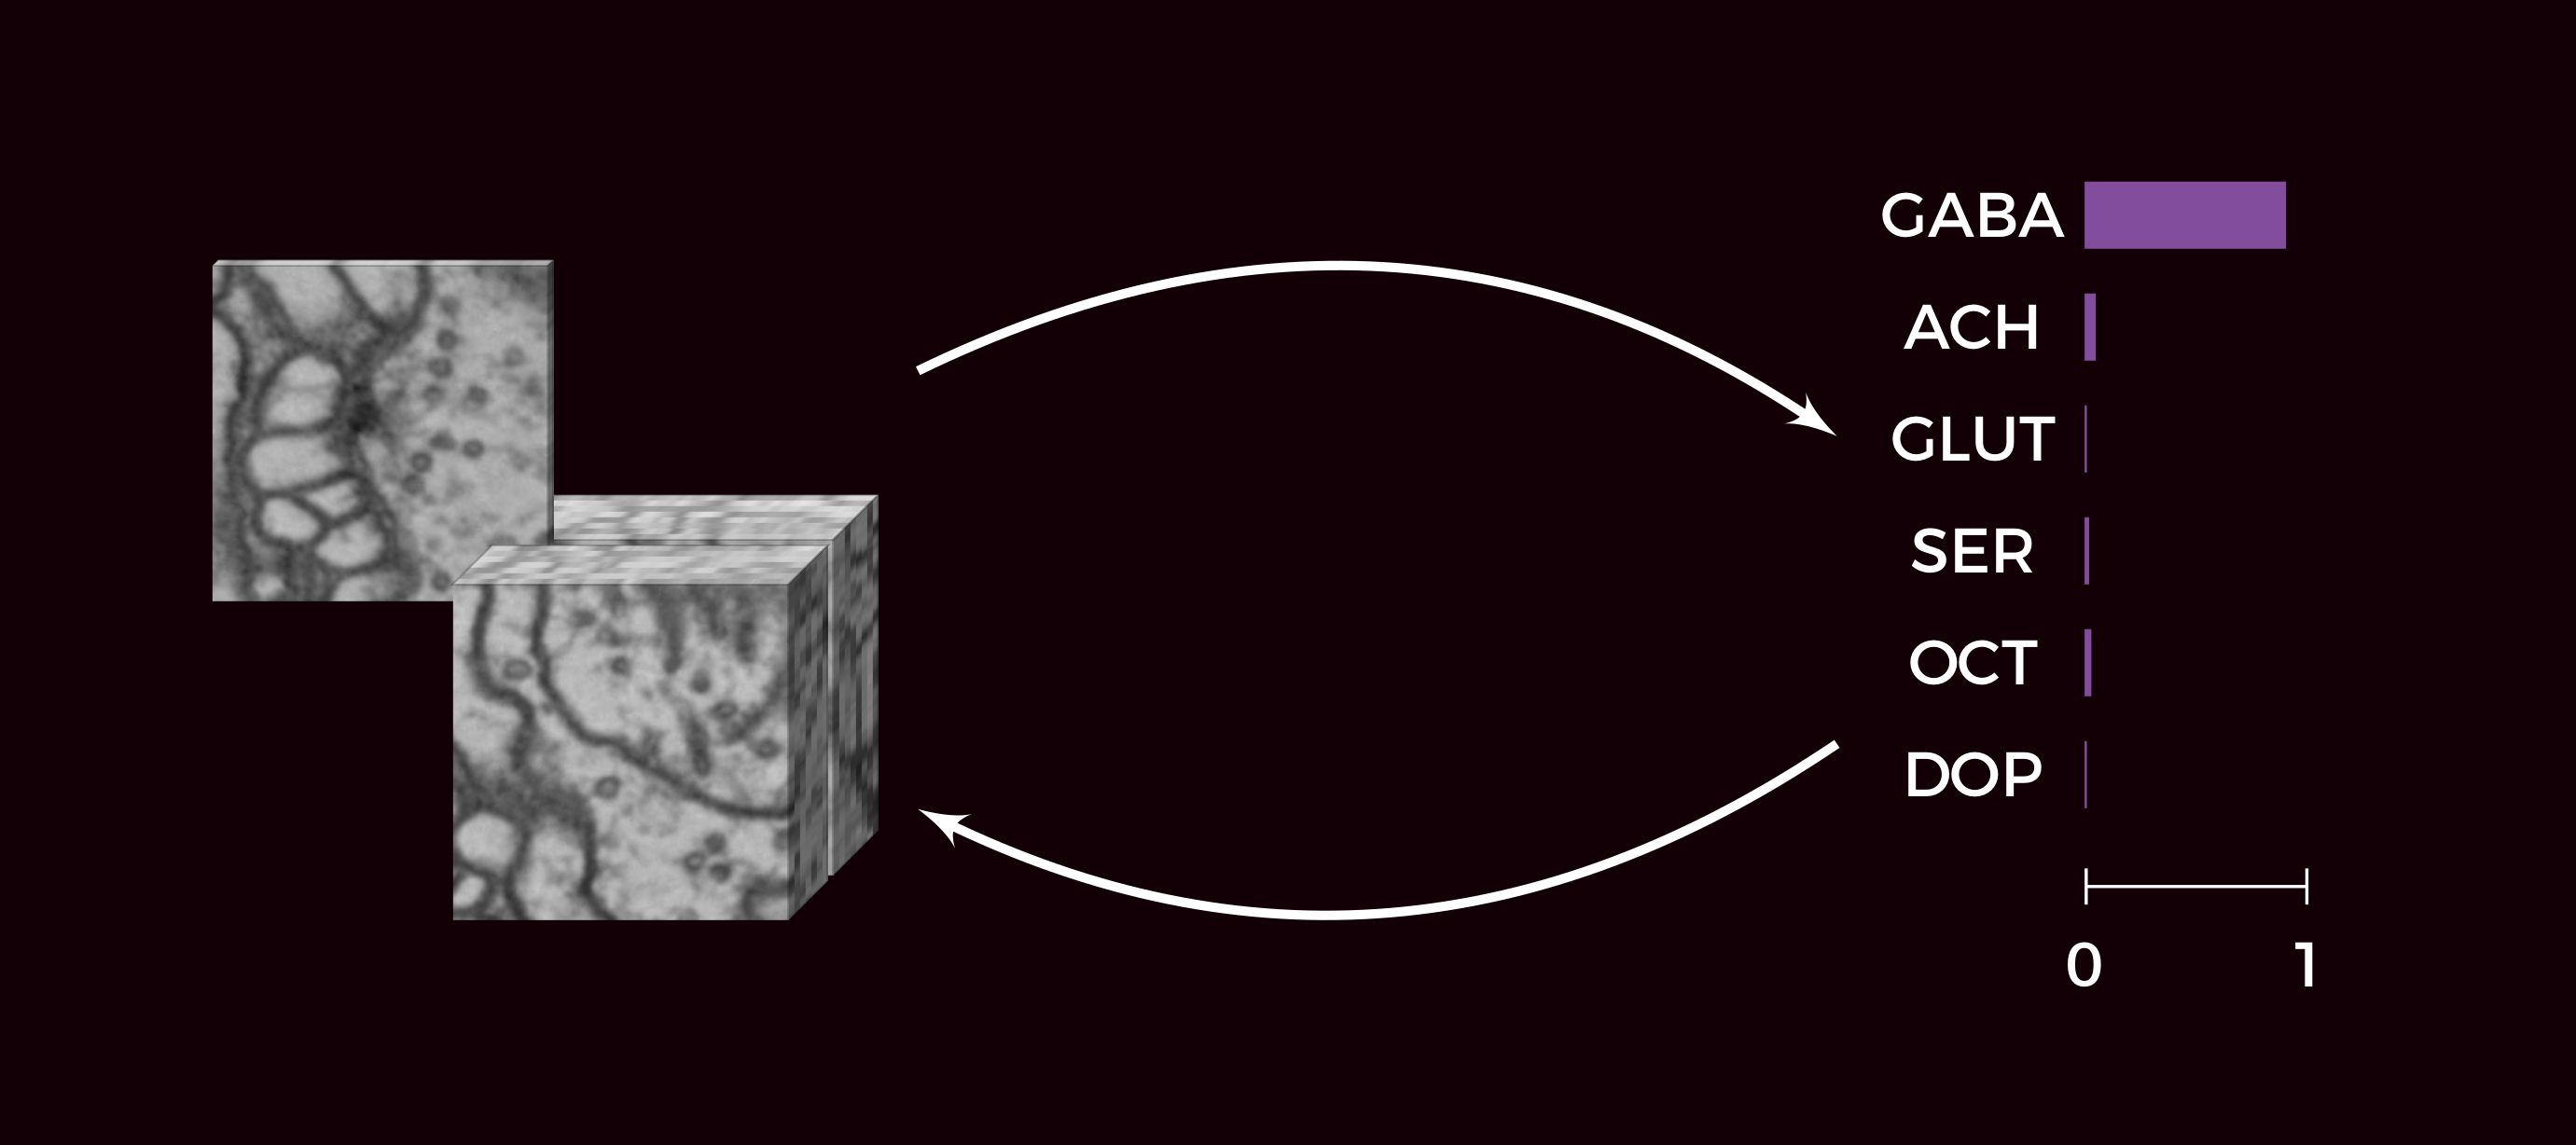

### Installation

This exercise will use `numpy`, `scikit-image`, and `torch` (and a library called `dominate` for the CycleGAN). Execute the next cell to install those requirements in your current conda environment and to download the datasets we will use. This needs to be done only once.

### Acknowledgments

This notebook was written by Jan Funke, using code from Nils Eckstein and a modified version of the [CycleGAN](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) implementation.


In [3]:
# requirements
!pip install numpy scikit-image torch torchvision dominate matplotlib tqdm

# download the resources for this tutorial (one zip file)
!wget 'https://www.dropbox.com/sh/ucpjfd3omjieu80/AAAvZynLtzvhyFx7_jwVhUK2a?dl=0&preview=data.zip' -O resources.zip
# unzip the 'synapses' dataset and model checkpoints
# (this will take a while)
!unzip -o resources.zip data.zip
!unzip -o resources.zip checkpoints.zip
!unzip -o data.zip 'data/raw/synapses/*'
!unzip -o checkpoints.zip 'checkpoints/synapses/*'
# make sure the order of classes matches the pretrained model
!mv data/raw/synapses/gaba data/raw/synapses/0_gaba      
!mv data/raw/synapses/acetylcholine data/raw/synapses/1_acetylcholine
!mv data/raw/synapses/glutamate data/raw/synapses/2_glutamate 
!mv data/raw/synapses/serotonin data/raw/synapses/3_serotonin 
!mv data/raw/synapses/octopamine data/raw/synapses/4_octopamine 
!mv data/raw/synapses/dopamine data/raw/synapses/5_dopamine 

     |████████████████████████████████| 831.4 MB 27 kB/s s eta 0:00:014 |▏                               | 5.4 MB 3.0 MB/s eta 0:04:31     |███████████████████████▎        | 604.1 MB 18.4 MB/s eta 0:00:13
     |████████████████████████████████| 22.1 MB 791 kB/s  eta 0:00:01
     |████████████████████████████████| 76 kB 11.3 MB/s  eta 0:00:01
--2021-08-31 11:48:18--  https://www.dropbox.com/sh/ucpjfd3omjieu80/AAAvZynLtzvhyFx7_jwVhUK2a?dl=0&preview=data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ucpjfd3omjieu80/AAAvZynLtzvhyFx7_jwVhUK2a [following]
--2021-08-31 11:48:18--  https://www.dropbox.com/sh/raw/ucpjfd3omjieu80/AAAvZynLtzvhyFx7_jwVhUK2a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbcebd7b0276ee24

 extracting: data/raw/synapses/acetylcholine/1249_train.png  
 extracting: data/raw/synapses/acetylcholine/124_train.png  
 extracting: data/raw/synapses/acetylcholine/1250_train.png  
 extracting: data/raw/synapses/acetylcholine/1251_train.png  
 extracting: data/raw/synapses/acetylcholine/1252_train.png  
 extracting: data/raw/synapses/acetylcholine/1253_train.png  
 extracting: data/raw/synapses/acetylcholine/1254_train.png  
  inflating: data/raw/synapses/acetylcholine/1255_train.png  
 extracting: data/raw/synapses/acetylcholine/1256_train.png  
  inflating: data/raw/synapses/acetylcholine/1257_train.png  
 extracting: data/raw/synapses/acetylcholine/1258_train.png  
  inflating: data/raw/synapses/acetylcholine/1259_train.png  
 extracting: data/raw/synapses/acetylcholine/125_train.png  
  inflating: data/raw/synapses/acetylcholine/1260_train.png  
 extracting: data/raw/synapses/acetylcholine/1261_train.png  
 extracting: data/raw/synapses/acetylcholine/1262_train.png  
 extractin

  inflating: data/raw/synapses/acetylcholine/1581_train.png  
 extracting: data/raw/synapses/acetylcholine/1582_train.png  
  inflating: data/raw/synapses/acetylcholine/1583_train.png  
 extracting: data/raw/synapses/acetylcholine/1584_train.png  
 extracting: data/raw/synapses/acetylcholine/1585_train.png  
 extracting: data/raw/synapses/acetylcholine/1586_train.png  
 extracting: data/raw/synapses/acetylcholine/1587_train.png  
  inflating: data/raw/synapses/acetylcholine/1588_train.png  
  inflating: data/raw/synapses/acetylcholine/1589_train.png  
 extracting: data/raw/synapses/acetylcholine/158_train.png  
 extracting: data/raw/synapses/acetylcholine/1590_train.png  
 extracting: data/raw/synapses/acetylcholine/1591_train.png  
 extracting: data/raw/synapses/acetylcholine/1592_train.png  
 extracting: data/raw/synapses/acetylcholine/1593_train.png  
 extracting: data/raw/synapses/acetylcholine/1594_train.png  
 extracting: data/raw/synapses/acetylcholine/1595_train.png  
 extracti

 extracting: data/raw/synapses/acetylcholine/189_train.png  
 extracting: data/raw/synapses/acetylcholine/18_train.png  
  inflating: data/raw/synapses/acetylcholine/1900_train.png  
 extracting: data/raw/synapses/acetylcholine/1901_train.png  
 extracting: data/raw/synapses/acetylcholine/1902_train.png  
 extracting: data/raw/synapses/acetylcholine/1903_train.png  
  inflating: data/raw/synapses/acetylcholine/1904_train.png  
 extracting: data/raw/synapses/acetylcholine/1905_train.png  
 extracting: data/raw/synapses/acetylcholine/1906_train.png  
 extracting: data/raw/synapses/acetylcholine/1907_train.png  
 extracting: data/raw/synapses/acetylcholine/1908_train.png  
 extracting: data/raw/synapses/acetylcholine/1909_train.png  
 extracting: data/raw/synapses/acetylcholine/190_train.png  
  inflating: data/raw/synapses/acetylcholine/1910_train.png  
 extracting: data/raw/synapses/acetylcholine/1911_train.png  
 extracting: data/raw/synapses/acetylcholine/1912_train.png  
  inflating:

 extracting: data/raw/synapses/acetylcholine/2212_train.png  
 extracting: data/raw/synapses/acetylcholine/2213_train.png  
 extracting: data/raw/synapses/acetylcholine/2214_train.png  
 extracting: data/raw/synapses/acetylcholine/2215_train.png  
 extracting: data/raw/synapses/acetylcholine/2216_train.png  
  inflating: data/raw/synapses/acetylcholine/2217_train.png  
 extracting: data/raw/synapses/acetylcholine/2218_train.png  
 extracting: data/raw/synapses/acetylcholine/2219_train.png  
 extracting: data/raw/synapses/acetylcholine/221_train.png  
 extracting: data/raw/synapses/acetylcholine/2220_train.png  
 extracting: data/raw/synapses/acetylcholine/2221_train.png  
 extracting: data/raw/synapses/acetylcholine/2222_train.png  
 extracting: data/raw/synapses/acetylcholine/2223_train.png  
 extracting: data/raw/synapses/acetylcholine/2224_train.png  
 extracting: data/raw/synapses/acetylcholine/2225_train.png  
 extracting: data/raw/synapses/acetylcholine/2226_train.png  
 extracti

  inflating: data/raw/synapses/acetylcholine/2511_train.png  
 extracting: data/raw/synapses/acetylcholine/2512_train.png  
 extracting: data/raw/synapses/acetylcholine/2513_train.png  
 extracting: data/raw/synapses/acetylcholine/2514_train.png  
 extracting: data/raw/synapses/acetylcholine/2515_train.png  
 extracting: data/raw/synapses/acetylcholine/2516_train.png  
  inflating: data/raw/synapses/acetylcholine/2517_train.png  
 extracting: data/raw/synapses/acetylcholine/2518_train.png  
 extracting: data/raw/synapses/acetylcholine/2519_train.png  
 extracting: data/raw/synapses/acetylcholine/251_train.png  
 extracting: data/raw/synapses/acetylcholine/2520_train.png  
 extracting: data/raw/synapses/acetylcholine/2521_train.png  
 extracting: data/raw/synapses/acetylcholine/2522_train.png  
 extracting: data/raw/synapses/acetylcholine/2523_train.png  
 extracting: data/raw/synapses/acetylcholine/2524_train.png  
 extracting: data/raw/synapses/acetylcholine/2525_train.png  
  inflati

 extracting: data/raw/synapses/acetylcholine/2795_train.png  
 extracting: data/raw/synapses/acetylcholine/2796_train.png  
 extracting: data/raw/synapses/acetylcholine/2797_train.png  
 extracting: data/raw/synapses/acetylcholine/2798_train.png  
 extracting: data/raw/synapses/acetylcholine/2799_train.png  
 extracting: data/raw/synapses/acetylcholine/279_train.png  
 extracting: data/raw/synapses/acetylcholine/27_train.png  
  inflating: data/raw/synapses/acetylcholine/2800_train.png  
  inflating: data/raw/synapses/acetylcholine/2801_train.png  
 extracting: data/raw/synapses/acetylcholine/2802_train.png  
 extracting: data/raw/synapses/acetylcholine/2803_train.png  
 extracting: data/raw/synapses/acetylcholine/2804_train.png  
 extracting: data/raw/synapses/acetylcholine/2805_train.png  
  inflating: data/raw/synapses/acetylcholine/2806_train.png  
 extracting: data/raw/synapses/acetylcholine/2807_train.png  
  inflating: data/raw/synapses/acetylcholine/2808_train.png  
 extracting

 extracting: data/raw/synapses/acetylcholine/3080_train.png  
 extracting: data/raw/synapses/acetylcholine/3081_train.png  
 extracting: data/raw/synapses/acetylcholine/3082_train.png  
 extracting: data/raw/synapses/acetylcholine/3083_train.png  
 extracting: data/raw/synapses/acetylcholine/3084_train.png  
 extracting: data/raw/synapses/acetylcholine/3085_train.png  
 extracting: data/raw/synapses/acetylcholine/3086_train.png  
 extracting: data/raw/synapses/acetylcholine/3087_train.png  
 extracting: data/raw/synapses/acetylcholine/3088_train.png  
 extracting: data/raw/synapses/acetylcholine/3089_train.png  
 extracting: data/raw/synapses/acetylcholine/308_train.png  
 extracting: data/raw/synapses/acetylcholine/3090_train.png  
 extracting: data/raw/synapses/acetylcholine/3091_train.png  
 extracting: data/raw/synapses/acetylcholine/3092_train.png  
 extracting: data/raw/synapses/acetylcholine/3093_train.png  
 extracting: data/raw/synapses/acetylcholine/3094_train.png  
 extracti

 extracting: data/raw/synapses/acetylcholine/3363_train.png  
 extracting: data/raw/synapses/acetylcholine/3364_train.png  
 extracting: data/raw/synapses/acetylcholine/3365_train.png  
 extracting: data/raw/synapses/acetylcholine/3366_train.png  
 extracting: data/raw/synapses/acetylcholine/3367_train.png  
 extracting: data/raw/synapses/acetylcholine/3368_train.png  
 extracting: data/raw/synapses/acetylcholine/3369_train.png  
 extracting: data/raw/synapses/acetylcholine/336_train.png  
 extracting: data/raw/synapses/acetylcholine/3370_train.png  
  inflating: data/raw/synapses/acetylcholine/3371_train.png  
 extracting: data/raw/synapses/acetylcholine/3372_train.png  
  inflating: data/raw/synapses/acetylcholine/3373_train.png  
 extracting: data/raw/synapses/acetylcholine/3374_train.png  
 extracting: data/raw/synapses/acetylcholine/3375_train.png  
 extracting: data/raw/synapses/acetylcholine/3376_train.png  
 extracting: data/raw/synapses/acetylcholine/3377_train.png  
  inflati

 extracting: data/raw/synapses/acetylcholine/3638_train.png  
 extracting: data/raw/synapses/acetylcholine/3639_train.png  
 extracting: data/raw/synapses/acetylcholine/363_train.png  
 extracting: data/raw/synapses/acetylcholine/3640_train.png  
 extracting: data/raw/synapses/acetylcholine/3641_train.png  
 extracting: data/raw/synapses/acetylcholine/3642_train.png  
 extracting: data/raw/synapses/acetylcholine/3643_train.png  
 extracting: data/raw/synapses/acetylcholine/3644_train.png  
 extracting: data/raw/synapses/acetylcholine/3645_train.png  
 extracting: data/raw/synapses/acetylcholine/3646_train.png  
 extracting: data/raw/synapses/acetylcholine/3647_train.png  
 extracting: data/raw/synapses/acetylcholine/3648_train.png  
 extracting: data/raw/synapses/acetylcholine/3649_train.png  
 extracting: data/raw/synapses/acetylcholine/364_train.png  
 extracting: data/raw/synapses/acetylcholine/3650_train.png  
 extracting: data/raw/synapses/acetylcholine/3651_train.png  
 extractin

 extracting: data/raw/synapses/acetylcholine/3917_train.png  
 extracting: data/raw/synapses/acetylcholine/3918_train.png  
 extracting: data/raw/synapses/acetylcholine/3919_train.png  
 extracting: data/raw/synapses/acetylcholine/391_train.png  
 extracting: data/raw/synapses/acetylcholine/3920_train.png  
  inflating: data/raw/synapses/acetylcholine/3921_train.png  
 extracting: data/raw/synapses/acetylcholine/3922_train.png  
 extracting: data/raw/synapses/acetylcholine/3923_train.png  
 extracting: data/raw/synapses/acetylcholine/3924_train.png  
 extracting: data/raw/synapses/acetylcholine/3925_train.png  
  inflating: data/raw/synapses/acetylcholine/3926_train.png  
 extracting: data/raw/synapses/acetylcholine/3927_train.png  
 extracting: data/raw/synapses/acetylcholine/3928_train.png  
 extracting: data/raw/synapses/acetylcholine/3929_train.png  
 extracting: data/raw/synapses/acetylcholine/392_train.png  
 extracting: data/raw/synapses/acetylcholine/3930_train.png  
 extractin

 extracting: data/raw/synapses/acetylcholine/4197_train.png  
 extracting: data/raw/synapses/acetylcholine/4198_train.png  
 extracting: data/raw/synapses/acetylcholine/4199_train.png  
 extracting: data/raw/synapses/acetylcholine/419_train.png  
 extracting: data/raw/synapses/acetylcholine/41_train.png  
 extracting: data/raw/synapses/acetylcholine/4200_train.png  
 extracting: data/raw/synapses/acetylcholine/4201_train.png  
 extracting: data/raw/synapses/acetylcholine/4202_train.png  
 extracting: data/raw/synapses/acetylcholine/4203_train.png  
 extracting: data/raw/synapses/acetylcholine/4204_train.png  
 extracting: data/raw/synapses/acetylcholine/4205_train.png  
 extracting: data/raw/synapses/acetylcholine/4206_train.png  
 extracting: data/raw/synapses/acetylcholine/4207_train.png  
 extracting: data/raw/synapses/acetylcholine/4208_train.png  
 extracting: data/raw/synapses/acetylcholine/4209_train.png  
 extracting: data/raw/synapses/acetylcholine/420_train.png  
 extracting:

  inflating: data/raw/synapses/acetylcholine/4470_train.png  
 extracting: data/raw/synapses/acetylcholine/4471_train.png  
 extracting: data/raw/synapses/acetylcholine/4472_train.png  
 extracting: data/raw/synapses/acetylcholine/4473_train.png  
  inflating: data/raw/synapses/acetylcholine/4474_train.png  
 extracting: data/raw/synapses/acetylcholine/4475_train.png  
 extracting: data/raw/synapses/acetylcholine/4476_train.png  
 extracting: data/raw/synapses/acetylcholine/4477_train.png  
 extracting: data/raw/synapses/acetylcholine/4478_train.png  
  inflating: data/raw/synapses/acetylcholine/4479_train.png  
  inflating: data/raw/synapses/acetylcholine/447_train.png  
 extracting: data/raw/synapses/acetylcholine/4480_train.png  
  inflating: data/raw/synapses/acetylcholine/4481_train.png  
 extracting: data/raw/synapses/acetylcholine/4482_train.png  
  inflating: data/raw/synapses/acetylcholine/4483_train.png  
 extracting: data/raw/synapses/acetylcholine/4484_train.png  
 extracti

 extracting: data/raw/synapses/acetylcholine/4745_train.png  
 extracting: data/raw/synapses/acetylcholine/4746_train.png  
 extracting: data/raw/synapses/acetylcholine/4747_train.png  
  inflating: data/raw/synapses/acetylcholine/4748_train.png  
 extracting: data/raw/synapses/acetylcholine/4749_train.png  
 extracting: data/raw/synapses/acetylcholine/474_train.png  
  inflating: data/raw/synapses/acetylcholine/4750_train.png  
 extracting: data/raw/synapses/acetylcholine/4751_train.png  
 extracting: data/raw/synapses/acetylcholine/4752_train.png  
  inflating: data/raw/synapses/acetylcholine/4753_train.png  
 extracting: data/raw/synapses/acetylcholine/4754_train.png  
 extracting: data/raw/synapses/acetylcholine/4755_train.png  
 extracting: data/raw/synapses/acetylcholine/4756_train.png  
 extracting: data/raw/synapses/acetylcholine/4757_train.png  
 extracting: data/raw/synapses/acetylcholine/4758_train.png  
 extracting: data/raw/synapses/acetylcholine/4759_train.png  
 extracti

  inflating: data/raw/synapses/acetylcholine/5015_train.png  
  inflating: data/raw/synapses/acetylcholine/5016_train.png  
 extracting: data/raw/synapses/acetylcholine/5017_train.png  
 extracting: data/raw/synapses/acetylcholine/5018_train.png  
 extracting: data/raw/synapses/acetylcholine/5019_train.png  
 extracting: data/raw/synapses/acetylcholine/501_train.png  
 extracting: data/raw/synapses/acetylcholine/5020_train.png  
 extracting: data/raw/synapses/acetylcholine/5021_train.png  
  inflating: data/raw/synapses/acetylcholine/5022_train.png  
 extracting: data/raw/synapses/acetylcholine/5023_train.png  
 extracting: data/raw/synapses/acetylcholine/5024_train.png  
 extracting: data/raw/synapses/acetylcholine/5025_train.png  
 extracting: data/raw/synapses/acetylcholine/5026_train.png  
 extracting: data/raw/synapses/acetylcholine/5027_train.png  
 extracting: data/raw/synapses/acetylcholine/5028_train.png  
 extracting: data/raw/synapses/acetylcholine/5029_train.png  
 extracti

 extracting: data/raw/synapses/acetylcholine/5285_train.png  
 extracting: data/raw/synapses/acetylcholine/5286_train.png  
 extracting: data/raw/synapses/acetylcholine/5287_train.png  
 extracting: data/raw/synapses/acetylcholine/5288_train.png  
  inflating: data/raw/synapses/acetylcholine/5289_train.png  
 extracting: data/raw/synapses/acetylcholine/528_train.png  
 extracting: data/raw/synapses/acetylcholine/5290_train.png  
 extracting: data/raw/synapses/acetylcholine/5291_train.png  
 extracting: data/raw/synapses/acetylcholine/5292_train.png  
 extracting: data/raw/synapses/acetylcholine/5293_train.png  
 extracting: data/raw/synapses/acetylcholine/5294_train.png  
 extracting: data/raw/synapses/acetylcholine/5295_train.png  
  inflating: data/raw/synapses/acetylcholine/5296_train.png  
 extracting: data/raw/synapses/acetylcholine/5297_train.png  
 extracting: data/raw/synapses/acetylcholine/5298_train.png  
 extracting: data/raw/synapses/acetylcholine/5299_train.png  
 extracti

  inflating: data/raw/synapses/acetylcholine/5547_train.png  
 extracting: data/raw/synapses/acetylcholine/5548_train.png  
 extracting: data/raw/synapses/acetylcholine/5549_train.png  
  inflating: data/raw/synapses/acetylcholine/554_train.png  
 extracting: data/raw/synapses/acetylcholine/5550_train.png  
 extracting: data/raw/synapses/acetylcholine/5551_train.png  
 extracting: data/raw/synapses/acetylcholine/5552_train.png  
 extracting: data/raw/synapses/acetylcholine/5553_train.png  
 extracting: data/raw/synapses/acetylcholine/5554_train.png  
 extracting: data/raw/synapses/acetylcholine/5555_train.png  
 extracting: data/raw/synapses/acetylcholine/5556_train.png  
 extracting: data/raw/synapses/acetylcholine/5557_train.png  
 extracting: data/raw/synapses/acetylcholine/5558_train.png  
  inflating: data/raw/synapses/acetylcholine/5559_train.png  
 extracting: data/raw/synapses/acetylcholine/555_train.png  
 extracting: data/raw/synapses/acetylcholine/5560_train.png  
 extractin

 extracting: data/raw/synapses/acetylcholine/5814_train.png  
 extracting: data/raw/synapses/acetylcholine/5815_train.png  
 extracting: data/raw/synapses/acetylcholine/5816_train.png  
 extracting: data/raw/synapses/acetylcholine/5817_train.png  
  inflating: data/raw/synapses/acetylcholine/5818_train.png  
 extracting: data/raw/synapses/acetylcholine/5819_train.png  
 extracting: data/raw/synapses/acetylcholine/581_train.png  
 extracting: data/raw/synapses/acetylcholine/5820_train.png  
 extracting: data/raw/synapses/acetylcholine/5821_train.png  
 extracting: data/raw/synapses/acetylcholine/5822_train.png  
 extracting: data/raw/synapses/acetylcholine/5823_train.png  
 extracting: data/raw/synapses/acetylcholine/5824_train.png  
 extracting: data/raw/synapses/acetylcholine/5825_train.png  
 extracting: data/raw/synapses/acetylcholine/5826_train.png  
 extracting: data/raw/synapses/acetylcholine/5827_train.png  
 extracting: data/raw/synapses/acetylcholine/5828_train.png  
 extracti

 extracting: data/raw/synapses/acetylcholine/6079_train.png  
  inflating: data/raw/synapses/acetylcholine/607_train.png  
 extracting: data/raw/synapses/acetylcholine/6080_train.png  
 extracting: data/raw/synapses/acetylcholine/6081_train.png  
 extracting: data/raw/synapses/acetylcholine/6082_train.png  
 extracting: data/raw/synapses/acetylcholine/6083_train.png  
 extracting: data/raw/synapses/acetylcholine/6084_train.png  
 extracting: data/raw/synapses/acetylcholine/6085_train.png  
 extracting: data/raw/synapses/acetylcholine/6086_train.png  
 extracting: data/raw/synapses/acetylcholine/6087_train.png  
 extracting: data/raw/synapses/acetylcholine/6088_train.png  
 extracting: data/raw/synapses/acetylcholine/6089_train.png  
  inflating: data/raw/synapses/acetylcholine/608_train.png  
 extracting: data/raw/synapses/acetylcholine/6090_train.png  
 extracting: data/raw/synapses/acetylcholine/6091_train.png  
 extracting: data/raw/synapses/acetylcholine/6092_train.png  
 extractin

  inflating: data/raw/synapses/acetylcholine/6339_train.png  
 extracting: data/raw/synapses/acetylcholine/633_train.png  
 extracting: data/raw/synapses/acetylcholine/6340_train.png  
 extracting: data/raw/synapses/acetylcholine/6341_train.png  
 extracting: data/raw/synapses/acetylcholine/6342_train.png  
 extracting: data/raw/synapses/acetylcholine/6343_train.png  
 extracting: data/raw/synapses/acetylcholine/6344_train.png  
 extracting: data/raw/synapses/acetylcholine/6345_train.png  
 extracting: data/raw/synapses/acetylcholine/6346_train.png  
 extracting: data/raw/synapses/acetylcholine/6347_train.png  
 extracting: data/raw/synapses/acetylcholine/6348_train.png  
 extracting: data/raw/synapses/acetylcholine/6349_train.png  
 extracting: data/raw/synapses/acetylcholine/634_train.png  
 extracting: data/raw/synapses/acetylcholine/6350_train.png  
 extracting: data/raw/synapses/acetylcholine/6351_train.png  
 extracting: data/raw/synapses/acetylcholine/6352_train.png  
 extractin

 extracting: data/raw/synapses/acetylcholine/6596_train.png  
  inflating: data/raw/synapses/acetylcholine/6597_train.png  
 extracting: data/raw/synapses/acetylcholine/6598_train.png  
 extracting: data/raw/synapses/acetylcholine/6599_train.png  
 extracting: data/raw/synapses/acetylcholine/659_train.png  
 extracting: data/raw/synapses/acetylcholine/65_train.png  
 extracting: data/raw/synapses/acetylcholine/6600_train.png  
 extracting: data/raw/synapses/acetylcholine/6601_train.png  
 extracting: data/raw/synapses/acetylcholine/6602_train.png  
 extracting: data/raw/synapses/acetylcholine/6603_train.png  
 extracting: data/raw/synapses/acetylcholine/6604_train.png  
 extracting: data/raw/synapses/acetylcholine/6605_train.png  
 extracting: data/raw/synapses/acetylcholine/6606_train.png  
 extracting: data/raw/synapses/acetylcholine/6607_train.png  
 extracting: data/raw/synapses/acetylcholine/6608_train.png  
 extracting: data/raw/synapses/acetylcholine/6609_train.png  
 extracting

 extracting: data/raw/synapses/acetylcholine/6845_train.png  
 extracting: data/raw/synapses/acetylcholine/6846_train.png  
 extracting: data/raw/synapses/acetylcholine/6847_train.png  
  inflating: data/raw/synapses/acetylcholine/6848_train.png  
 extracting: data/raw/synapses/acetylcholine/6849_train.png  
 extracting: data/raw/synapses/acetylcholine/684_train.png  
 extracting: data/raw/synapses/acetylcholine/6850_train.png  
 extracting: data/raw/synapses/acetylcholine/6851_train.png  
 extracting: data/raw/synapses/acetylcholine/6852_train.png  
 extracting: data/raw/synapses/acetylcholine/6853_train.png  
 extracting: data/raw/synapses/acetylcholine/6854_train.png  
 extracting: data/raw/synapses/acetylcholine/6855_train.png  
 extracting: data/raw/synapses/acetylcholine/6856_train.png  
 extracting: data/raw/synapses/acetylcholine/6857_train.png  
 extracting: data/raw/synapses/acetylcholine/6858_train.png  
 extracting: data/raw/synapses/acetylcholine/6859_train.png  
 extracti

  inflating: data/raw/synapses/acetylcholine/794_train.png  
  inflating: data/raw/synapses/acetylcholine/795_train.png  
 extracting: data/raw/synapses/acetylcholine/796_train.png  
 extracting: data/raw/synapses/acetylcholine/797_train.png  
 extracting: data/raw/synapses/acetylcholine/798_train.png  
 extracting: data/raw/synapses/acetylcholine/799_train.png  
 extracting: data/raw/synapses/acetylcholine/79_train.png  
 extracting: data/raw/synapses/acetylcholine/7_train.png  
 extracting: data/raw/synapses/acetylcholine/800_train.png  
 extracting: data/raw/synapses/acetylcholine/801_train.png  
 extracting: data/raw/synapses/acetylcholine/802_train.png  
 extracting: data/raw/synapses/acetylcholine/803_train.png  
  inflating: data/raw/synapses/acetylcholine/804_train.png  
 extracting: data/raw/synapses/acetylcholine/805_train.png  
 extracting: data/raw/synapses/acetylcholine/806_train.png  
 extracting: data/raw/synapses/acetylcholine/807_train.png  
  inflating: data/raw/synap

 extracting: data/raw/synapses/dopamine/1049_train.png  
 extracting: data/raw/synapses/dopamine/104_train.png  
  inflating: data/raw/synapses/dopamine/1050_train.png  
 extracting: data/raw/synapses/dopamine/1051_train.png  
 extracting: data/raw/synapses/dopamine/1052_train.png  
 extracting: data/raw/synapses/dopamine/1053_train.png  
 extracting: data/raw/synapses/dopamine/1054_train.png  
 extracting: data/raw/synapses/dopamine/1055_train.png  
 extracting: data/raw/synapses/dopamine/1056_train.png  
  inflating: data/raw/synapses/dopamine/1057_train.png  
 extracting: data/raw/synapses/dopamine/1058_train.png  
  inflating: data/raw/synapses/dopamine/1059_train.png  
 extracting: data/raw/synapses/dopamine/105_train.png  
 extracting: data/raw/synapses/dopamine/1060_train.png  
 extracting: data/raw/synapses/dopamine/1061_train.png  
 extracting: data/raw/synapses/dopamine/1062_train.png  
 extracting: data/raw/synapses/dopamine/1063_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/1276_train.png  
 extracting: data/raw/synapses/dopamine/1277_train.png  
 extracting: data/raw/synapses/dopamine/1278_train.png  
 extracting: data/raw/synapses/dopamine/1279_train.png  
 extracting: data/raw/synapses/dopamine/127_train.png  
 extracting: data/raw/synapses/dopamine/1280_train.png  
 extracting: data/raw/synapses/dopamine/1281_train.png  
 extracting: data/raw/synapses/dopamine/1282_train.png  
 extracting: data/raw/synapses/dopamine/1283_train.png  
 extracting: data/raw/synapses/dopamine/1284_train.png  
 extracting: data/raw/synapses/dopamine/1285_train.png  
 extracting: data/raw/synapses/dopamine/1286_train.png  
 extracting: data/raw/synapses/dopamine/1287_train.png  
 extracting: data/raw/synapses/dopamine/1288_train.png  
 extracting: data/raw/synapses/dopamine/1289_train.png  
 extracting: data/raw/synapses/dopamine/128_train.png  
 extracting: data/raw/synapses/dopamine/1290_train.png  
 extracting: data/raw/synapses/do

  inflating: data/raw/synapses/dopamine/151_train.png  
 extracting: data/raw/synapses/dopamine/1520_train.png  
  inflating: data/raw/synapses/dopamine/1521_train.png  
 extracting: data/raw/synapses/dopamine/1522_train.png  
 extracting: data/raw/synapses/dopamine/1523_train.png  
 extracting: data/raw/synapses/dopamine/1524_train.png  
 extracting: data/raw/synapses/dopamine/1525_train.png  
 extracting: data/raw/synapses/dopamine/1526_train.png  
 extracting: data/raw/synapses/dopamine/1527_train.png  
  inflating: data/raw/synapses/dopamine/1528_train.png  
 extracting: data/raw/synapses/dopamine/1529_train.png  
 extracting: data/raw/synapses/dopamine/152_train.png  
  inflating: data/raw/synapses/dopamine/1530_train.png  
 extracting: data/raw/synapses/dopamine/1531_train.png  
 extracting: data/raw/synapses/dopamine/1532_train.png  
 extracting: data/raw/synapses/dopamine/1533_train.png  
 extracting: data/raw/synapses/dopamine/1534_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/1753_train.png  
 extracting: data/raw/synapses/dopamine/1754_train.png  
 extracting: data/raw/synapses/dopamine/1755_train.png  
 extracting: data/raw/synapses/dopamine/1756_train.png  
 extracting: data/raw/synapses/dopamine/1757_train.png  
 extracting: data/raw/synapses/dopamine/1758_train.png  
 extracting: data/raw/synapses/dopamine/1759_train.png  
  inflating: data/raw/synapses/dopamine/175_train.png  
 extracting: data/raw/synapses/dopamine/1760_train.png  
  inflating: data/raw/synapses/dopamine/1761_train.png  
 extracting: data/raw/synapses/dopamine/1762_train.png  
 extracting: data/raw/synapses/dopamine/1763_train.png  
 extracting: data/raw/synapses/dopamine/1764_train.png  
 extracting: data/raw/synapses/dopamine/1765_train.png  
 extracting: data/raw/synapses/dopamine/1766_train.png  
 extracting: data/raw/synapses/dopamine/1767_train.png  
  inflating: data/raw/synapses/dopamine/1768_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/1995_train.png  
  inflating: data/raw/synapses/dopamine/1996_train.png  
 extracting: data/raw/synapses/dopamine/1997_train.png  
 extracting: data/raw/synapses/dopamine/1998_train.png  
 extracting: data/raw/synapses/dopamine/1999_train.png  
 extracting: data/raw/synapses/dopamine/199_train.png  
 extracting: data/raw/synapses/dopamine/19_train.png  
 extracting: data/raw/synapses/dopamine/1_train.png  
 extracting: data/raw/synapses/dopamine/2000_train.png  
 extracting: data/raw/synapses/dopamine/2001_train.png  
 extracting: data/raw/synapses/dopamine/2002_train.png  
 extracting: data/raw/synapses/dopamine/2003_train.png  
 extracting: data/raw/synapses/dopamine/2004_train.png  
 extracting: data/raw/synapses/dopamine/2005_train.png  
 extracting: data/raw/synapses/dopamine/2006_train.png  
 extracting: data/raw/synapses/dopamine/2007_train.png  
  inflating: data/raw/synapses/dopamine/2008_train.png  
 extracting: data/raw/synapses/dopami

 extracting: data/raw/synapses/dopamine/2223_train.png  
 extracting: data/raw/synapses/dopamine/2224_train.png  
 extracting: data/raw/synapses/dopamine/2225_train.png  
 extracting: data/raw/synapses/dopamine/2226_train.png  
 extracting: data/raw/synapses/dopamine/2227_train.png  
 extracting: data/raw/synapses/dopamine/2228_train.png  
 extracting: data/raw/synapses/dopamine/2229_train.png  
 extracting: data/raw/synapses/dopamine/222_train.png  
 extracting: data/raw/synapses/dopamine/2230_train.png  
 extracting: data/raw/synapses/dopamine/2231_train.png  
 extracting: data/raw/synapses/dopamine/2232_train.png  
 extracting: data/raw/synapses/dopamine/2233_train.png  
 extracting: data/raw/synapses/dopamine/2234_train.png  
 extracting: data/raw/synapses/dopamine/2235_train.png  
 extracting: data/raw/synapses/dopamine/2236_train.png  
 extracting: data/raw/synapses/dopamine/2237_train.png  
 extracting: data/raw/synapses/dopamine/2238_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/2469_train.png  
 extracting: data/raw/synapses/dopamine/246_train.png  
  inflating: data/raw/synapses/dopamine/2470_train.png  
 extracting: data/raw/synapses/dopamine/2471_train.png  
 extracting: data/raw/synapses/dopamine/2472_train.png  
  inflating: data/raw/synapses/dopamine/2473_train.png  
 extracting: data/raw/synapses/dopamine/2474_train.png  
 extracting: data/raw/synapses/dopamine/2475_train.png  
 extracting: data/raw/synapses/dopamine/2476_train.png  
 extracting: data/raw/synapses/dopamine/2477_train.png  
 extracting: data/raw/synapses/dopamine/2478_train.png  
 extracting: data/raw/synapses/dopamine/2479_train.png  
 extracting: data/raw/synapses/dopamine/247_train.png  
 extracting: data/raw/synapses/dopamine/2480_train.png  
 extracting: data/raw/synapses/dopamine/2481_train.png  
 extracting: data/raw/synapses/dopamine/2482_train.png  
 extracting: data/raw/synapses/dopamine/2483_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/2713_train.png  
 extracting: data/raw/synapses/dopamine/2714_train.png  
 extracting: data/raw/synapses/dopamine/2715_train.png  
 extracting: data/raw/synapses/dopamine/2716_train.png  
 extracting: data/raw/synapses/dopamine/2717_train.png  
 extracting: data/raw/synapses/dopamine/2718_train.png  
 extracting: data/raw/synapses/dopamine/2719_train.png  
 extracting: data/raw/synapses/dopamine/271_train.png  
 extracting: data/raw/synapses/dopamine/2720_train.png  
 extracting: data/raw/synapses/dopamine/2721_train.png  
 extracting: data/raw/synapses/dopamine/2722_train.png  
  inflating: data/raw/synapses/dopamine/2723_train.png  
 extracting: data/raw/synapses/dopamine/2724_train.png  
 extracting: data/raw/synapses/dopamine/2725_train.png  
 extracting: data/raw/synapses/dopamine/2726_train.png  
 extracting: data/raw/synapses/dopamine/2727_train.png  
  inflating: data/raw/synapses/dopamine/2728_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/2974_train.png  
 extracting: data/raw/synapses/dopamine/2975_train.png  
  inflating: data/raw/synapses/dopamine/2976_train.png  
 extracting: data/raw/synapses/dopamine/2977_train.png  
  inflating: data/raw/synapses/dopamine/2978_train.png  
 extracting: data/raw/synapses/dopamine/2979_train.png  
 extracting: data/raw/synapses/dopamine/297_train.png  
 extracting: data/raw/synapses/dopamine/2980_train.png  
 extracting: data/raw/synapses/dopamine/2981_train.png  
 extracting: data/raw/synapses/dopamine/2982_train.png  
 extracting: data/raw/synapses/dopamine/2983_train.png  
  inflating: data/raw/synapses/dopamine/2984_train.png  
 extracting: data/raw/synapses/dopamine/2985_train.png  
 extracting: data/raw/synapses/dopamine/2986_train.png  
 extracting: data/raw/synapses/dopamine/2987_train.png  
 extracting: data/raw/synapses/dopamine/2988_train.png  
 extracting: data/raw/synapses/dopamine/2989_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/3230_train.png  
 extracting: data/raw/synapses/dopamine/3231_train.png  
 extracting: data/raw/synapses/dopamine/3232_train.png  
 extracting: data/raw/synapses/dopamine/3233_train.png  
 extracting: data/raw/synapses/dopamine/3234_train.png  
 extracting: data/raw/synapses/dopamine/3235_train.png  
 extracting: data/raw/synapses/dopamine/3236_train.png  
 extracting: data/raw/synapses/dopamine/3237_train.png  
  inflating: data/raw/synapses/dopamine/3238_train.png  
  inflating: data/raw/synapses/dopamine/3239_train.png  
 extracting: data/raw/synapses/dopamine/323_train.png  
  inflating: data/raw/synapses/dopamine/3240_train.png  
 extracting: data/raw/synapses/dopamine/3241_train.png  
 extracting: data/raw/synapses/dopamine/3242_train.png  
 extracting: data/raw/synapses/dopamine/3243_train.png  
 extracting: data/raw/synapses/dopamine/3244_train.png  
 extracting: data/raw/synapses/dopamine/3245_train.png  
 extracting: data/raw/synapses/d

  inflating: data/raw/synapses/dopamine/3486_train.png  
 extracting: data/raw/synapses/dopamine/3487_train.png  
 extracting: data/raw/synapses/dopamine/3488_train.png  
 extracting: data/raw/synapses/dopamine/3489_train.png  
 extracting: data/raw/synapses/dopamine/348_train.png  
 extracting: data/raw/synapses/dopamine/3490_train.png  
 extracting: data/raw/synapses/dopamine/3491_train.png  
 extracting: data/raw/synapses/dopamine/3492_train.png  
 extracting: data/raw/synapses/dopamine/3493_train.png  
 extracting: data/raw/synapses/dopamine/3494_train.png  
 extracting: data/raw/synapses/dopamine/3495_train.png  
 extracting: data/raw/synapses/dopamine/3496_train.png  
 extracting: data/raw/synapses/dopamine/3497_train.png  
 extracting: data/raw/synapses/dopamine/3498_train.png  
 extracting: data/raw/synapses/dopamine/3499_train.png  
 extracting: data/raw/synapses/dopamine/349_train.png  
  inflating: data/raw/synapses/dopamine/34_train.png  
 extracting: data/raw/synapses/dopa

 extracting: data/raw/synapses/dopamine/3747_train.png  
 extracting: data/raw/synapses/dopamine/3748_train.png  
 extracting: data/raw/synapses/dopamine/3749_train.png  
 extracting: data/raw/synapses/dopamine/374_train.png  
 extracting: data/raw/synapses/dopamine/3750_train.png  
 extracting: data/raw/synapses/dopamine/3751_train.png  
  inflating: data/raw/synapses/dopamine/3752_train.png  
  inflating: data/raw/synapses/dopamine/3753_train.png  
 extracting: data/raw/synapses/dopamine/3754_train.png  
 extracting: data/raw/synapses/dopamine/3755_train.png  
 extracting: data/raw/synapses/dopamine/3756_train.png  
  inflating: data/raw/synapses/dopamine/3757_train.png  
 extracting: data/raw/synapses/dopamine/3758_train.png  
 extracting: data/raw/synapses/dopamine/3759_train.png  
 extracting: data/raw/synapses/dopamine/375_train.png  
 extracting: data/raw/synapses/dopamine/3760_train.png  
 extracting: data/raw/synapses/dopamine/3761_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/4000_train.png  
 extracting: data/raw/synapses/dopamine/4001_train.png  
 extracting: data/raw/synapses/dopamine/4002_train.png  
 extracting: data/raw/synapses/dopamine/4003_train.png  
 extracting: data/raw/synapses/dopamine/4004_train.png  
  inflating: data/raw/synapses/dopamine/4005_train.png  
 extracting: data/raw/synapses/dopamine/4006_train.png  
 extracting: data/raw/synapses/dopamine/4007_train.png  
 extracting: data/raw/synapses/dopamine/4008_train.png  
  inflating: data/raw/synapses/dopamine/4009_train.png  
 extracting: data/raw/synapses/dopamine/400_train.png  
 extracting: data/raw/synapses/dopamine/4010_train.png  
 extracting: data/raw/synapses/dopamine/4011_train.png  
 extracting: data/raw/synapses/dopamine/4012_train.png  
 extracting: data/raw/synapses/dopamine/4013_train.png  
 extracting: data/raw/synapses/dopamine/4014_train.png  
 extracting: data/raw/synapses/dopamine/4015_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/4266_train.png  
 extracting: data/raw/synapses/dopamine/4267_train.png  
 extracting: data/raw/synapses/dopamine/4268_train.png  
 extracting: data/raw/synapses/dopamine/4269_train.png  
 extracting: data/raw/synapses/dopamine/426_train.png  
  inflating: data/raw/synapses/dopamine/4270_train.png  
 extracting: data/raw/synapses/dopamine/4271_train.png  
 extracting: data/raw/synapses/dopamine/4272_train.png  
  inflating: data/raw/synapses/dopamine/4273_train.png  
 extracting: data/raw/synapses/dopamine/4274_train.png  
 extracting: data/raw/synapses/dopamine/4275_train.png  
 extracting: data/raw/synapses/dopamine/4276_train.png  
 extracting: data/raw/synapses/dopamine/4277_train.png  
 extracting: data/raw/synapses/dopamine/4278_train.png  
 extracting: data/raw/synapses/dopamine/4279_train.png  
 extracting: data/raw/synapses/dopamine/427_train.png  
 extracting: data/raw/synapses/dopamine/4280_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/4518_train.png  
 extracting: data/raw/synapses/dopamine/4519_train.png  
 extracting: data/raw/synapses/dopamine/451_train.png  
 extracting: data/raw/synapses/dopamine/4520_train.png  
 extracting: data/raw/synapses/dopamine/4521_train.png  
 extracting: data/raw/synapses/dopamine/4522_train.png  
 extracting: data/raw/synapses/dopamine/4523_train.png  
 extracting: data/raw/synapses/dopamine/4524_train.png  
 extracting: data/raw/synapses/dopamine/4525_train.png  
 extracting: data/raw/synapses/dopamine/4526_train.png  
 extracting: data/raw/synapses/dopamine/4527_train.png  
 extracting: data/raw/synapses/dopamine/4528_train.png  
 extracting: data/raw/synapses/dopamine/4529_train.png  
 extracting: data/raw/synapses/dopamine/452_train.png  
 extracting: data/raw/synapses/dopamine/4530_train.png  
 extracting: data/raw/synapses/dopamine/4531_train.png  
 extracting: data/raw/synapses/dopamine/4532_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/4783_train.png  
 extracting: data/raw/synapses/dopamine/4784_train.png  
 extracting: data/raw/synapses/dopamine/4785_train.png  
 extracting: data/raw/synapses/dopamine/4786_train.png  
 extracting: data/raw/synapses/dopamine/4787_train.png  
 extracting: data/raw/synapses/dopamine/4788_train.png  
 extracting: data/raw/synapses/dopamine/4789_train.png  
 extracting: data/raw/synapses/dopamine/478_train.png  
 extracting: data/raw/synapses/dopamine/4790_train.png  
  inflating: data/raw/synapses/dopamine/4791_train.png  
 extracting: data/raw/synapses/dopamine/4792_train.png  
 extracting: data/raw/synapses/dopamine/4793_train.png  
 extracting: data/raw/synapses/dopamine/4794_train.png  
 extracting: data/raw/synapses/dopamine/4795_train.png  
 extracting: data/raw/synapses/dopamine/4796_train.png  
 extracting: data/raw/synapses/dopamine/4797_train.png  
 extracting: data/raw/synapses/dopamine/4798_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/5029_train.png  
 extracting: data/raw/synapses/dopamine/502_train.png  
 extracting: data/raw/synapses/dopamine/5030_train.png  
 extracting: data/raw/synapses/dopamine/5031_train.png  
 extracting: data/raw/synapses/dopamine/5032_train.png  
 extracting: data/raw/synapses/dopamine/5033_train.png  
 extracting: data/raw/synapses/dopamine/5034_train.png  
 extracting: data/raw/synapses/dopamine/5035_train.png  
 extracting: data/raw/synapses/dopamine/5036_train.png  
 extracting: data/raw/synapses/dopamine/5037_train.png  
  inflating: data/raw/synapses/dopamine/5038_train.png  
  inflating: data/raw/synapses/dopamine/5039_train.png  
  inflating: data/raw/synapses/dopamine/503_train.png  
 extracting: data/raw/synapses/dopamine/5040_train.png  
 extracting: data/raw/synapses/dopamine/5041_train.png  
 extracting: data/raw/synapses/dopamine/5042_train.png  
 extracting: data/raw/synapses/dopamine/5043_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/5278_train.png  
 extracting: data/raw/synapses/dopamine/5279_train.png  
 extracting: data/raw/synapses/dopamine/527_train.png  
 extracting: data/raw/synapses/dopamine/5280_train.png  
 extracting: data/raw/synapses/dopamine/5281_train.png  
 extracting: data/raw/synapses/dopamine/5282_train.png  
 extracting: data/raw/synapses/dopamine/5283_train.png  
 extracting: data/raw/synapses/dopamine/5284_train.png  
  inflating: data/raw/synapses/dopamine/5285_train.png  
 extracting: data/raw/synapses/dopamine/5286_train.png  
 extracting: data/raw/synapses/dopamine/5287_train.png  
 extracting: data/raw/synapses/dopamine/5288_train.png  
 extracting: data/raw/synapses/dopamine/5289_train.png  
 extracting: data/raw/synapses/dopamine/528_train.png  
 extracting: data/raw/synapses/dopamine/5290_train.png  
 extracting: data/raw/synapses/dopamine/5291_train.png  
 extracting: data/raw/synapses/dopamine/5292_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/5542_train.png  
 extracting: data/raw/synapses/dopamine/5543_train.png  
  inflating: data/raw/synapses/dopamine/5544_train.png  
  inflating: data/raw/synapses/dopamine/5545_train.png  
 extracting: data/raw/synapses/dopamine/5546_train.png  
 extracting: data/raw/synapses/dopamine/5547_train.png  
 extracting: data/raw/synapses/dopamine/5548_train.png  
 extracting: data/raw/synapses/dopamine/5549_train.png  
 extracting: data/raw/synapses/dopamine/554_train.png  
 extracting: data/raw/synapses/dopamine/5550_train.png  
 extracting: data/raw/synapses/dopamine/5551_train.png  
 extracting: data/raw/synapses/dopamine/5552_train.png  
 extracting: data/raw/synapses/dopamine/5553_train.png  
  inflating: data/raw/synapses/dopamine/5554_train.png  
 extracting: data/raw/synapses/dopamine/5555_train.png  
 extracting: data/raw/synapses/dopamine/5556_train.png  
 extracting: data/raw/synapses/dopamine/5557_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/5803_train.png  
 extracting: data/raw/synapses/dopamine/5804_train.png  
  inflating: data/raw/synapses/dopamine/5805_train.png  
  inflating: data/raw/synapses/dopamine/5806_train.png  
 extracting: data/raw/synapses/dopamine/5807_train.png  
 extracting: data/raw/synapses/dopamine/5808_train.png  
  inflating: data/raw/synapses/dopamine/5809_train.png  
  inflating: data/raw/synapses/dopamine/580_train.png  
 extracting: data/raw/synapses/dopamine/5810_train.png  
 extracting: data/raw/synapses/dopamine/5811_train.png  
 extracting: data/raw/synapses/dopamine/5812_train.png  
 extracting: data/raw/synapses/dopamine/5813_train.png  
 extracting: data/raw/synapses/dopamine/5814_train.png  
 extracting: data/raw/synapses/dopamine/5815_train.png  
 extracting: data/raw/synapses/dopamine/5816_train.png  
  inflating: data/raw/synapses/dopamine/5817_train.png  
  inflating: data/raw/synapses/dopamine/5818_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/6070_train.png  
  inflating: data/raw/synapses/dopamine/6071_train.png  
 extracting: data/raw/synapses/dopamine/6072_train.png  
 extracting: data/raw/synapses/dopamine/6073_train.png  
 extracting: data/raw/synapses/dopamine/6074_train.png  
 extracting: data/raw/synapses/dopamine/6075_train.png  
 extracting: data/raw/synapses/dopamine/6076_train.png  
 extracting: data/raw/synapses/dopamine/6077_train.png  
 extracting: data/raw/synapses/dopamine/6078_train.png  
 extracting: data/raw/synapses/dopamine/6079_train.png  
 extracting: data/raw/synapses/dopamine/607_train.png  
 extracting: data/raw/synapses/dopamine/6080_train.png  
 extracting: data/raw/synapses/dopamine/6081_train.png  
 extracting: data/raw/synapses/dopamine/6082_train.png  
 extracting: data/raw/synapses/dopamine/6083_train.png  
 extracting: data/raw/synapses/dopamine/6084_train.png  
  inflating: data/raw/synapses/dopamine/6085_train.png  
 extracting: data/raw/synapses/d

 extracting: data/raw/synapses/dopamine/6339_train.png  
 extracting: data/raw/synapses/dopamine/633_train.png  
 extracting: data/raw/synapses/dopamine/6340_train.png  
 extracting: data/raw/synapses/dopamine/6341_train.png  
 extracting: data/raw/synapses/dopamine/6342_train.png  
 extracting: data/raw/synapses/dopamine/6343_train.png  
 extracting: data/raw/synapses/dopamine/6344_train.png  
 extracting: data/raw/synapses/dopamine/6345_train.png  
 extracting: data/raw/synapses/dopamine/6346_train.png  
 extracting: data/raw/synapses/dopamine/6347_train.png  
 extracting: data/raw/synapses/dopamine/6348_train.png  
 extracting: data/raw/synapses/dopamine/6349_train.png  
 extracting: data/raw/synapses/dopamine/634_train.png  
 extracting: data/raw/synapses/dopamine/6350_train.png  
 extracting: data/raw/synapses/dopamine/6351_train.png  
 extracting: data/raw/synapses/dopamine/6352_train.png  
 extracting: data/raw/synapses/dopamine/6353_train.png  
 extracting: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/6606_train.png  
 extracting: data/raw/synapses/dopamine/6607_train.png  
 extracting: data/raw/synapses/dopamine/6608_train.png  
 extracting: data/raw/synapses/dopamine/6609_train.png  
 extracting: data/raw/synapses/dopamine/660_train.png  
 extracting: data/raw/synapses/dopamine/6610_train.png  
 extracting: data/raw/synapses/dopamine/6611_train.png  
 extracting: data/raw/synapses/dopamine/6612_train.png  
 extracting: data/raw/synapses/dopamine/6613_train.png  
 extracting: data/raw/synapses/dopamine/6614_train.png  
 extracting: data/raw/synapses/dopamine/6615_train.png  
  inflating: data/raw/synapses/dopamine/6616_train.png  
 extracting: data/raw/synapses/dopamine/6617_train.png  
 extracting: data/raw/synapses/dopamine/6618_train.png  
 extracting: data/raw/synapses/dopamine/6619_train.png  
 extracting: data/raw/synapses/dopamine/661_train.png  
 extracting: data/raw/synapses/dopamine/6620_train.png  
  inflating: data/raw/synapses/do

 extracting: data/raw/synapses/dopamine/873_train.png  
  inflating: data/raw/synapses/dopamine/874_train.png  
 extracting: data/raw/synapses/dopamine/875_train.png  
 extracting: data/raw/synapses/dopamine/876_train.png  
 extracting: data/raw/synapses/dopamine/877_train.png  
  inflating: data/raw/synapses/dopamine/878_train.png  
 extracting: data/raw/synapses/dopamine/879_train.png  
 extracting: data/raw/synapses/dopamine/87_train.png  
 extracting: data/raw/synapses/dopamine/880_train.png  
 extracting: data/raw/synapses/dopamine/881_train.png  
 extracting: data/raw/synapses/dopamine/882_train.png  
 extracting: data/raw/synapses/dopamine/883_train.png  
 extracting: data/raw/synapses/dopamine/884_train.png  
 extracting: data/raw/synapses/dopamine/885_train.png  
 extracting: data/raw/synapses/dopamine/886_train.png  
 extracting: data/raw/synapses/dopamine/887_train.png  
 extracting: data/raw/synapses/dopamine/888_train.png  
 extracting: data/raw/synapses/dopamine/889_train

 extracting: data/raw/synapses/gaba/1012_train.png  
 extracting: data/raw/synapses/gaba/10130_train.png  
 extracting: data/raw/synapses/gaba/10131_train.png  
  inflating: data/raw/synapses/gaba/10132_train.png  
 extracting: data/raw/synapses/gaba/10133_train.png  
 extracting: data/raw/synapses/gaba/10134_train.png  
 extracting: data/raw/synapses/gaba/10135_train.png  
  inflating: data/raw/synapses/gaba/10136_train.png  
 extracting: data/raw/synapses/gaba/10137_train.png  
  inflating: data/raw/synapses/gaba/10138_train.png  
 extracting: data/raw/synapses/gaba/10139_train.png  
  inflating: data/raw/synapses/gaba/1013_train.png  
 extracting: data/raw/synapses/gaba/10140_train.png  
  inflating: data/raw/synapses/gaba/10141_train.png  
 extracting: data/raw/synapses/gaba/10142_train.png  
 extracting: data/raw/synapses/gaba/10143_train.png  
 extracting: data/raw/synapses/gaba/10144_train.png  
 extracting: data/raw/synapses/gaba/10145_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/10385_train.png  
  inflating: data/raw/synapses/gaba/10386_train.png  
 extracting: data/raw/synapses/gaba/10387_train.png  
 extracting: data/raw/synapses/gaba/10388_train.png  
 extracting: data/raw/synapses/gaba/10389_train.png  
 extracting: data/raw/synapses/gaba/1038_train.png  
  inflating: data/raw/synapses/gaba/10390_train.png  
 extracting: data/raw/synapses/gaba/10391_train.png  
 extracting: data/raw/synapses/gaba/10392_train.png  
 extracting: data/raw/synapses/gaba/10393_train.png  
 extracting: data/raw/synapses/gaba/10394_train.png  
 extracting: data/raw/synapses/gaba/10395_train.png  
 extracting: data/raw/synapses/gaba/10396_train.png  
 extracting: data/raw/synapses/gaba/10397_train.png  
 extracting: data/raw/synapses/gaba/10398_train.png  
  inflating: data/raw/synapses/gaba/10399_train.png  
 extracting: data/raw/synapses/gaba/1039_train.png  
  inflating: data/raw/synapses/gaba/103_train.png  
 extracting: data/raw/synapses/g

  inflating: data/raw/synapses/gaba/10636_train.png  
 extracting: data/raw/synapses/gaba/10637_train.png  
  inflating: data/raw/synapses/gaba/10638_train.png  
 extracting: data/raw/synapses/gaba/10639_train.png  
 extracting: data/raw/synapses/gaba/1063_train.png  
 extracting: data/raw/synapses/gaba/10640_train.png  
 extracting: data/raw/synapses/gaba/10641_train.png  
 extracting: data/raw/synapses/gaba/10642_train.png  
 extracting: data/raw/synapses/gaba/10643_train.png  
 extracting: data/raw/synapses/gaba/10644_train.png  
 extracting: data/raw/synapses/gaba/10645_train.png  
 extracting: data/raw/synapses/gaba/10646_train.png  
 extracting: data/raw/synapses/gaba/10647_train.png  
 extracting: data/raw/synapses/gaba/10648_train.png  
 extracting: data/raw/synapses/gaba/10649_train.png  
 extracting: data/raw/synapses/gaba/1064_train.png  
 extracting: data/raw/synapses/gaba/10650_train.png  
 extracting: data/raw/synapses/gaba/10651_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/10900_train.png  
  inflating: data/raw/synapses/gaba/10901_train.png  
 extracting: data/raw/synapses/gaba/10902_train.png  
 extracting: data/raw/synapses/gaba/10903_train.png  
 extracting: data/raw/synapses/gaba/10904_train.png  
 extracting: data/raw/synapses/gaba/10905_train.png  
 extracting: data/raw/synapses/gaba/10906_train.png  
 extracting: data/raw/synapses/gaba/10907_train.png  
 extracting: data/raw/synapses/gaba/10908_train.png  
 extracting: data/raw/synapses/gaba/10909_train.png  
 extracting: data/raw/synapses/gaba/1090_train.png  
 extracting: data/raw/synapses/gaba/10910_train.png  
 extracting: data/raw/synapses/gaba/10911_train.png  
 extracting: data/raw/synapses/gaba/10912_train.png  
  inflating: data/raw/synapses/gaba/10913_train.png  
 extracting: data/raw/synapses/gaba/10914_train.png  
  inflating: data/raw/synapses/gaba/10915_train.png  
  inflating: data/raw/synapses/gaba/10916_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/11165_train.png  
 extracting: data/raw/synapses/gaba/11166_train.png  
  inflating: data/raw/synapses/gaba/11167_train.png  
 extracting: data/raw/synapses/gaba/11168_train.png  
 extracting: data/raw/synapses/gaba/11169_train.png  
 extracting: data/raw/synapses/gaba/1116_train.png  
 extracting: data/raw/synapses/gaba/11170_train.png  
 extracting: data/raw/synapses/gaba/11171_train.png  
  inflating: data/raw/synapses/gaba/11172_train.png  
 extracting: data/raw/synapses/gaba/11173_train.png  
 extracting: data/raw/synapses/gaba/11174_train.png  
 extracting: data/raw/synapses/gaba/11175_train.png  
  inflating: data/raw/synapses/gaba/11176_train.png  
 extracting: data/raw/synapses/gaba/11177_train.png  
 extracting: data/raw/synapses/gaba/11178_train.png  
 extracting: data/raw/synapses/gaba/11179_train.png  
 extracting: data/raw/synapses/gaba/1117_train.png  
 extracting: data/raw/synapses/gaba/11180_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/11429_train.png  
 extracting: data/raw/synapses/gaba/1142_train.png  
 extracting: data/raw/synapses/gaba/11430_train.png  
 extracting: data/raw/synapses/gaba/11431_train.png  
 extracting: data/raw/synapses/gaba/11432_train.png  
 extracting: data/raw/synapses/gaba/11433_train.png  
 extracting: data/raw/synapses/gaba/11434_train.png  
 extracting: data/raw/synapses/gaba/11435_train.png  
 extracting: data/raw/synapses/gaba/11436_train.png  
 extracting: data/raw/synapses/gaba/11437_train.png  
  inflating: data/raw/synapses/gaba/11438_train.png  
 extracting: data/raw/synapses/gaba/11439_train.png  
 extracting: data/raw/synapses/gaba/1143_train.png  
 extracting: data/raw/synapses/gaba/11440_train.png  
 extracting: data/raw/synapses/gaba/11441_train.png  
 extracting: data/raw/synapses/gaba/11442_train.png  
 extracting: data/raw/synapses/gaba/11443_train.png  
 extracting: data/raw/synapses/gaba/11444_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/11697_train.png  
 extracting: data/raw/synapses/gaba/11698_train.png  
 extracting: data/raw/synapses/gaba/11699_train.png  
 extracting: data/raw/synapses/gaba/1169_train.png  
 extracting: data/raw/synapses/gaba/116_train.png  
 extracting: data/raw/synapses/gaba/11700_train.png  
  inflating: data/raw/synapses/gaba/11701_train.png  
 extracting: data/raw/synapses/gaba/11702_train.png  
 extracting: data/raw/synapses/gaba/11703_train.png  
 extracting: data/raw/synapses/gaba/11704_train.png  
 extracting: data/raw/synapses/gaba/11705_train.png  
 extracting: data/raw/synapses/gaba/11706_train.png  
 extracting: data/raw/synapses/gaba/11707_train.png  
 extracting: data/raw/synapses/gaba/11708_train.png  
 extracting: data/raw/synapses/gaba/11709_train.png  
 extracting: data/raw/synapses/gaba/1170_train.png  
 extracting: data/raw/synapses/gaba/11710_train.png  
 extracting: data/raw/synapses/gaba/11711_train.png  
 extracting: data/raw/synapses/g

 extracting: data/raw/synapses/gaba/11971_train.png  
 extracting: data/raw/synapses/gaba/11972_train.png  
  inflating: data/raw/synapses/gaba/11973_train.png  
  inflating: data/raw/synapses/gaba/11974_train.png  
 extracting: data/raw/synapses/gaba/11975_train.png  
 extracting: data/raw/synapses/gaba/11976_train.png  
 extracting: data/raw/synapses/gaba/11977_train.png  
 extracting: data/raw/synapses/gaba/11978_train.png  
 extracting: data/raw/synapses/gaba/11979_train.png  
  inflating: data/raw/synapses/gaba/1197_train.png  
  inflating: data/raw/synapses/gaba/11980_train.png  
 extracting: data/raw/synapses/gaba/11981_train.png  
  inflating: data/raw/synapses/gaba/11982_train.png  
 extracting: data/raw/synapses/gaba/11983_train.png  
 extracting: data/raw/synapses/gaba/11984_train.png  
 extracting: data/raw/synapses/gaba/11985_train.png  
 extracting: data/raw/synapses/gaba/11986_train.png  
 extracting: data/raw/synapses/gaba/11987_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/1223_train.png  
  inflating: data/raw/synapses/gaba/12240_train.png  
 extracting: data/raw/synapses/gaba/12241_train.png  
  inflating: data/raw/synapses/gaba/12242_train.png  
  inflating: data/raw/synapses/gaba/12243_train.png  
 extracting: data/raw/synapses/gaba/12244_train.png  
 extracting: data/raw/synapses/gaba/12245_train.png  
 extracting: data/raw/synapses/gaba/12246_train.png  
 extracting: data/raw/synapses/gaba/12247_train.png  
 extracting: data/raw/synapses/gaba/12248_train.png  
 extracting: data/raw/synapses/gaba/12249_train.png  
 extracting: data/raw/synapses/gaba/1224_train.png  
 extracting: data/raw/synapses/gaba/12250_train.png  
 extracting: data/raw/synapses/gaba/12251_train.png  
 extracting: data/raw/synapses/gaba/12252_train.png  
 extracting: data/raw/synapses/gaba/12253_train.png  
 extracting: data/raw/synapses/gaba/12254_train.png  
 extracting: data/raw/synapses/gaba/12255_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/12485_train.png  
  inflating: data/raw/synapses/gaba/12486_train.png  
 extracting: data/raw/synapses/gaba/12487_train.png  
 extracting: data/raw/synapses/gaba/12488_train.png  
 extracting: data/raw/synapses/gaba/12489_train.png  
 extracting: data/raw/synapses/gaba/1248_train.png  
 extracting: data/raw/synapses/gaba/12490_train.png  
 extracting: data/raw/synapses/gaba/12491_train.png  
  inflating: data/raw/synapses/gaba/12492_train.png  
 extracting: data/raw/synapses/gaba/12493_train.png  
 extracting: data/raw/synapses/gaba/12494_train.png  
 extracting: data/raw/synapses/gaba/12495_train.png  
  inflating: data/raw/synapses/gaba/12496_train.png  
 extracting: data/raw/synapses/gaba/12497_train.png  
 extracting: data/raw/synapses/gaba/12498_train.png  
 extracting: data/raw/synapses/gaba/12499_train.png  
 extracting: data/raw/synapses/gaba/1249_train.png  
 extracting: data/raw/synapses/gaba/124_train.png  
 extracting: data/raw/synapses/g

 extracting: data/raw/synapses/gaba/12755_train.png  
 extracting: data/raw/synapses/gaba/12756_train.png  
 extracting: data/raw/synapses/gaba/12757_train.png  
 extracting: data/raw/synapses/gaba/12758_train.png  
 extracting: data/raw/synapses/gaba/12759_train.png  
 extracting: data/raw/synapses/gaba/1275_train.png  
 extracting: data/raw/synapses/gaba/12760_train.png  
 extracting: data/raw/synapses/gaba/12761_train.png  
 extracting: data/raw/synapses/gaba/12762_train.png  
 extracting: data/raw/synapses/gaba/12763_train.png  
 extracting: data/raw/synapses/gaba/12764_train.png  
 extracting: data/raw/synapses/gaba/12765_train.png  
 extracting: data/raw/synapses/gaba/12766_train.png  
  inflating: data/raw/synapses/gaba/12767_train.png  
 extracting: data/raw/synapses/gaba/12768_train.png  
 extracting: data/raw/synapses/gaba/12769_train.png  
 extracting: data/raw/synapses/gaba/1276_train.png  
 extracting: data/raw/synapses/gaba/12770_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/13022_train.png  
 extracting: data/raw/synapses/gaba/13023_train.png  
 extracting: data/raw/synapses/gaba/13024_train.png  
 extracting: data/raw/synapses/gaba/13025_train.png  
 extracting: data/raw/synapses/gaba/13026_train.png  
 extracting: data/raw/synapses/gaba/13027_train.png  
 extracting: data/raw/synapses/gaba/13028_train.png  
 extracting: data/raw/synapses/gaba/13029_train.png  
 extracting: data/raw/synapses/gaba/1302_train.png  
 extracting: data/raw/synapses/gaba/13030_train.png  
  inflating: data/raw/synapses/gaba/13031_train.png  
 extracting: data/raw/synapses/gaba/13032_train.png  
 extracting: data/raw/synapses/gaba/13033_train.png  
 extracting: data/raw/synapses/gaba/13034_train.png  
 extracting: data/raw/synapses/gaba/13035_train.png  
 extracting: data/raw/synapses/gaba/13036_train.png  
 extracting: data/raw/synapses/gaba/13037_train.png  
 extracting: data/raw/synapses/gaba/13038_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/13292_train.png  
 extracting: data/raw/synapses/gaba/13293_train.png  
 extracting: data/raw/synapses/gaba/13294_train.png  
 extracting: data/raw/synapses/gaba/13295_train.png  
 extracting: data/raw/synapses/gaba/13296_train.png  
 extracting: data/raw/synapses/gaba/13297_train.png  
 extracting: data/raw/synapses/gaba/13298_train.png  
 extracting: data/raw/synapses/gaba/13299_train.png  
 extracting: data/raw/synapses/gaba/1329_train.png  
 extracting: data/raw/synapses/gaba/132_train.png  
 extracting: data/raw/synapses/gaba/13300_train.png  
  inflating: data/raw/synapses/gaba/13301_train.png  
 extracting: data/raw/synapses/gaba/13302_train.png  
 extracting: data/raw/synapses/gaba/13303_train.png  
 extracting: data/raw/synapses/gaba/13304_train.png  
 extracting: data/raw/synapses/gaba/13305_train.png  
 extracting: data/raw/synapses/gaba/13306_train.png  
 extracting: data/raw/synapses/gaba/13307_train.png  
 extracting: data/raw/synapses/

  inflating: data/raw/synapses/gaba/13563_train.png  
 extracting: data/raw/synapses/gaba/13564_train.png  
 extracting: data/raw/synapses/gaba/13565_train.png  
 extracting: data/raw/synapses/gaba/13566_train.png  
 extracting: data/raw/synapses/gaba/13567_train.png  
 extracting: data/raw/synapses/gaba/13568_train.png  
  inflating: data/raw/synapses/gaba/13569_train.png  
 extracting: data/raw/synapses/gaba/1356_train.png  
 extracting: data/raw/synapses/gaba/13570_train.png  
 extracting: data/raw/synapses/gaba/13571_train.png  
 extracting: data/raw/synapses/gaba/13572_train.png  
 extracting: data/raw/synapses/gaba/13573_train.png  
 extracting: data/raw/synapses/gaba/13574_train.png  
 extracting: data/raw/synapses/gaba/13575_train.png  
 extracting: data/raw/synapses/gaba/13576_train.png  
 extracting: data/raw/synapses/gaba/13577_train.png  
 extracting: data/raw/synapses/gaba/13578_train.png  
  inflating: data/raw/synapses/gaba/13579_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/13816_train.png  
 extracting: data/raw/synapses/gaba/13817_train.png  
 extracting: data/raw/synapses/gaba/13818_train.png  
 extracting: data/raw/synapses/gaba/13819_train.png  
 extracting: data/raw/synapses/gaba/1381_train.png  
 extracting: data/raw/synapses/gaba/13820_train.png  
 extracting: data/raw/synapses/gaba/13821_train.png  
 extracting: data/raw/synapses/gaba/13822_train.png  
  inflating: data/raw/synapses/gaba/13823_train.png  
 extracting: data/raw/synapses/gaba/13824_train.png  
 extracting: data/raw/synapses/gaba/13825_train.png  
 extracting: data/raw/synapses/gaba/13826_train.png  
 extracting: data/raw/synapses/gaba/13827_train.png  
 extracting: data/raw/synapses/gaba/13828_train.png  
 extracting: data/raw/synapses/gaba/13829_train.png  
 extracting: data/raw/synapses/gaba/1382_train.png  
 extracting: data/raw/synapses/gaba/13830_train.png  
 extracting: data/raw/synapses/gaba/13831_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/14077_train.png  
  inflating: data/raw/synapses/gaba/14078_train.png  
 extracting: data/raw/synapses/gaba/14079_train.png  
 extracting: data/raw/synapses/gaba/1407_train.png  
 extracting: data/raw/synapses/gaba/14080_train.png  
 extracting: data/raw/synapses/gaba/14081_train.png  
 extracting: data/raw/synapses/gaba/14082_train.png  
 extracting: data/raw/synapses/gaba/14083_train.png  
 extracting: data/raw/synapses/gaba/14084_train.png  
  inflating: data/raw/synapses/gaba/14085_train.png  
 extracting: data/raw/synapses/gaba/14086_train.png  
 extracting: data/raw/synapses/gaba/14087_train.png  
 extracting: data/raw/synapses/gaba/14088_train.png  
 extracting: data/raw/synapses/gaba/14089_train.png  
 extracting: data/raw/synapses/gaba/1408_train.png  
 extracting: data/raw/synapses/gaba/14090_train.png  
 extracting: data/raw/synapses/gaba/14091_train.png  
 extracting: data/raw/synapses/gaba/14092_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/14346_train.png  
  inflating: data/raw/synapses/gaba/14347_train.png  
 extracting: data/raw/synapses/gaba/14348_train.png  
 extracting: data/raw/synapses/gaba/14349_train.png  
 extracting: data/raw/synapses/gaba/1434_train.png  
 extracting: data/raw/synapses/gaba/14350_train.png  
 extracting: data/raw/synapses/gaba/14351_train.png  
 extracting: data/raw/synapses/gaba/14352_train.png  
 extracting: data/raw/synapses/gaba/14353_train.png  
 extracting: data/raw/synapses/gaba/14354_train.png  
 extracting: data/raw/synapses/gaba/14355_train.png  
 extracting: data/raw/synapses/gaba/14356_train.png  
 extracting: data/raw/synapses/gaba/14357_train.png  
 extracting: data/raw/synapses/gaba/14358_train.png  
 extracting: data/raw/synapses/gaba/14359_train.png  
 extracting: data/raw/synapses/gaba/1435_train.png  
 extracting: data/raw/synapses/gaba/14360_train.png  
 extracting: data/raw/synapses/gaba/14361_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/14621_train.png  
 extracting: data/raw/synapses/gaba/14622_train.png  
 extracting: data/raw/synapses/gaba/14623_train.png  
 extracting: data/raw/synapses/gaba/14624_train.png  
 extracting: data/raw/synapses/gaba/14625_train.png  
 extracting: data/raw/synapses/gaba/14626_train.png  
 extracting: data/raw/synapses/gaba/14627_train.png  
 extracting: data/raw/synapses/gaba/14628_train.png  
 extracting: data/raw/synapses/gaba/14629_train.png  
 extracting: data/raw/synapses/gaba/1462_train.png  
 extracting: data/raw/synapses/gaba/14630_train.png  
 extracting: data/raw/synapses/gaba/14631_train.png  
 extracting: data/raw/synapses/gaba/14632_train.png  
  inflating: data/raw/synapses/gaba/14633_train.png  
 extracting: data/raw/synapses/gaba/14634_train.png  
 extracting: data/raw/synapses/gaba/14635_train.png  
 extracting: data/raw/synapses/gaba/14636_train.png  
 extracting: data/raw/synapses/gaba/14637_train.png  
 extracting: data/raw/synapse

  inflating: data/raw/synapses/gaba/14893_train.png  
 extracting: data/raw/synapses/gaba/14894_train.png  
 extracting: data/raw/synapses/gaba/14895_train.png  
 extracting: data/raw/synapses/gaba/14896_train.png  
 extracting: data/raw/synapses/gaba/14897_train.png  
 extracting: data/raw/synapses/gaba/14898_train.png  
 extracting: data/raw/synapses/gaba/14899_train.png  
 extracting: data/raw/synapses/gaba/1489_train.png  
  inflating: data/raw/synapses/gaba/148_train.png  
 extracting: data/raw/synapses/gaba/14900_train.png  
 extracting: data/raw/synapses/gaba/14901_train.png  
  inflating: data/raw/synapses/gaba/14902_train.png  
  inflating: data/raw/synapses/gaba/14903_train.png  
 extracting: data/raw/synapses/gaba/14904_train.png  
 extracting: data/raw/synapses/gaba/14905_train.png  
 extracting: data/raw/synapses/gaba/14906_train.png  
 extracting: data/raw/synapses/gaba/14907_train.png  
 extracting: data/raw/synapses/gaba/14908_train.png  
 extracting: data/raw/synapses/

  inflating: data/raw/synapses/gaba/15153_train.png  
 extracting: data/raw/synapses/gaba/15154_train.png  
 extracting: data/raw/synapses/gaba/15155_train.png  
  inflating: data/raw/synapses/gaba/15156_train.png  
 extracting: data/raw/synapses/gaba/15157_train.png  
  inflating: data/raw/synapses/gaba/15158_train.png  
 extracting: data/raw/synapses/gaba/15159_train.png  
 extracting: data/raw/synapses/gaba/1515_train.png  
  inflating: data/raw/synapses/gaba/15160_train.png  
 extracting: data/raw/synapses/gaba/15161_train.png  
 extracting: data/raw/synapses/gaba/15162_train.png  
 extracting: data/raw/synapses/gaba/15163_train.png  
 extracting: data/raw/synapses/gaba/15164_train.png  
 extracting: data/raw/synapses/gaba/15165_train.png  
 extracting: data/raw/synapses/gaba/15166_train.png  
 extracting: data/raw/synapses/gaba/15167_train.png  
 extracting: data/raw/synapses/gaba/15168_train.png  
 extracting: data/raw/synapses/gaba/15169_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/15422_train.png  
 extracting: data/raw/synapses/gaba/15423_train.png  
  inflating: data/raw/synapses/gaba/15424_train.png  
 extracting: data/raw/synapses/gaba/15425_train.png  
 extracting: data/raw/synapses/gaba/15426_train.png  
 extracting: data/raw/synapses/gaba/15427_train.png  
 extracting: data/raw/synapses/gaba/15428_train.png  
 extracting: data/raw/synapses/gaba/15429_train.png  
 extracting: data/raw/synapses/gaba/1542_train.png  
 extracting: data/raw/synapses/gaba/15430_train.png  
  inflating: data/raw/synapses/gaba/15431_train.png  
 extracting: data/raw/synapses/gaba/15432_train.png  
 extracting: data/raw/synapses/gaba/15433_train.png  
 extracting: data/raw/synapses/gaba/15434_train.png  
  inflating: data/raw/synapses/gaba/15435_train.png  
 extracting: data/raw/synapses/gaba/15436_train.png  
 extracting: data/raw/synapses/gaba/15437_train.png  
 extracting: data/raw/synapses/gaba/15438_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/15642_train.png  
 extracting: data/raw/synapses/gaba/15643_train.png  
 extracting: data/raw/synapses/gaba/15644_train.png  
 extracting: data/raw/synapses/gaba/15645_train.png  
 extracting: data/raw/synapses/gaba/15646_train.png  
 extracting: data/raw/synapses/gaba/15647_train.png  
 extracting: data/raw/synapses/gaba/15648_train.png  
 extracting: data/raw/synapses/gaba/15649_train.png  
  inflating: data/raw/synapses/gaba/1564_train.png  
 extracting: data/raw/synapses/gaba/15650_train.png  
 extracting: data/raw/synapses/gaba/15651_train.png  
 extracting: data/raw/synapses/gaba/15652_train.png  
 extracting: data/raw/synapses/gaba/15653_train.png  
 extracting: data/raw/synapses/gaba/15654_train.png  
 extracting: data/raw/synapses/gaba/15655_train.png  
 extracting: data/raw/synapses/gaba/15656_train.png  
 extracting: data/raw/synapses/gaba/15657_train.png  
 extracting: data/raw/synapses/gaba/15658_train.png  
  inflating: data/raw/synapse

 extracting: data/raw/synapses/gaba/15917_train.png  
 extracting: data/raw/synapses/gaba/15918_train.png  
 extracting: data/raw/synapses/gaba/15919_train.png  
 extracting: data/raw/synapses/gaba/1591_train.png  
 extracting: data/raw/synapses/gaba/15920_train.png  
 extracting: data/raw/synapses/gaba/15921_train.png  
 extracting: data/raw/synapses/gaba/15922_train.png  
 extracting: data/raw/synapses/gaba/15923_train.png  
 extracting: data/raw/synapses/gaba/15924_train.png  
 extracting: data/raw/synapses/gaba/15925_train.png  
 extracting: data/raw/synapses/gaba/15926_train.png  
 extracting: data/raw/synapses/gaba/15927_train.png  
 extracting: data/raw/synapses/gaba/15928_train.png  
  inflating: data/raw/synapses/gaba/15929_train.png  
 extracting: data/raw/synapses/gaba/1592_train.png  
 extracting: data/raw/synapses/gaba/15930_train.png  
 extracting: data/raw/synapses/gaba/15931_train.png  
  inflating: data/raw/synapses/gaba/15932_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/16194_train.png  
 extracting: data/raw/synapses/gaba/16195_train.png  
 extracting: data/raw/synapses/gaba/16196_train.png  
 extracting: data/raw/synapses/gaba/16197_train.png  
 extracting: data/raw/synapses/gaba/16198_train.png  
 extracting: data/raw/synapses/gaba/16199_train.png  
 extracting: data/raw/synapses/gaba/1619_train.png  
 extracting: data/raw/synapses/gaba/161_train.png  
 extracting: data/raw/synapses/gaba/16200_train.png  
 extracting: data/raw/synapses/gaba/16201_train.png  
 extracting: data/raw/synapses/gaba/16202_train.png  
 extracting: data/raw/synapses/gaba/16203_train.png  
 extracting: data/raw/synapses/gaba/16204_train.png  
 extracting: data/raw/synapses/gaba/16205_train.png  
 extracting: data/raw/synapses/gaba/16206_train.png  
 extracting: data/raw/synapses/gaba/16207_train.png  
 extracting: data/raw/synapses/gaba/16208_train.png  
 extracting: data/raw/synapses/gaba/16209_train.png  
 extracting: data/raw/synapses/

  inflating: data/raw/synapses/gaba/1647_train.png  
 extracting: data/raw/synapses/gaba/16480_train.png  
  inflating: data/raw/synapses/gaba/16481_train.png  
 extracting: data/raw/synapses/gaba/16482_train.png  
 extracting: data/raw/synapses/gaba/16483_train.png  
 extracting: data/raw/synapses/gaba/16484_train.png  
 extracting: data/raw/synapses/gaba/16485_train.png  
 extracting: data/raw/synapses/gaba/16486_train.png  
 extracting: data/raw/synapses/gaba/16487_train.png  
 extracting: data/raw/synapses/gaba/16488_train.png  
 extracting: data/raw/synapses/gaba/16489_train.png  
 extracting: data/raw/synapses/gaba/1648_train.png  
 extracting: data/raw/synapses/gaba/16490_train.png  
 extracting: data/raw/synapses/gaba/16491_train.png  
 extracting: data/raw/synapses/gaba/16492_train.png  
 extracting: data/raw/synapses/gaba/16493_train.png  
 extracting: data/raw/synapses/gaba/16494_train.png  
 extracting: data/raw/synapses/gaba/16495_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/1672_train.png  
 extracting: data/raw/synapses/gaba/16730_train.png  
 extracting: data/raw/synapses/gaba/16731_train.png  
 extracting: data/raw/synapses/gaba/16732_train.png  
 extracting: data/raw/synapses/gaba/16733_train.png  
 extracting: data/raw/synapses/gaba/16734_train.png  
 extracting: data/raw/synapses/gaba/16735_train.png  
 extracting: data/raw/synapses/gaba/16736_train.png  
 extracting: data/raw/synapses/gaba/16737_train.png  
  inflating: data/raw/synapses/gaba/16738_train.png  
 extracting: data/raw/synapses/gaba/16739_train.png  
 extracting: data/raw/synapses/gaba/1673_train.png  
 extracting: data/raw/synapses/gaba/16740_train.png  
 extracting: data/raw/synapses/gaba/16741_train.png  
 extracting: data/raw/synapses/gaba/16742_train.png  
 extracting: data/raw/synapses/gaba/16743_train.png  
 extracting: data/raw/synapses/gaba/16744_train.png  
 extracting: data/raw/synapses/gaba/16745_train.png  
  inflating: data/raw/synapses

 extracting: data/raw/synapses/gaba/17006_train.png  
 extracting: data/raw/synapses/gaba/17007_train.png  
 extracting: data/raw/synapses/gaba/17008_train.png  
 extracting: data/raw/synapses/gaba/17009_train.png  
 extracting: data/raw/synapses/gaba/1700_train.png  
 extracting: data/raw/synapses/gaba/17010_train.png  
 extracting: data/raw/synapses/gaba/17011_train.png  
 extracting: data/raw/synapses/gaba/17012_train.png  
 extracting: data/raw/synapses/gaba/17013_train.png  
 extracting: data/raw/synapses/gaba/17014_train.png  
 extracting: data/raw/synapses/gaba/17015_train.png  
 extracting: data/raw/synapses/gaba/17016_train.png  
 extracting: data/raw/synapses/gaba/17017_train.png  
 extracting: data/raw/synapses/gaba/17018_train.png  
 extracting: data/raw/synapses/gaba/17019_train.png  
 extracting: data/raw/synapses/gaba/1701_train.png  
 extracting: data/raw/synapses/gaba/17020_train.png  
 extracting: data/raw/synapses/gaba/17021_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/17264_train.png  
 extracting: data/raw/synapses/gaba/17265_train.png  
 extracting: data/raw/synapses/gaba/17266_train.png  
 extracting: data/raw/synapses/gaba/17267_train.png  
 extracting: data/raw/synapses/gaba/17268_train.png  
 extracting: data/raw/synapses/gaba/17269_train.png  
 extracting: data/raw/synapses/gaba/1726_train.png  
 extracting: data/raw/synapses/gaba/17270_train.png  
 extracting: data/raw/synapses/gaba/17271_train.png  
 extracting: data/raw/synapses/gaba/17272_train.png  
  inflating: data/raw/synapses/gaba/17273_train.png  
 extracting: data/raw/synapses/gaba/17274_train.png  
  inflating: data/raw/synapses/gaba/17275_train.png  
 extracting: data/raw/synapses/gaba/17276_train.png  
 extracting: data/raw/synapses/gaba/17277_train.png  
  inflating: data/raw/synapses/gaba/17278_train.png  
 extracting: data/raw/synapses/gaba/17279_train.png  
 extracting: data/raw/synapses/gaba/1727_train.png  
 extracting: data/raw/synapses

  inflating: data/raw/synapses/gaba/17527_train.png  
 extracting: data/raw/synapses/gaba/17528_train.png  
 extracting: data/raw/synapses/gaba/17529_train.png  
 extracting: data/raw/synapses/gaba/1752_train.png  
  inflating: data/raw/synapses/gaba/17530_train.png  
 extracting: data/raw/synapses/gaba/17531_train.png  
 extracting: data/raw/synapses/gaba/17532_train.png  
 extracting: data/raw/synapses/gaba/17533_train.png  
 extracting: data/raw/synapses/gaba/17534_train.png  
  inflating: data/raw/synapses/gaba/17535_train.png  
 extracting: data/raw/synapses/gaba/17536_train.png  
  inflating: data/raw/synapses/gaba/17537_train.png  
 extracting: data/raw/synapses/gaba/17538_train.png  
  inflating: data/raw/synapses/gaba/17539_train.png  
 extracting: data/raw/synapses/gaba/1753_train.png  
 extracting: data/raw/synapses/gaba/17540_train.png  
 extracting: data/raw/synapses/gaba/17541_train.png  
 extracting: data/raw/synapses/gaba/17542_train.png  
  inflating: data/raw/synapses

 extracting: data/raw/synapses/gaba/17753_train.png  
 extracting: data/raw/synapses/gaba/17754_train.png  
 extracting: data/raw/synapses/gaba/17755_train.png  
 extracting: data/raw/synapses/gaba/17756_train.png  
 extracting: data/raw/synapses/gaba/17757_train.png  
 extracting: data/raw/synapses/gaba/17758_train.png  
  inflating: data/raw/synapses/gaba/17759_train.png  
 extracting: data/raw/synapses/gaba/1775_train.png  
 extracting: data/raw/synapses/gaba/17760_train.png  
 extracting: data/raw/synapses/gaba/17761_train.png  
  inflating: data/raw/synapses/gaba/17762_train.png  
 extracting: data/raw/synapses/gaba/17763_train.png  
 extracting: data/raw/synapses/gaba/17764_train.png  
 extracting: data/raw/synapses/gaba/17765_train.png  
 extracting: data/raw/synapses/gaba/17766_train.png  
 extracting: data/raw/synapses/gaba/17767_train.png  
 extracting: data/raw/synapses/gaba/17768_train.png  
 extracting: data/raw/synapses/gaba/17769_train.png  
  inflating: data/raw/synapse

 extracting: data/raw/synapses/gaba/18014_train.png  
 extracting: data/raw/synapses/gaba/18015_train.png  
 extracting: data/raw/synapses/gaba/18016_train.png  
  inflating: data/raw/synapses/gaba/18017_train.png  
 extracting: data/raw/synapses/gaba/18018_train.png  
 extracting: data/raw/synapses/gaba/18019_train.png  
 extracting: data/raw/synapses/gaba/1801_train.png  
  inflating: data/raw/synapses/gaba/18020_train.png  
 extracting: data/raw/synapses/gaba/18021_train.png  
 extracting: data/raw/synapses/gaba/18022_train.png  
 extracting: data/raw/synapses/gaba/18023_train.png  
 extracting: data/raw/synapses/gaba/18024_train.png  
 extracting: data/raw/synapses/gaba/18025_train.png  
  inflating: data/raw/synapses/gaba/18026_train.png  
 extracting: data/raw/synapses/gaba/18027_train.png  
 extracting: data/raw/synapses/gaba/18028_train.png  
 extracting: data/raw/synapses/gaba/18029_train.png  
 extracting: data/raw/synapses/gaba/1802_train.png  
  inflating: data/raw/synapses

  inflating: data/raw/synapses/gaba/18279_train.png  
 extracting: data/raw/synapses/gaba/1827_train.png  
 extracting: data/raw/synapses/gaba/18280_train.png  
 extracting: data/raw/synapses/gaba/18281_train.png  
 extracting: data/raw/synapses/gaba/18282_train.png  
  inflating: data/raw/synapses/gaba/18283_train.png  
 extracting: data/raw/synapses/gaba/18284_train.png  
 extracting: data/raw/synapses/gaba/18285_train.png  
 extracting: data/raw/synapses/gaba/18286_train.png  
  inflating: data/raw/synapses/gaba/18287_train.png  
 extracting: data/raw/synapses/gaba/18288_train.png  
 extracting: data/raw/synapses/gaba/18289_train.png  
 extracting: data/raw/synapses/gaba/1828_train.png  
 extracting: data/raw/synapses/gaba/18290_train.png  
 extracting: data/raw/synapses/gaba/18291_train.png  
 extracting: data/raw/synapses/gaba/18292_train.png  
  inflating: data/raw/synapses/gaba/18293_train.png  
 extracting: data/raw/synapses/gaba/18294_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/18544_train.png  
 extracting: data/raw/synapses/gaba/18545_train.png  
 extracting: data/raw/synapses/gaba/18546_train.png  
 extracting: data/raw/synapses/gaba/18547_train.png  
 extracting: data/raw/synapses/gaba/18548_train.png  
 extracting: data/raw/synapses/gaba/18549_train.png  
 extracting: data/raw/synapses/gaba/1854_train.png  
 extracting: data/raw/synapses/gaba/18550_train.png  
 extracting: data/raw/synapses/gaba/18551_train.png  
 extracting: data/raw/synapses/gaba/18552_train.png  
 extracting: data/raw/synapses/gaba/18553_train.png  
 extracting: data/raw/synapses/gaba/18554_train.png  
 extracting: data/raw/synapses/gaba/18555_train.png  
 extracting: data/raw/synapses/gaba/18556_train.png  
 extracting: data/raw/synapses/gaba/18557_train.png  
  inflating: data/raw/synapses/gaba/18558_train.png  
 extracting: data/raw/synapses/gaba/18559_train.png  
 extracting: data/raw/synapses/gaba/1855_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/18807_train.png  
 extracting: data/raw/synapses/gaba/18808_train.png  
 extracting: data/raw/synapses/gaba/18809_train.png  
 extracting: data/raw/synapses/gaba/1880_train.png  
 extracting: data/raw/synapses/gaba/18810_train.png  
 extracting: data/raw/synapses/gaba/18811_train.png  
 extracting: data/raw/synapses/gaba/18812_train.png  
 extracting: data/raw/synapses/gaba/18813_train.png  
 extracting: data/raw/synapses/gaba/18814_train.png  
 extracting: data/raw/synapses/gaba/18815_train.png  
 extracting: data/raw/synapses/gaba/18816_train.png  
 extracting: data/raw/synapses/gaba/18817_train.png  
 extracting: data/raw/synapses/gaba/18818_train.png  
 extracting: data/raw/synapses/gaba/18819_train.png  
 extracting: data/raw/synapses/gaba/1881_train.png  
  inflating: data/raw/synapses/gaba/18820_train.png  
 extracting: data/raw/synapses/gaba/18821_train.png  
 extracting: data/raw/synapses/gaba/18822_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/19056_train.png  
 extracting: data/raw/synapses/gaba/19057_train.png  
 extracting: data/raw/synapses/gaba/19058_train.png  
 extracting: data/raw/synapses/gaba/19059_train.png  
 extracting: data/raw/synapses/gaba/1905_train.png  
 extracting: data/raw/synapses/gaba/19060_train.png  
 extracting: data/raw/synapses/gaba/19061_train.png  
 extracting: data/raw/synapses/gaba/19062_train.png  
  inflating: data/raw/synapses/gaba/19063_train.png  
 extracting: data/raw/synapses/gaba/19064_train.png  
 extracting: data/raw/synapses/gaba/19065_train.png  
 extracting: data/raw/synapses/gaba/19066_train.png  
 extracting: data/raw/synapses/gaba/19067_train.png  
 extracting: data/raw/synapses/gaba/19068_train.png  
 extracting: data/raw/synapses/gaba/19069_train.png  
 extracting: data/raw/synapses/gaba/1906_train.png  
 extracting: data/raw/synapses/gaba/19070_train.png  
 extracting: data/raw/synapses/gaba/19071_train.png  
 extracting: data/raw/synapses

  inflating: data/raw/synapses/gaba/19309_train.png  
 extracting: data/raw/synapses/gaba/1930_train.png  
 extracting: data/raw/synapses/gaba/19310_train.png  
 extracting: data/raw/synapses/gaba/19311_train.png  
 extracting: data/raw/synapses/gaba/19312_train.png  
  inflating: data/raw/synapses/gaba/19313_train.png  
 extracting: data/raw/synapses/gaba/19314_train.png  
 extracting: data/raw/synapses/gaba/19315_train.png  
 extracting: data/raw/synapses/gaba/19316_train.png  
 extracting: data/raw/synapses/gaba/19317_train.png  
 extracting: data/raw/synapses/gaba/19318_train.png  
 extracting: data/raw/synapses/gaba/19319_train.png  
 extracting: data/raw/synapses/gaba/1931_train.png  
  inflating: data/raw/synapses/gaba/19320_train.png  
 extracting: data/raw/synapses/gaba/19321_train.png  
  inflating: data/raw/synapses/gaba/19322_train.png  
 extracting: data/raw/synapses/gaba/19323_train.png  
 extracting: data/raw/synapses/gaba/19324_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/19537_train.png  
  inflating: data/raw/synapses/gaba/19538_train.png  
  inflating: data/raw/synapses/gaba/19539_train.png  
  inflating: data/raw/synapses/gaba/1953_train.png  
 extracting: data/raw/synapses/gaba/19540_train.png  
 extracting: data/raw/synapses/gaba/19541_train.png  
 extracting: data/raw/synapses/gaba/19542_train.png  
 extracting: data/raw/synapses/gaba/19543_train.png  
 extracting: data/raw/synapses/gaba/19544_train.png  
 extracting: data/raw/synapses/gaba/19545_train.png  
 extracting: data/raw/synapses/gaba/19546_train.png  
 extracting: data/raw/synapses/gaba/19547_train.png  
 extracting: data/raw/synapses/gaba/19548_train.png  
 extracting: data/raw/synapses/gaba/19549_train.png  
 extracting: data/raw/synapses/gaba/1954_train.png  
 extracting: data/raw/synapses/gaba/19550_train.png  
 extracting: data/raw/synapses/gaba/19551_train.png  
 extracting: data/raw/synapses/gaba/19552_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/19764_train.png  
 extracting: data/raw/synapses/gaba/19765_train.png  
 extracting: data/raw/synapses/gaba/19766_train.png  
 extracting: data/raw/synapses/gaba/19767_train.png  
 extracting: data/raw/synapses/gaba/19768_train.png  
  inflating: data/raw/synapses/gaba/19769_train.png  
 extracting: data/raw/synapses/gaba/1976_train.png  
 extracting: data/raw/synapses/gaba/19770_train.png  
 extracting: data/raw/synapses/gaba/19771_train.png  
 extracting: data/raw/synapses/gaba/19772_train.png  
 extracting: data/raw/synapses/gaba/19773_train.png  
 extracting: data/raw/synapses/gaba/19774_train.png  
 extracting: data/raw/synapses/gaba/19775_train.png  
  inflating: data/raw/synapses/gaba/19776_train.png  
 extracting: data/raw/synapses/gaba/19777_train.png  
 extracting: data/raw/synapses/gaba/19778_train.png  
 extracting: data/raw/synapses/gaba/19779_train.png  
 extracting: data/raw/synapses/gaba/1977_train.png  
 extracting: data/raw/synapses

  inflating: data/raw/synapses/gaba/19999_train.png  
 extracting: data/raw/synapses/gaba/1999_train.png  
 extracting: data/raw/synapses/gaba/199_train.png  
 extracting: data/raw/synapses/gaba/19_train.png  
 extracting: data/raw/synapses/gaba/1_train.png  
 extracting: data/raw/synapses/gaba/20000_train.png  
 extracting: data/raw/synapses/gaba/20001_train.png  
 extracting: data/raw/synapses/gaba/20002_train.png  
 extracting: data/raw/synapses/gaba/20003_train.png  
 extracting: data/raw/synapses/gaba/20004_train.png  
 extracting: data/raw/synapses/gaba/20005_train.png  
 extracting: data/raw/synapses/gaba/20006_train.png  
 extracting: data/raw/synapses/gaba/20007_train.png  
 extracting: data/raw/synapses/gaba/20008_train.png  
  inflating: data/raw/synapses/gaba/20009_train.png  
 extracting: data/raw/synapses/gaba/2000_train.png  
 extracting: data/raw/synapses/gaba/20010_train.png  
 extracting: data/raw/synapses/gaba/20011_train.png  
  inflating: data/raw/synapses/gaba/200

 extracting: data/raw/synapses/gaba/20228_train.png  
 extracting: data/raw/synapses/gaba/20229_train.png  
  inflating: data/raw/synapses/gaba/2022_train.png  
 extracting: data/raw/synapses/gaba/20230_train.png  
  inflating: data/raw/synapses/gaba/20231_train.png  
 extracting: data/raw/synapses/gaba/20232_train.png  
 extracting: data/raw/synapses/gaba/20233_train.png  
 extracting: data/raw/synapses/gaba/20234_train.png  
 extracting: data/raw/synapses/gaba/20235_train.png  
 extracting: data/raw/synapses/gaba/20236_train.png  
  inflating: data/raw/synapses/gaba/20237_train.png  
 extracting: data/raw/synapses/gaba/20238_train.png  
 extracting: data/raw/synapses/gaba/20239_train.png  
 extracting: data/raw/synapses/gaba/2023_train.png  
 extracting: data/raw/synapses/gaba/20240_train.png  
 extracting: data/raw/synapses/gaba/20241_train.png  
 extracting: data/raw/synapses/gaba/20242_train.png  
 extracting: data/raw/synapses/gaba/20243_train.png  
  inflating: data/raw/synapses

 extracting: data/raw/synapses/gaba/20446_train.png  
 extracting: data/raw/synapses/gaba/20447_train.png  
 extracting: data/raw/synapses/gaba/20448_train.png  
  inflating: data/raw/synapses/gaba/20449_train.png  
 extracting: data/raw/synapses/gaba/2044_train.png  
 extracting: data/raw/synapses/gaba/20450_train.png  
 extracting: data/raw/synapses/gaba/20451_train.png  
 extracting: data/raw/synapses/gaba/20452_train.png  
 extracting: data/raw/synapses/gaba/20453_train.png  
 extracting: data/raw/synapses/gaba/20454_train.png  
  inflating: data/raw/synapses/gaba/20455_train.png  
 extracting: data/raw/synapses/gaba/20456_train.png  
 extracting: data/raw/synapses/gaba/20457_train.png  
 extracting: data/raw/synapses/gaba/20458_train.png  
 extracting: data/raw/synapses/gaba/20459_train.png  
 extracting: data/raw/synapses/gaba/2045_train.png  
 extracting: data/raw/synapses/gaba/20460_train.png  
 extracting: data/raw/synapses/gaba/20461_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/20677_train.png  
 extracting: data/raw/synapses/gaba/20678_train.png  
 extracting: data/raw/synapses/gaba/20679_train.png  
 extracting: data/raw/synapses/gaba/2067_train.png  
 extracting: data/raw/synapses/gaba/20680_train.png  
 extracting: data/raw/synapses/gaba/20681_train.png  
 extracting: data/raw/synapses/gaba/20682_train.png  
 extracting: data/raw/synapses/gaba/20683_train.png  
 extracting: data/raw/synapses/gaba/20684_train.png  
 extracting: data/raw/synapses/gaba/20685_train.png  
 extracting: data/raw/synapses/gaba/20686_train.png  
 extracting: data/raw/synapses/gaba/20687_train.png  
 extracting: data/raw/synapses/gaba/20688_train.png  
 extracting: data/raw/synapses/gaba/20689_train.png  
 extracting: data/raw/synapses/gaba/2068_train.png  
 extracting: data/raw/synapses/gaba/20690_train.png  
 extracting: data/raw/synapses/gaba/20691_train.png  
 extracting: data/raw/synapses/gaba/20692_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/20902_train.png  
 extracting: data/raw/synapses/gaba/20903_train.png  
 extracting: data/raw/synapses/gaba/20904_train.png  
 extracting: data/raw/synapses/gaba/20905_train.png  
 extracting: data/raw/synapses/gaba/20906_train.png  
 extracting: data/raw/synapses/gaba/20907_train.png  
 extracting: data/raw/synapses/gaba/20908_train.png  
 extracting: data/raw/synapses/gaba/20909_train.png  
 extracting: data/raw/synapses/gaba/2090_train.png  
 extracting: data/raw/synapses/gaba/20910_train.png  
 extracting: data/raw/synapses/gaba/20911_train.png  
 extracting: data/raw/synapses/gaba/20912_train.png  
  inflating: data/raw/synapses/gaba/20913_train.png  
 extracting: data/raw/synapses/gaba/20914_train.png  
 extracting: data/raw/synapses/gaba/20915_train.png  
 extracting: data/raw/synapses/gaba/20916_train.png  
  inflating: data/raw/synapses/gaba/20917_train.png  
 extracting: data/raw/synapses/gaba/20918_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/21130_train.png  
 extracting: data/raw/synapses/gaba/21131_train.png  
 extracting: data/raw/synapses/gaba/21132_train.png  
 extracting: data/raw/synapses/gaba/21133_train.png  
 extracting: data/raw/synapses/gaba/21134_train.png  
 extracting: data/raw/synapses/gaba/21135_train.png  
 extracting: data/raw/synapses/gaba/21136_train.png  
 extracting: data/raw/synapses/gaba/21137_train.png  
 extracting: data/raw/synapses/gaba/21138_train.png  
 extracting: data/raw/synapses/gaba/21139_train.png  
 extracting: data/raw/synapses/gaba/2113_train.png  
  inflating: data/raw/synapses/gaba/21140_train.png  
  inflating: data/raw/synapses/gaba/21141_train.png  
 extracting: data/raw/synapses/gaba/21142_train.png  
 extracting: data/raw/synapses/gaba/21143_train.png  
 extracting: data/raw/synapses/gaba/21144_train.png  
  inflating: data/raw/synapses/gaba/21145_train.png  
 extracting: data/raw/synapses/gaba/21146_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/21369_train.png  
 extracting: data/raw/synapses/gaba/2136_train.png  
 extracting: data/raw/synapses/gaba/21370_train.png  
 extracting: data/raw/synapses/gaba/21371_train.png  
 extracting: data/raw/synapses/gaba/21372_train.png  
  inflating: data/raw/synapses/gaba/21373_train.png  
 extracting: data/raw/synapses/gaba/21374_train.png  
 extracting: data/raw/synapses/gaba/21375_train.png  
 extracting: data/raw/synapses/gaba/21376_train.png  
 extracting: data/raw/synapses/gaba/21377_train.png  
 extracting: data/raw/synapses/gaba/21378_train.png  
  inflating: data/raw/synapses/gaba/21379_train.png  
  inflating: data/raw/synapses/gaba/2137_train.png  
  inflating: data/raw/synapses/gaba/21380_train.png  
 extracting: data/raw/synapses/gaba/21381_train.png  
 extracting: data/raw/synapses/gaba/21382_train.png  
 extracting: data/raw/synapses/gaba/21383_train.png  
  inflating: data/raw/synapses/gaba/21384_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/21605_train.png  
 extracting: data/raw/synapses/gaba/21606_train.png  
 extracting: data/raw/synapses/gaba/21607_train.png  
 extracting: data/raw/synapses/gaba/21608_train.png  
 extracting: data/raw/synapses/gaba/21609_train.png  
 extracting: data/raw/synapses/gaba/2160_train.png  
 extracting: data/raw/synapses/gaba/21610_train.png  
 extracting: data/raw/synapses/gaba/21611_train.png  
 extracting: data/raw/synapses/gaba/21612_train.png  
 extracting: data/raw/synapses/gaba/21613_train.png  
 extracting: data/raw/synapses/gaba/21614_train.png  
 extracting: data/raw/synapses/gaba/21615_train.png  
 extracting: data/raw/synapses/gaba/21616_train.png  
 extracting: data/raw/synapses/gaba/21617_train.png  
 extracting: data/raw/synapses/gaba/21618_train.png  
 extracting: data/raw/synapses/gaba/21619_train.png  
 extracting: data/raw/synapses/gaba/2161_train.png  
 extracting: data/raw/synapses/gaba/21620_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/21855_train.png  
 extracting: data/raw/synapses/gaba/21856_train.png  
 extracting: data/raw/synapses/gaba/21857_train.png  
 extracting: data/raw/synapses/gaba/21858_train.png  
 extracting: data/raw/synapses/gaba/21859_train.png  
 extracting: data/raw/synapses/gaba/2185_train.png  
 extracting: data/raw/synapses/gaba/21860_train.png  
 extracting: data/raw/synapses/gaba/21861_train.png  
 extracting: data/raw/synapses/gaba/21862_train.png  
 extracting: data/raw/synapses/gaba/21863_train.png  
  inflating: data/raw/synapses/gaba/21864_train.png  
 extracting: data/raw/synapses/gaba/21865_train.png  
 extracting: data/raw/synapses/gaba/21866_train.png  
 extracting: data/raw/synapses/gaba/21867_train.png  
 extracting: data/raw/synapses/gaba/21868_train.png  
 extracting: data/raw/synapses/gaba/21869_train.png  
 extracting: data/raw/synapses/gaba/2186_train.png  
 extracting: data/raw/synapses/gaba/21870_train.png  
  inflating: data/raw/synapses

  inflating: data/raw/synapses/gaba/22104_train.png  
 extracting: data/raw/synapses/gaba/22105_train.png  
 extracting: data/raw/synapses/gaba/22106_train.png  
 extracting: data/raw/synapses/gaba/22107_train.png  
 extracting: data/raw/synapses/gaba/22108_train.png  
  inflating: data/raw/synapses/gaba/22109_train.png  
 extracting: data/raw/synapses/gaba/2210_train.png  
 extracting: data/raw/synapses/gaba/22110_train.png  
 extracting: data/raw/synapses/gaba/22111_train.png  
 extracting: data/raw/synapses/gaba/22112_train.png  
 extracting: data/raw/synapses/gaba/22113_train.png  
 extracting: data/raw/synapses/gaba/22114_train.png  
 extracting: data/raw/synapses/gaba/22115_train.png  
 extracting: data/raw/synapses/gaba/22116_train.png  
 extracting: data/raw/synapses/gaba/22117_train.png  
 extracting: data/raw/synapses/gaba/22118_train.png  
 extracting: data/raw/synapses/gaba/22119_train.png  
 extracting: data/raw/synapses/gaba/2211_train.png  
 extracting: data/raw/synapses

 extracting: data/raw/synapses/gaba/22352_train.png  
 extracting: data/raw/synapses/gaba/22353_train.png  
 extracting: data/raw/synapses/gaba/22354_train.png  
 extracting: data/raw/synapses/gaba/22355_train.png  
 extracting: data/raw/synapses/gaba/22356_train.png  
 extracting: data/raw/synapses/gaba/22357_train.png  
  inflating: data/raw/synapses/gaba/22358_train.png  
 extracting: data/raw/synapses/gaba/22359_train.png  
  inflating: data/raw/synapses/gaba/2235_train.png  
 extracting: data/raw/synapses/gaba/22360_train.png  
 extracting: data/raw/synapses/gaba/22361_train.png  
 extracting: data/raw/synapses/gaba/22362_train.png  
 extracting: data/raw/synapses/gaba/22363_train.png  
 extracting: data/raw/synapses/gaba/22364_train.png  
 extracting: data/raw/synapses/gaba/22365_train.png  
 extracting: data/raw/synapses/gaba/22366_train.png  
 extracting: data/raw/synapses/gaba/22367_train.png  
  inflating: data/raw/synapses/gaba/22368_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/22603_train.png  
  inflating: data/raw/synapses/gaba/22604_train.png  
 extracting: data/raw/synapses/gaba/22605_train.png  
 extracting: data/raw/synapses/gaba/22606_train.png  
  inflating: data/raw/synapses/gaba/22607_train.png  
  inflating: data/raw/synapses/gaba/22608_train.png  
 extracting: data/raw/synapses/gaba/22609_train.png  
 extracting: data/raw/synapses/gaba/2260_train.png  
 extracting: data/raw/synapses/gaba/22610_train.png  
  inflating: data/raw/synapses/gaba/22611_train.png  
 extracting: data/raw/synapses/gaba/22612_train.png  
 extracting: data/raw/synapses/gaba/22613_train.png  
 extracting: data/raw/synapses/gaba/22614_train.png  
 extracting: data/raw/synapses/gaba/22615_train.png  
 extracting: data/raw/synapses/gaba/22616_train.png  
  inflating: data/raw/synapses/gaba/22617_train.png  
 extracting: data/raw/synapses/gaba/22618_train.png  
 extracting: data/raw/synapses/gaba/22619_train.png  
 extracting: data/raw/synapse

 extracting: data/raw/synapses/gaba/2487_train.png  
 extracting: data/raw/synapses/gaba/2488_train.png  
 extracting: data/raw/synapses/gaba/2489_train.png  
 extracting: data/raw/synapses/gaba/248_train.png  
 extracting: data/raw/synapses/gaba/2490_train.png  
  inflating: data/raw/synapses/gaba/2491_train.png  
 extracting: data/raw/synapses/gaba/2492_train.png  
 extracting: data/raw/synapses/gaba/2493_train.png  
 extracting: data/raw/synapses/gaba/2494_train.png  
  inflating: data/raw/synapses/gaba/2495_train.png  
 extracting: data/raw/synapses/gaba/2496_train.png  
 extracting: data/raw/synapses/gaba/2497_train.png  
 extracting: data/raw/synapses/gaba/2498_train.png  
 extracting: data/raw/synapses/gaba/2499_train.png  
 extracting: data/raw/synapses/gaba/249_train.png  
 extracting: data/raw/synapses/gaba/24_train.png  
 extracting: data/raw/synapses/gaba/2500_train.png  
 extracting: data/raw/synapses/gaba/2501_train.png  
 extracting: data/raw/synapses/gaba/2502_train.png

 extracting: data/raw/synapses/gaba/2755_train.png  
  inflating: data/raw/synapses/gaba/2756_train.png  
 extracting: data/raw/synapses/gaba/2757_train.png  
 extracting: data/raw/synapses/gaba/2758_train.png  
 extracting: data/raw/synapses/gaba/2759_train.png  
 extracting: data/raw/synapses/gaba/275_train.png  
 extracting: data/raw/synapses/gaba/2760_train.png  
 extracting: data/raw/synapses/gaba/2761_train.png  
 extracting: data/raw/synapses/gaba/2762_train.png  
 extracting: data/raw/synapses/gaba/2763_train.png  
 extracting: data/raw/synapses/gaba/2764_train.png  
 extracting: data/raw/synapses/gaba/2765_train.png  
 extracting: data/raw/synapses/gaba/2766_train.png  
 extracting: data/raw/synapses/gaba/2767_train.png  
 extracting: data/raw/synapses/gaba/2768_train.png  
 extracting: data/raw/synapses/gaba/2769_train.png  
 extracting: data/raw/synapses/gaba/276_train.png  
 extracting: data/raw/synapses/gaba/2770_train.png  
 extracting: data/raw/synapses/gaba/2771_train.p

 extracting: data/raw/synapses/gaba/300_train.png  
 extracting: data/raw/synapses/gaba/3010_train.png  
 extracting: data/raw/synapses/gaba/3011_train.png  
 extracting: data/raw/synapses/gaba/3012_train.png  
  inflating: data/raw/synapses/gaba/3013_train.png  
 extracting: data/raw/synapses/gaba/3014_train.png  
  inflating: data/raw/synapses/gaba/3015_train.png  
 extracting: data/raw/synapses/gaba/3016_train.png  
 extracting: data/raw/synapses/gaba/3017_train.png  
 extracting: data/raw/synapses/gaba/3018_train.png  
 extracting: data/raw/synapses/gaba/3019_train.png  
 extracting: data/raw/synapses/gaba/301_train.png  
 extracting: data/raw/synapses/gaba/3020_train.png  
 extracting: data/raw/synapses/gaba/3021_train.png  
 extracting: data/raw/synapses/gaba/3022_train.png  
 extracting: data/raw/synapses/gaba/3023_train.png  
 extracting: data/raw/synapses/gaba/3024_train.png  
 extracting: data/raw/synapses/gaba/3025_train.png  
 extracting: data/raw/synapses/gaba/3026_train.p

 extracting: data/raw/synapses/gaba/3270_train.png  
  inflating: data/raw/synapses/gaba/3271_train.png  
  inflating: data/raw/synapses/gaba/3272_train.png  
 extracting: data/raw/synapses/gaba/3273_train.png  
 extracting: data/raw/synapses/gaba/3274_train.png  
 extracting: data/raw/synapses/gaba/3275_train.png  
 extracting: data/raw/synapses/gaba/3276_train.png  
 extracting: data/raw/synapses/gaba/3277_train.png  
 extracting: data/raw/synapses/gaba/3278_train.png  
 extracting: data/raw/synapses/gaba/3279_train.png  
 extracting: data/raw/synapses/gaba/327_train.png  
 extracting: data/raw/synapses/gaba/3280_train.png  
 extracting: data/raw/synapses/gaba/3281_train.png  
 extracting: data/raw/synapses/gaba/3282_train.png  
 extracting: data/raw/synapses/gaba/3283_train.png  
  inflating: data/raw/synapses/gaba/3284_train.png  
 extracting: data/raw/synapses/gaba/3285_train.png  
 extracting: data/raw/synapses/gaba/3286_train.png  
 extracting: data/raw/synapses/gaba/3287_train.

 extracting: data/raw/synapses/gaba/3531_train.png  
  inflating: data/raw/synapses/gaba/3532_train.png  
 extracting: data/raw/synapses/gaba/3533_train.png  
 extracting: data/raw/synapses/gaba/3534_train.png  
 extracting: data/raw/synapses/gaba/3535_train.png  
 extracting: data/raw/synapses/gaba/3536_train.png  
 extracting: data/raw/synapses/gaba/3537_train.png  
  inflating: data/raw/synapses/gaba/3538_train.png  
 extracting: data/raw/synapses/gaba/3539_train.png  
 extracting: data/raw/synapses/gaba/353_train.png  
 extracting: data/raw/synapses/gaba/3540_train.png  
  inflating: data/raw/synapses/gaba/3541_train.png  
 extracting: data/raw/synapses/gaba/3542_train.png  
 extracting: data/raw/synapses/gaba/3543_train.png  
 extracting: data/raw/synapses/gaba/3544_train.png  
 extracting: data/raw/synapses/gaba/3545_train.png  
 extracting: data/raw/synapses/gaba/3546_train.png  
  inflating: data/raw/synapses/gaba/3547_train.png  
 extracting: data/raw/synapses/gaba/3548_train.

 extracting: data/raw/synapses/gaba/378_train.png  
 extracting: data/raw/synapses/gaba/3790_train.png  
 extracting: data/raw/synapses/gaba/3791_train.png  
 extracting: data/raw/synapses/gaba/3792_train.png  
 extracting: data/raw/synapses/gaba/3793_train.png  
  inflating: data/raw/synapses/gaba/3794_train.png  
 extracting: data/raw/synapses/gaba/3795_train.png  
 extracting: data/raw/synapses/gaba/3796_train.png  
 extracting: data/raw/synapses/gaba/3797_train.png  
 extracting: data/raw/synapses/gaba/3798_train.png  
 extracting: data/raw/synapses/gaba/3799_train.png  
 extracting: data/raw/synapses/gaba/379_train.png  
 extracting: data/raw/synapses/gaba/37_train.png  
 extracting: data/raw/synapses/gaba/3800_train.png  
 extracting: data/raw/synapses/gaba/3801_train.png  
 extracting: data/raw/synapses/gaba/3802_train.png  
 extracting: data/raw/synapses/gaba/3803_train.png  
 extracting: data/raw/synapses/gaba/3804_train.png  
 extracting: data/raw/synapses/gaba/3805_train.png

 extracting: data/raw/synapses/gaba/4026_train.png  
 extracting: data/raw/synapses/gaba/4027_train.png  
 extracting: data/raw/synapses/gaba/4028_train.png  
 extracting: data/raw/synapses/gaba/4029_train.png  
 extracting: data/raw/synapses/gaba/402_train.png  
 extracting: data/raw/synapses/gaba/4030_train.png  
 extracting: data/raw/synapses/gaba/4031_train.png  
 extracting: data/raw/synapses/gaba/4032_train.png  
 extracting: data/raw/synapses/gaba/4033_train.png  
 extracting: data/raw/synapses/gaba/4034_train.png  
 extracting: data/raw/synapses/gaba/4035_train.png  
 extracting: data/raw/synapses/gaba/4036_train.png  
 extracting: data/raw/synapses/gaba/4037_train.png  
 extracting: data/raw/synapses/gaba/4038_train.png  
 extracting: data/raw/synapses/gaba/4039_train.png  
 extracting: data/raw/synapses/gaba/403_train.png  
  inflating: data/raw/synapses/gaba/4040_train.png  
 extracting: data/raw/synapses/gaba/4041_train.png  
 extracting: data/raw/synapses/gaba/4042_train.p

 extracting: data/raw/synapses/gaba/4282_train.png  
 extracting: data/raw/synapses/gaba/4283_train.png  
 extracting: data/raw/synapses/gaba/4284_train.png  
 extracting: data/raw/synapses/gaba/4285_train.png  
 extracting: data/raw/synapses/gaba/4286_train.png  
  inflating: data/raw/synapses/gaba/4287_train.png  
 extracting: data/raw/synapses/gaba/4288_train.png  
 extracting: data/raw/synapses/gaba/4289_train.png  
 extracting: data/raw/synapses/gaba/428_train.png  
 extracting: data/raw/synapses/gaba/4290_train.png  
 extracting: data/raw/synapses/gaba/4291_train.png  
  inflating: data/raw/synapses/gaba/4292_train.png  
 extracting: data/raw/synapses/gaba/4293_train.png  
 extracting: data/raw/synapses/gaba/4294_train.png  
 extracting: data/raw/synapses/gaba/4295_train.png  
 extracting: data/raw/synapses/gaba/4296_train.png  
 extracting: data/raw/synapses/gaba/4297_train.png  
 extracting: data/raw/synapses/gaba/4298_train.png  
  inflating: data/raw/synapses/gaba/4299_train.

 extracting: data/raw/synapses/gaba/4540_train.png  
 extracting: data/raw/synapses/gaba/4541_train.png  
 extracting: data/raw/synapses/gaba/4542_train.png  
 extracting: data/raw/synapses/gaba/4543_train.png  
 extracting: data/raw/synapses/gaba/4544_train.png  
 extracting: data/raw/synapses/gaba/4545_train.png  
 extracting: data/raw/synapses/gaba/4546_train.png  
 extracting: data/raw/synapses/gaba/4547_train.png  
 extracting: data/raw/synapses/gaba/4548_train.png  
 extracting: data/raw/synapses/gaba/4549_train.png  
 extracting: data/raw/synapses/gaba/454_train.png  
  inflating: data/raw/synapses/gaba/4550_train.png  
  inflating: data/raw/synapses/gaba/4551_train.png  
 extracting: data/raw/synapses/gaba/4552_train.png  
 extracting: data/raw/synapses/gaba/4553_train.png  
 extracting: data/raw/synapses/gaba/4554_train.png  
 extracting: data/raw/synapses/gaba/4555_train.png  
 extracting: data/raw/synapses/gaba/4556_train.png  
 extracting: data/raw/synapses/gaba/4557_train.

 extracting: data/raw/synapses/gaba/4805_train.png  
 extracting: data/raw/synapses/gaba/4806_train.png  
 extracting: data/raw/synapses/gaba/4807_train.png  
 extracting: data/raw/synapses/gaba/4808_train.png  
 extracting: data/raw/synapses/gaba/4809_train.png  
 extracting: data/raw/synapses/gaba/480_train.png  
 extracting: data/raw/synapses/gaba/4810_train.png  
 extracting: data/raw/synapses/gaba/4811_train.png  
 extracting: data/raw/synapses/gaba/4812_train.png  
  inflating: data/raw/synapses/gaba/4813_train.png  
 extracting: data/raw/synapses/gaba/4814_train.png  
 extracting: data/raw/synapses/gaba/4815_train.png  
 extracting: data/raw/synapses/gaba/4816_train.png  
 extracting: data/raw/synapses/gaba/4817_train.png  
 extracting: data/raw/synapses/gaba/4818_train.png  
 extracting: data/raw/synapses/gaba/4819_train.png  
 extracting: data/raw/synapses/gaba/481_train.png  
 extracting: data/raw/synapses/gaba/4820_train.png  
 extracting: data/raw/synapses/gaba/4821_train.p

 extracting: data/raw/synapses/gaba/5062_train.png  
 extracting: data/raw/synapses/gaba/5063_train.png  
 extracting: data/raw/synapses/gaba/5064_train.png  
 extracting: data/raw/synapses/gaba/5065_train.png  
 extracting: data/raw/synapses/gaba/5066_train.png  
 extracting: data/raw/synapses/gaba/5067_train.png  
 extracting: data/raw/synapses/gaba/5068_train.png  
 extracting: data/raw/synapses/gaba/5069_train.png  
  inflating: data/raw/synapses/gaba/506_train.png  
 extracting: data/raw/synapses/gaba/5070_train.png  
 extracting: data/raw/synapses/gaba/5071_train.png  
 extracting: data/raw/synapses/gaba/5072_train.png  
 extracting: data/raw/synapses/gaba/5073_train.png  
  inflating: data/raw/synapses/gaba/5074_train.png  
 extracting: data/raw/synapses/gaba/5075_train.png  
 extracting: data/raw/synapses/gaba/5076_train.png  
 extracting: data/raw/synapses/gaba/5077_train.png  
 extracting: data/raw/synapses/gaba/5078_train.png  
  inflating: data/raw/synapses/gaba/5079_train.

 extracting: data/raw/synapses/gaba/5319_train.png  
 extracting: data/raw/synapses/gaba/531_train.png  
 extracting: data/raw/synapses/gaba/5320_train.png  
 extracting: data/raw/synapses/gaba/5321_train.png  
 extracting: data/raw/synapses/gaba/5322_train.png  
 extracting: data/raw/synapses/gaba/5323_train.png  
 extracting: data/raw/synapses/gaba/5324_train.png  
 extracting: data/raw/synapses/gaba/5325_train.png  
 extracting: data/raw/synapses/gaba/5326_train.png  
 extracting: data/raw/synapses/gaba/5327_train.png  
 extracting: data/raw/synapses/gaba/5328_train.png  
 extracting: data/raw/synapses/gaba/5329_train.png  
 extracting: data/raw/synapses/gaba/532_train.png  
 extracting: data/raw/synapses/gaba/5330_train.png  
  inflating: data/raw/synapses/gaba/5331_train.png  
 extracting: data/raw/synapses/gaba/5332_train.png  
 extracting: data/raw/synapses/gaba/5333_train.png  
 extracting: data/raw/synapses/gaba/5334_train.png  
 extracting: data/raw/synapses/gaba/5335_train.p

 extracting: data/raw/synapses/gaba/5580_train.png  
 extracting: data/raw/synapses/gaba/5581_train.png  
 extracting: data/raw/synapses/gaba/5582_train.png  
 extracting: data/raw/synapses/gaba/5583_train.png  
 extracting: data/raw/synapses/gaba/5584_train.png  
 extracting: data/raw/synapses/gaba/5585_train.png  
 extracting: data/raw/synapses/gaba/5586_train.png  
  inflating: data/raw/synapses/gaba/5587_train.png  
  inflating: data/raw/synapses/gaba/5588_train.png  
 extracting: data/raw/synapses/gaba/5589_train.png  
 extracting: data/raw/synapses/gaba/558_train.png  
  inflating: data/raw/synapses/gaba/5590_train.png  
 extracting: data/raw/synapses/gaba/5591_train.png  
 extracting: data/raw/synapses/gaba/5592_train.png  
 extracting: data/raw/synapses/gaba/5593_train.png  
 extracting: data/raw/synapses/gaba/5594_train.png  
 extracting: data/raw/synapses/gaba/5595_train.png  
 extracting: data/raw/synapses/gaba/5596_train.png  
 extracting: data/raw/synapses/gaba/5597_train.

  inflating: data/raw/synapses/gaba/5844_train.png  
 extracting: data/raw/synapses/gaba/5845_train.png  
 extracting: data/raw/synapses/gaba/5846_train.png  
 extracting: data/raw/synapses/gaba/5847_train.png  
 extracting: data/raw/synapses/gaba/5848_train.png  
 extracting: data/raw/synapses/gaba/5849_train.png  
 extracting: data/raw/synapses/gaba/584_train.png  
 extracting: data/raw/synapses/gaba/5850_train.png  
 extracting: data/raw/synapses/gaba/5851_train.png  
 extracting: data/raw/synapses/gaba/5852_train.png  
 extracting: data/raw/synapses/gaba/5853_train.png  
 extracting: data/raw/synapses/gaba/5854_train.png  
 extracting: data/raw/synapses/gaba/5855_train.png  
 extracting: data/raw/synapses/gaba/5856_train.png  
  inflating: data/raw/synapses/gaba/5857_train.png  
 extracting: data/raw/synapses/gaba/5858_train.png  
 extracting: data/raw/synapses/gaba/5859_train.png  
 extracting: data/raw/synapses/gaba/585_train.png  
 extracting: data/raw/synapses/gaba/5860_train.p

 extracting: data/raw/synapses/gaba/6108_train.png  
 extracting: data/raw/synapses/gaba/6109_train.png  
 extracting: data/raw/synapses/gaba/610_train.png  
 extracting: data/raw/synapses/gaba/6110_train.png  
 extracting: data/raw/synapses/gaba/6111_train.png  
 extracting: data/raw/synapses/gaba/6112_train.png  
 extracting: data/raw/synapses/gaba/6113_train.png  
 extracting: data/raw/synapses/gaba/6114_train.png  
 extracting: data/raw/synapses/gaba/6115_train.png  
 extracting: data/raw/synapses/gaba/6116_train.png  
 extracting: data/raw/synapses/gaba/6117_train.png  
  inflating: data/raw/synapses/gaba/6118_train.png  
 extracting: data/raw/synapses/gaba/6119_train.png  
 extracting: data/raw/synapses/gaba/611_train.png  
 extracting: data/raw/synapses/gaba/6120_train.png  
 extracting: data/raw/synapses/gaba/6121_train.png  
 extracting: data/raw/synapses/gaba/6122_train.png  
 extracting: data/raw/synapses/gaba/6123_train.png  
 extracting: data/raw/synapses/gaba/6124_train.p

 extracting: data/raw/synapses/gaba/6368_train.png  
 extracting: data/raw/synapses/gaba/6369_train.png  
 extracting: data/raw/synapses/gaba/636_train.png  
 extracting: data/raw/synapses/gaba/6370_train.png  
 extracting: data/raw/synapses/gaba/6371_train.png  
 extracting: data/raw/synapses/gaba/6372_train.png  
 extracting: data/raw/synapses/gaba/6373_train.png  
 extracting: data/raw/synapses/gaba/6374_train.png  
 extracting: data/raw/synapses/gaba/6375_train.png  
 extracting: data/raw/synapses/gaba/6376_train.png  
 extracting: data/raw/synapses/gaba/6377_train.png  
 extracting: data/raw/synapses/gaba/6378_train.png  
  inflating: data/raw/synapses/gaba/6379_train.png  
 extracting: data/raw/synapses/gaba/637_train.png  
 extracting: data/raw/synapses/gaba/6380_train.png  
 extracting: data/raw/synapses/gaba/6381_train.png  
 extracting: data/raw/synapses/gaba/6382_train.png  
 extracting: data/raw/synapses/gaba/6383_train.png  
 extracting: data/raw/synapses/gaba/6384_train.p

 extracting: data/raw/synapses/gaba/6628_train.png  
 extracting: data/raw/synapses/gaba/6629_train.png  
 extracting: data/raw/synapses/gaba/662_train.png  
 extracting: data/raw/synapses/gaba/6630_train.png  
 extracting: data/raw/synapses/gaba/6631_train.png  
 extracting: data/raw/synapses/gaba/6632_train.png  
 extracting: data/raw/synapses/gaba/6633_train.png  
 extracting: data/raw/synapses/gaba/6634_train.png  
 extracting: data/raw/synapses/gaba/6635_train.png  
 extracting: data/raw/synapses/gaba/6636_train.png  
 extracting: data/raw/synapses/gaba/6637_train.png  
 extracting: data/raw/synapses/gaba/6638_train.png  
 extracting: data/raw/synapses/gaba/6639_train.png  
 extracting: data/raw/synapses/gaba/663_train.png  
  inflating: data/raw/synapses/gaba/6640_train.png  
 extracting: data/raw/synapses/gaba/6641_train.png  
 extracting: data/raw/synapses/gaba/6642_train.png  
 extracting: data/raw/synapses/gaba/6643_train.png  
  inflating: data/raw/synapses/gaba/6644_train.p

 extracting: data/raw/synapses/gaba/6812_train.png  
 extracting: data/raw/synapses/gaba/6813_train.png  
  inflating: data/raw/synapses/gaba/6814_train.png  
 extracting: data/raw/synapses/gaba/6815_train.png  
 extracting: data/raw/synapses/gaba/6816_train.png  
 extracting: data/raw/synapses/gaba/6817_train.png  
 extracting: data/raw/synapses/gaba/6818_train.png  
  inflating: data/raw/synapses/gaba/6819_train.png  
 extracting: data/raw/synapses/gaba/681_train.png  
 extracting: data/raw/synapses/gaba/6820_train.png  
 extracting: data/raw/synapses/gaba/6821_train.png  
 extracting: data/raw/synapses/gaba/6822_train.png  
 extracting: data/raw/synapses/gaba/6823_train.png  
 extracting: data/raw/synapses/gaba/6824_train.png  
 extracting: data/raw/synapses/gaba/6825_train.png  
 extracting: data/raw/synapses/gaba/6826_train.png  
 extracting: data/raw/synapses/gaba/6827_train.png  
 extracting: data/raw/synapses/gaba/6828_train.png  
  inflating: data/raw/synapses/gaba/6829_train.

 extracting: data/raw/synapses/gaba/7125_train.png  
 extracting: data/raw/synapses/gaba/7126_train.png  
 extracting: data/raw/synapses/gaba/7127_train.png  
 extracting: data/raw/synapses/gaba/7128_train.png  
 extracting: data/raw/synapses/gaba/7129_train.png  
 extracting: data/raw/synapses/gaba/712_train.png  
 extracting: data/raw/synapses/gaba/7130_train.png  
  inflating: data/raw/synapses/gaba/7131_train.png  
 extracting: data/raw/synapses/gaba/7132_train.png  
 extracting: data/raw/synapses/gaba/7133_train.png  
 extracting: data/raw/synapses/gaba/7134_train.png  
 extracting: data/raw/synapses/gaba/7135_train.png  
  inflating: data/raw/synapses/gaba/7136_train.png  
 extracting: data/raw/synapses/gaba/7137_train.png  
 extracting: data/raw/synapses/gaba/7138_train.png  
 extracting: data/raw/synapses/gaba/7139_train.png  
  inflating: data/raw/synapses/gaba/713_train.png  
 extracting: data/raw/synapses/gaba/7140_train.png  
 extracting: data/raw/synapses/gaba/7141_train.p

 extracting: data/raw/synapses/gaba/7402_train.png  
 extracting: data/raw/synapses/gaba/7403_train.png  
 extracting: data/raw/synapses/gaba/7404_train.png  
 extracting: data/raw/synapses/gaba/7405_train.png  
 extracting: data/raw/synapses/gaba/7406_train.png  
 extracting: data/raw/synapses/gaba/7407_train.png  
 extracting: data/raw/synapses/gaba/7408_train.png  
 extracting: data/raw/synapses/gaba/7409_train.png  
 extracting: data/raw/synapses/gaba/740_train.png  
 extracting: data/raw/synapses/gaba/7410_train.png  
 extracting: data/raw/synapses/gaba/7411_train.png  
 extracting: data/raw/synapses/gaba/7412_train.png  
 extracting: data/raw/synapses/gaba/7413_train.png  
 extracting: data/raw/synapses/gaba/7414_train.png  
 extracting: data/raw/synapses/gaba/7415_train.png  
 extracting: data/raw/synapses/gaba/7416_train.png  
  inflating: data/raw/synapses/gaba/7417_train.png  
 extracting: data/raw/synapses/gaba/7418_train.png  
 extracting: data/raw/synapses/gaba/7419_train.

 extracting: data/raw/synapses/gaba/7676_train.png  
 extracting: data/raw/synapses/gaba/7677_train.png  
  inflating: data/raw/synapses/gaba/7678_train.png  
 extracting: data/raw/synapses/gaba/7679_train.png  
 extracting: data/raw/synapses/gaba/767_train.png  
 extracting: data/raw/synapses/gaba/7680_train.png  
 extracting: data/raw/synapses/gaba/7681_train.png  
 extracting: data/raw/synapses/gaba/7682_train.png  
 extracting: data/raw/synapses/gaba/7683_train.png  
 extracting: data/raw/synapses/gaba/7684_train.png  
  inflating: data/raw/synapses/gaba/7685_train.png  
 extracting: data/raw/synapses/gaba/7686_train.png  
 extracting: data/raw/synapses/gaba/7687_train.png  
 extracting: data/raw/synapses/gaba/7688_train.png  
 extracting: data/raw/synapses/gaba/7689_train.png  
 extracting: data/raw/synapses/gaba/768_train.png  
 extracting: data/raw/synapses/gaba/7690_train.png  
 extracting: data/raw/synapses/gaba/7691_train.png  
 extracting: data/raw/synapses/gaba/7692_train.p

 extracting: data/raw/synapses/gaba/7942_train.png  
 extracting: data/raw/synapses/gaba/7943_train.png  
 extracting: data/raw/synapses/gaba/7944_train.png  
 extracting: data/raw/synapses/gaba/7945_train.png  
 extracting: data/raw/synapses/gaba/7946_train.png  
 extracting: data/raw/synapses/gaba/7947_train.png  
  inflating: data/raw/synapses/gaba/7948_train.png  
 extracting: data/raw/synapses/gaba/7949_train.png  
 extracting: data/raw/synapses/gaba/794_train.png  
  inflating: data/raw/synapses/gaba/7950_train.png  
 extracting: data/raw/synapses/gaba/7951_train.png  
 extracting: data/raw/synapses/gaba/7952_train.png  
  inflating: data/raw/synapses/gaba/7953_train.png  
 extracting: data/raw/synapses/gaba/7954_train.png  
 extracting: data/raw/synapses/gaba/7955_train.png  
 extracting: data/raw/synapses/gaba/7956_train.png  
 extracting: data/raw/synapses/gaba/7957_train.png  
 extracting: data/raw/synapses/gaba/7958_train.png  
 extracting: data/raw/synapses/gaba/7959_train.

 extracting: data/raw/synapses/gaba/8195_train.png  
 extracting: data/raw/synapses/gaba/8196_train.png  
 extracting: data/raw/synapses/gaba/8197_train.png  
 extracting: data/raw/synapses/gaba/8198_train.png  
 extracting: data/raw/synapses/gaba/8199_train.png  
 extracting: data/raw/synapses/gaba/819_train.png  
 extracting: data/raw/synapses/gaba/81_train.png  
 extracting: data/raw/synapses/gaba/8200_train.png  
 extracting: data/raw/synapses/gaba/8201_train.png  
 extracting: data/raw/synapses/gaba/8202_train.png  
  inflating: data/raw/synapses/gaba/8203_train.png  
 extracting: data/raw/synapses/gaba/8204_train.png  
 extracting: data/raw/synapses/gaba/8205_train.png  
 extracting: data/raw/synapses/gaba/8206_train.png  
 extracting: data/raw/synapses/gaba/8207_train.png  
 extracting: data/raw/synapses/gaba/8208_train.png  
  inflating: data/raw/synapses/gaba/8209_train.png  
 extracting: data/raw/synapses/gaba/820_train.png  
 extracting: data/raw/synapses/gaba/8210_train.png

 extracting: data/raw/synapses/gaba/8456_train.png  
 extracting: data/raw/synapses/gaba/8457_train.png  
 extracting: data/raw/synapses/gaba/8458_train.png  
 extracting: data/raw/synapses/gaba/8459_train.png  
 extracting: data/raw/synapses/gaba/845_train.png  
 extracting: data/raw/synapses/gaba/8460_train.png  
 extracting: data/raw/synapses/gaba/8461_train.png  
 extracting: data/raw/synapses/gaba/8462_train.png  
 extracting: data/raw/synapses/gaba/8463_train.png  
 extracting: data/raw/synapses/gaba/8464_train.png  
 extracting: data/raw/synapses/gaba/8465_train.png  
 extracting: data/raw/synapses/gaba/8466_train.png  
 extracting: data/raw/synapses/gaba/8467_train.png  
 extracting: data/raw/synapses/gaba/8468_train.png  
 extracting: data/raw/synapses/gaba/8469_train.png  
 extracting: data/raw/synapses/gaba/846_train.png  
 extracting: data/raw/synapses/gaba/8470_train.png  
  inflating: data/raw/synapses/gaba/8471_train.png  
 extracting: data/raw/synapses/gaba/8472_train.p

 extracting: data/raw/synapses/gaba/8710_train.png  
 extracting: data/raw/synapses/gaba/8711_train.png  
 extracting: data/raw/synapses/gaba/8712_train.png  
 extracting: data/raw/synapses/gaba/8713_train.png  
 extracting: data/raw/synapses/gaba/8714_train.png  
 extracting: data/raw/synapses/gaba/8715_train.png  
 extracting: data/raw/synapses/gaba/8716_train.png  
 extracting: data/raw/synapses/gaba/8717_train.png  
 extracting: data/raw/synapses/gaba/8718_train.png  
 extracting: data/raw/synapses/gaba/8719_train.png  
 extracting: data/raw/synapses/gaba/871_train.png  
 extracting: data/raw/synapses/gaba/8720_train.png  
 extracting: data/raw/synapses/gaba/8721_train.png  
 extracting: data/raw/synapses/gaba/8722_train.png  
 extracting: data/raw/synapses/gaba/8723_train.png  
 extracting: data/raw/synapses/gaba/8724_train.png  
 extracting: data/raw/synapses/gaba/8725_train.png  
  inflating: data/raw/synapses/gaba/8726_train.png  
 extracting: data/raw/synapses/gaba/8727_train.

 extracting: data/raw/synapses/gaba/8965_train.png  
  inflating: data/raw/synapses/gaba/8966_train.png  
 extracting: data/raw/synapses/gaba/8967_train.png  
 extracting: data/raw/synapses/gaba/8968_train.png  
 extracting: data/raw/synapses/gaba/8969_train.png  
 extracting: data/raw/synapses/gaba/896_train.png  
 extracting: data/raw/synapses/gaba/8970_train.png  
 extracting: data/raw/synapses/gaba/8971_train.png  
  inflating: data/raw/synapses/gaba/8972_train.png  
 extracting: data/raw/synapses/gaba/8973_train.png  
 extracting: data/raw/synapses/gaba/8974_train.png  
 extracting: data/raw/synapses/gaba/8975_train.png  
 extracting: data/raw/synapses/gaba/8976_train.png  
 extracting: data/raw/synapses/gaba/8977_train.png  
 extracting: data/raw/synapses/gaba/8978_train.png  
 extracting: data/raw/synapses/gaba/8979_train.png  
  inflating: data/raw/synapses/gaba/897_train.png  
  inflating: data/raw/synapses/gaba/8980_train.png  
 extracting: data/raw/synapses/gaba/8981_train.p

  inflating: data/raw/synapses/gaba/9227_train.png  
 extracting: data/raw/synapses/gaba/9228_train.png  
 extracting: data/raw/synapses/gaba/9229_train.png  
  inflating: data/raw/synapses/gaba/922_train.png  
 extracting: data/raw/synapses/gaba/9230_train.png  
 extracting: data/raw/synapses/gaba/9231_train.png  
 extracting: data/raw/synapses/gaba/9232_train.png  
 extracting: data/raw/synapses/gaba/9233_train.png  
 extracting: data/raw/synapses/gaba/9234_train.png  
 extracting: data/raw/synapses/gaba/9235_train.png  
 extracting: data/raw/synapses/gaba/9236_train.png  
  inflating: data/raw/synapses/gaba/9237_train.png  
 extracting: data/raw/synapses/gaba/9238_train.png  
  inflating: data/raw/synapses/gaba/9239_train.png  
 extracting: data/raw/synapses/gaba/923_train.png  
 extracting: data/raw/synapses/gaba/9240_train.png  
 extracting: data/raw/synapses/gaba/9241_train.png  
 extracting: data/raw/synapses/gaba/9242_train.png  
 extracting: data/raw/synapses/gaba/9243_train.p

 extracting: data/raw/synapses/gaba/9489_train.png  
 extracting: data/raw/synapses/gaba/948_train.png  
 extracting: data/raw/synapses/gaba/9490_train.png  
 extracting: data/raw/synapses/gaba/9491_train.png  
 extracting: data/raw/synapses/gaba/9492_train.png  
 extracting: data/raw/synapses/gaba/9493_train.png  
 extracting: data/raw/synapses/gaba/9494_train.png  
 extracting: data/raw/synapses/gaba/9495_train.png  
 extracting: data/raw/synapses/gaba/9496_train.png  
 extracting: data/raw/synapses/gaba/9497_train.png  
 extracting: data/raw/synapses/gaba/9498_train.png  
 extracting: data/raw/synapses/gaba/9499_train.png  
 extracting: data/raw/synapses/gaba/949_train.png  
 extracting: data/raw/synapses/gaba/94_train.png  
 extracting: data/raw/synapses/gaba/9500_train.png  
 extracting: data/raw/synapses/gaba/9501_train.png  
 extracting: data/raw/synapses/gaba/9502_train.png  
  inflating: data/raw/synapses/gaba/9503_train.png  
 extracting: data/raw/synapses/gaba/9504_train.png

 extracting: data/raw/synapses/gaba/9746_train.png  
 extracting: data/raw/synapses/gaba/9747_train.png  
  inflating: data/raw/synapses/gaba/9748_train.png  
 extracting: data/raw/synapses/gaba/9749_train.png  
 extracting: data/raw/synapses/gaba/974_train.png  
 extracting: data/raw/synapses/gaba/9750_train.png  
  inflating: data/raw/synapses/gaba/9751_train.png  
 extracting: data/raw/synapses/gaba/9752_train.png  
 extracting: data/raw/synapses/gaba/9753_train.png  
 extracting: data/raw/synapses/gaba/9754_train.png  
 extracting: data/raw/synapses/gaba/9755_train.png  
 extracting: data/raw/synapses/gaba/9756_train.png  
 extracting: data/raw/synapses/gaba/9757_train.png  
 extracting: data/raw/synapses/gaba/9758_train.png  
 extracting: data/raw/synapses/gaba/9759_train.png  
 extracting: data/raw/synapses/gaba/975_train.png  
 extracting: data/raw/synapses/gaba/9760_train.png  
 extracting: data/raw/synapses/gaba/9761_train.png  
 extracting: data/raw/synapses/gaba/9762_train.p

 extracting: data/raw/synapses/glutamate/1009_train.png  
 extracting: data/raw/synapses/glutamate/100_train.png  
  inflating: data/raw/synapses/glutamate/1010_train.png  
  inflating: data/raw/synapses/glutamate/1011_train.png  
 extracting: data/raw/synapses/glutamate/1012_train.png  
 extracting: data/raw/synapses/glutamate/1013_train.png  
 extracting: data/raw/synapses/glutamate/1014_train.png  
 extracting: data/raw/synapses/glutamate/1015_train.png  
 extracting: data/raw/synapses/glutamate/1016_train.png  
 extracting: data/raw/synapses/glutamate/1017_train.png  
  inflating: data/raw/synapses/glutamate/1018_train.png  
 extracting: data/raw/synapses/glutamate/1019_train.png  
 extracting: data/raw/synapses/glutamate/101_train.png  
 extracting: data/raw/synapses/glutamate/1020_train.png  
 extracting: data/raw/synapses/glutamate/1021_train.png  
 extracting: data/raw/synapses/glutamate/1022_train.png  
 extracting: data/raw/synapses/glutamate/1023_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/127_train.png  
 extracting: data/raw/synapses/glutamate/1280_train.png  
 extracting: data/raw/synapses/glutamate/1281_train.png  
 extracting: data/raw/synapses/glutamate/1282_train.png  
 extracting: data/raw/synapses/glutamate/1283_train.png  
 extracting: data/raw/synapses/glutamate/1284_train.png  
  inflating: data/raw/synapses/glutamate/1285_train.png  
 extracting: data/raw/synapses/glutamate/1286_train.png  
 extracting: data/raw/synapses/glutamate/1287_train.png  
 extracting: data/raw/synapses/glutamate/1288_train.png  
 extracting: data/raw/synapses/glutamate/1289_train.png  
 extracting: data/raw/synapses/glutamate/128_train.png  
 extracting: data/raw/synapses/glutamate/1290_train.png  
 extracting: data/raw/synapses/glutamate/1291_train.png  
 extracting: data/raw/synapses/glutamate/1292_train.png  
 extracting: data/raw/synapses/glutamate/1293_train.png  
 extracting: data/raw/synapses/glutamate/1294_train.png  
  inflating: dat

 extracting: data/raw/synapses/glutamate/1540_train.png  
 extracting: data/raw/synapses/glutamate/1541_train.png  
  inflating: data/raw/synapses/glutamate/1542_train.png  
 extracting: data/raw/synapses/glutamate/1543_train.png  
 extracting: data/raw/synapses/glutamate/1544_train.png  
 extracting: data/raw/synapses/glutamate/1545_train.png  
 extracting: data/raw/synapses/glutamate/1546_train.png  
 extracting: data/raw/synapses/glutamate/1547_train.png  
 extracting: data/raw/synapses/glutamate/1548_train.png  
 extracting: data/raw/synapses/glutamate/1549_train.png  
 extracting: data/raw/synapses/glutamate/154_train.png  
 extracting: data/raw/synapses/glutamate/1550_train.png  
  inflating: data/raw/synapses/glutamate/1551_train.png  
 extracting: data/raw/synapses/glutamate/1552_train.png  
 extracting: data/raw/synapses/glutamate/1553_train.png  
 extracting: data/raw/synapses/glutamate/1554_train.png  
 extracting: data/raw/synapses/glutamate/1555_train.png  
  inflating: da

 extracting: data/raw/synapses/glutamate/1802_train.png  
 extracting: data/raw/synapses/glutamate/1803_train.png  
 extracting: data/raw/synapses/glutamate/1804_train.png  
 extracting: data/raw/synapses/glutamate/1805_train.png  
 extracting: data/raw/synapses/glutamate/1806_train.png  
 extracting: data/raw/synapses/glutamate/1807_train.png  
  inflating: data/raw/synapses/glutamate/1808_train.png  
  inflating: data/raw/synapses/glutamate/1809_train.png  
 extracting: data/raw/synapses/glutamate/180_train.png  
 extracting: data/raw/synapses/glutamate/1810_train.png  
  inflating: data/raw/synapses/glutamate/1811_train.png  
 extracting: data/raw/synapses/glutamate/1812_train.png  
 extracting: data/raw/synapses/glutamate/1813_train.png  
  inflating: data/raw/synapses/glutamate/1814_train.png  
 extracting: data/raw/synapses/glutamate/1815_train.png  
 extracting: data/raw/synapses/glutamate/1816_train.png  
  inflating: data/raw/synapses/glutamate/1817_train.png  
 extracting: da

 extracting: data/raw/synapses/glutamate/2058_train.png  
 extracting: data/raw/synapses/glutamate/2059_train.png  
 extracting: data/raw/synapses/glutamate/205_train.png  
 extracting: data/raw/synapses/glutamate/2060_train.png  
 extracting: data/raw/synapses/glutamate/2061_train.png  
 extracting: data/raw/synapses/glutamate/2062_train.png  
 extracting: data/raw/synapses/glutamate/2063_train.png  
 extracting: data/raw/synapses/glutamate/2064_train.png  
 extracting: data/raw/synapses/glutamate/2065_train.png  
 extracting: data/raw/synapses/glutamate/2066_train.png  
 extracting: data/raw/synapses/glutamate/2067_train.png  
 extracting: data/raw/synapses/glutamate/2068_train.png  
 extracting: data/raw/synapses/glutamate/2069_train.png  
 extracting: data/raw/synapses/glutamate/206_train.png  
 extracting: data/raw/synapses/glutamate/2070_train.png  
 extracting: data/raw/synapses/glutamate/2071_train.png  
 extracting: data/raw/synapses/glutamate/2072_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/2322_train.png  
 extracting: data/raw/synapses/glutamate/2323_train.png  
 extracting: data/raw/synapses/glutamate/2324_train.png  
 extracting: data/raw/synapses/glutamate/2325_train.png  
 extracting: data/raw/synapses/glutamate/2326_train.png  
  inflating: data/raw/synapses/glutamate/2327_train.png  
 extracting: data/raw/synapses/glutamate/2328_train.png  
 extracting: data/raw/synapses/glutamate/2329_train.png  
  inflating: data/raw/synapses/glutamate/232_train.png  
  inflating: data/raw/synapses/glutamate/2330_train.png  
 extracting: data/raw/synapses/glutamate/2331_train.png  
  inflating: data/raw/synapses/glutamate/2332_train.png  
 extracting: data/raw/synapses/glutamate/2333_train.png  
 extracting: data/raw/synapses/glutamate/2334_train.png  
 extracting: data/raw/synapses/glutamate/2335_train.png  
 extracting: data/raw/synapses/glutamate/2336_train.png  
  inflating: data/raw/synapses/glutamate/2337_train.png  
  inflating: da

 extracting: data/raw/synapses/glutamate/257_train.png  
  inflating: data/raw/synapses/glutamate/2580_train.png  
  inflating: data/raw/synapses/glutamate/2581_train.png  
  inflating: data/raw/synapses/glutamate/2582_train.png  
 extracting: data/raw/synapses/glutamate/2583_train.png  
 extracting: data/raw/synapses/glutamate/2584_train.png  
  inflating: data/raw/synapses/glutamate/2585_train.png  
 extracting: data/raw/synapses/glutamate/2586_train.png  
 extracting: data/raw/synapses/glutamate/2587_train.png  
 extracting: data/raw/synapses/glutamate/2588_train.png  
 extracting: data/raw/synapses/glutamate/2589_train.png  
 extracting: data/raw/synapses/glutamate/258_train.png  
 extracting: data/raw/synapses/glutamate/2590_train.png  
  inflating: data/raw/synapses/glutamate/2591_train.png  
 extracting: data/raw/synapses/glutamate/2592_train.png  
  inflating: data/raw/synapses/glutamate/2593_train.png  
 extracting: data/raw/synapses/glutamate/2594_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/2843_train.png  
 extracting: data/raw/synapses/glutamate/2844_train.png  
 extracting: data/raw/synapses/glutamate/2845_train.png  
 extracting: data/raw/synapses/glutamate/2846_train.png  
 extracting: data/raw/synapses/glutamate/2847_train.png  
 extracting: data/raw/synapses/glutamate/2848_train.png  
 extracting: data/raw/synapses/glutamate/2849_train.png  
 extracting: data/raw/synapses/glutamate/284_train.png  
 extracting: data/raw/synapses/glutamate/2850_train.png  
 extracting: data/raw/synapses/glutamate/2851_train.png  
 extracting: data/raw/synapses/glutamate/2852_train.png  
  inflating: data/raw/synapses/glutamate/2853_train.png  
 extracting: data/raw/synapses/glutamate/2854_train.png  
 extracting: data/raw/synapses/glutamate/2855_train.png  
 extracting: data/raw/synapses/glutamate/2856_train.png  
 extracting: data/raw/synapses/glutamate/2857_train.png  
 extracting: data/raw/synapses/glutamate/2858_train.png  
 extracting: da

 extracting: data/raw/synapses/glutamate/3106_train.png  
 extracting: data/raw/synapses/glutamate/3107_train.png  
 extracting: data/raw/synapses/glutamate/3108_train.png  
 extracting: data/raw/synapses/glutamate/3109_train.png  
 extracting: data/raw/synapses/glutamate/310_train.png  
 extracting: data/raw/synapses/glutamate/3110_train.png  
 extracting: data/raw/synapses/glutamate/3111_train.png  
 extracting: data/raw/synapses/glutamate/3112_train.png  
 extracting: data/raw/synapses/glutamate/3113_train.png  
 extracting: data/raw/synapses/glutamate/3114_train.png  
  inflating: data/raw/synapses/glutamate/3115_train.png  
 extracting: data/raw/synapses/glutamate/3116_train.png  
 extracting: data/raw/synapses/glutamate/3117_train.png  
 extracting: data/raw/synapses/glutamate/3118_train.png  
 extracting: data/raw/synapses/glutamate/3119_train.png  
 extracting: data/raw/synapses/glutamate/311_train.png  
 extracting: data/raw/synapses/glutamate/3120_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/336_train.png  
 extracting: data/raw/synapses/glutamate/3370_train.png  
 extracting: data/raw/synapses/glutamate/3371_train.png  
 extracting: data/raw/synapses/glutamate/3372_train.png  
 extracting: data/raw/synapses/glutamate/3373_train.png  
 extracting: data/raw/synapses/glutamate/3374_train.png  
 extracting: data/raw/synapses/glutamate/3375_train.png  
 extracting: data/raw/synapses/glutamate/3376_train.png  
 extracting: data/raw/synapses/glutamate/3377_train.png  
 extracting: data/raw/synapses/glutamate/3378_train.png  
 extracting: data/raw/synapses/glutamate/3379_train.png  
 extracting: data/raw/synapses/glutamate/337_train.png  
 extracting: data/raw/synapses/glutamate/3380_train.png  
 extracting: data/raw/synapses/glutamate/3381_train.png  
  inflating: data/raw/synapses/glutamate/3382_train.png  
 extracting: data/raw/synapses/glutamate/3383_train.png  
 extracting: data/raw/synapses/glutamate/3384_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/362_train.png  
 extracting: data/raw/synapses/glutamate/3630_train.png  
 extracting: data/raw/synapses/glutamate/3631_train.png  
 extracting: data/raw/synapses/glutamate/3632_train.png  
 extracting: data/raw/synapses/glutamate/3633_train.png  
 extracting: data/raw/synapses/glutamate/3634_train.png  
 extracting: data/raw/synapses/glutamate/3635_train.png  
 extracting: data/raw/synapses/glutamate/3636_train.png  
  inflating: data/raw/synapses/glutamate/3637_train.png  
 extracting: data/raw/synapses/glutamate/3638_train.png  
 extracting: data/raw/synapses/glutamate/3639_train.png  
 extracting: data/raw/synapses/glutamate/363_train.png  
 extracting: data/raw/synapses/glutamate/3640_train.png  
 extracting: data/raw/synapses/glutamate/3641_train.png  
  inflating: data/raw/synapses/glutamate/3642_train.png  
 extracting: data/raw/synapses/glutamate/3643_train.png  
 extracting: data/raw/synapses/glutamate/3644_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/3887_train.png  
 extracting: data/raw/synapses/glutamate/3888_train.png  
 extracting: data/raw/synapses/glutamate/3889_train.png  
 extracting: data/raw/synapses/glutamate/388_train.png  
 extracting: data/raw/synapses/glutamate/3890_train.png  
 extracting: data/raw/synapses/glutamate/3891_train.png  
 extracting: data/raw/synapses/glutamate/3892_train.png  
 extracting: data/raw/synapses/glutamate/3893_train.png  
 extracting: data/raw/synapses/glutamate/3894_train.png  
 extracting: data/raw/synapses/glutamate/3895_train.png  
  inflating: data/raw/synapses/glutamate/3896_train.png  
 extracting: data/raw/synapses/glutamate/3897_train.png  
 extracting: data/raw/synapses/glutamate/3898_train.png  
 extracting: data/raw/synapses/glutamate/3899_train.png  
 extracting: data/raw/synapses/glutamate/389_train.png  
 extracting: data/raw/synapses/glutamate/38_train.png  
 extracting: data/raw/synapses/glutamate/3900_train.png  
 extracting: data/

 extracting: data/raw/synapses/glutamate/4145_train.png  
 extracting: data/raw/synapses/glutamate/4146_train.png  
 extracting: data/raw/synapses/glutamate/4147_train.png  
 extracting: data/raw/synapses/glutamate/4148_train.png  
 extracting: data/raw/synapses/glutamate/4149_train.png  
  inflating: data/raw/synapses/glutamate/414_train.png  
 extracting: data/raw/synapses/glutamate/4150_train.png  
 extracting: data/raw/synapses/glutamate/4151_train.png  
 extracting: data/raw/synapses/glutamate/4152_train.png  
 extracting: data/raw/synapses/glutamate/4153_train.png  
 extracting: data/raw/synapses/glutamate/4154_train.png  
 extracting: data/raw/synapses/glutamate/4155_train.png  
 extracting: data/raw/synapses/glutamate/4156_train.png  
 extracting: data/raw/synapses/glutamate/4157_train.png  
 extracting: data/raw/synapses/glutamate/4158_train.png  
 extracting: data/raw/synapses/glutamate/4159_train.png  
 extracting: data/raw/synapses/glutamate/415_train.png  
 extracting: dat

 extracting: data/raw/synapses/glutamate/4402_train.png  
 extracting: data/raw/synapses/glutamate/4403_train.png  
 extracting: data/raw/synapses/glutamate/4404_train.png  
 extracting: data/raw/synapses/glutamate/4405_train.png  
 extracting: data/raw/synapses/glutamate/4406_train.png  
 extracting: data/raw/synapses/glutamate/4407_train.png  
 extracting: data/raw/synapses/glutamate/4408_train.png  
 extracting: data/raw/synapses/glutamate/4409_train.png  
 extracting: data/raw/synapses/glutamate/440_train.png  
 extracting: data/raw/synapses/glutamate/4410_train.png  
  inflating: data/raw/synapses/glutamate/4411_train.png  
 extracting: data/raw/synapses/glutamate/4412_train.png  
 extracting: data/raw/synapses/glutamate/4413_train.png  
 extracting: data/raw/synapses/glutamate/4414_train.png  
 extracting: data/raw/synapses/glutamate/4415_train.png  
 extracting: data/raw/synapses/glutamate/4416_train.png  
 extracting: data/raw/synapses/glutamate/4417_train.png  
  inflating: da

 extracting: data/raw/synapses/glutamate/4660_train.png  
 extracting: data/raw/synapses/glutamate/4661_train.png  
 extracting: data/raw/synapses/glutamate/4662_train.png  
 extracting: data/raw/synapses/glutamate/4663_train.png  
 extracting: data/raw/synapses/glutamate/4664_train.png  
 extracting: data/raw/synapses/glutamate/4665_train.png  
 extracting: data/raw/synapses/glutamate/4666_train.png  
 extracting: data/raw/synapses/glutamate/4667_train.png  
 extracting: data/raw/synapses/glutamate/4668_train.png  
 extracting: data/raw/synapses/glutamate/4669_train.png  
 extracting: data/raw/synapses/glutamate/466_train.png  
 extracting: data/raw/synapses/glutamate/4670_train.png  
 extracting: data/raw/synapses/glutamate/4671_train.png  
 extracting: data/raw/synapses/glutamate/4672_train.png  
 extracting: data/raw/synapses/glutamate/4673_train.png  
 extracting: data/raw/synapses/glutamate/4674_train.png  
 extracting: data/raw/synapses/glutamate/4675_train.png  
 extracting: da

 extracting: data/raw/synapses/glutamate/4896_train.png  
 extracting: data/raw/synapses/glutamate/4897_train.png  
 extracting: data/raw/synapses/glutamate/4898_train.png  
 extracting: data/raw/synapses/glutamate/4899_train.png  
 extracting: data/raw/synapses/glutamate/489_train.png  
 extracting: data/raw/synapses/glutamate/48_train.png  
 extracting: data/raw/synapses/glutamate/4900_train.png  
 extracting: data/raw/synapses/glutamate/4901_train.png  
 extracting: data/raw/synapses/glutamate/4902_train.png  
 extracting: data/raw/synapses/glutamate/4903_train.png  
 extracting: data/raw/synapses/glutamate/4904_train.png  
 extracting: data/raw/synapses/glutamate/4905_train.png  
 extracting: data/raw/synapses/glutamate/4906_train.png  
 extracting: data/raw/synapses/glutamate/4907_train.png  
 extracting: data/raw/synapses/glutamate/4908_train.png  
  inflating: data/raw/synapses/glutamate/4909_train.png  
 extracting: data/raw/synapses/glutamate/490_train.png  
 extracting: data/

 extracting: data/raw/synapses/glutamate/574_train.png  
 extracting: data/raw/synapses/glutamate/575_train.png  
 extracting: data/raw/synapses/glutamate/576_train.png  
 extracting: data/raw/synapses/glutamate/577_train.png  
 extracting: data/raw/synapses/glutamate/578_train.png  
 extracting: data/raw/synapses/glutamate/579_train.png  
 extracting: data/raw/synapses/glutamate/57_train.png  
 extracting: data/raw/synapses/glutamate/580_train.png  
 extracting: data/raw/synapses/glutamate/581_train.png  
 extracting: data/raw/synapses/glutamate/582_train.png  
 extracting: data/raw/synapses/glutamate/583_train.png  
 extracting: data/raw/synapses/glutamate/584_train.png  
  inflating: data/raw/synapses/glutamate/585_train.png  
 extracting: data/raw/synapses/glutamate/586_train.png  
 extracting: data/raw/synapses/glutamate/587_train.png  
 extracting: data/raw/synapses/glutamate/588_train.png  
 extracting: data/raw/synapses/glutamate/589_train.png  
 extracting: data/raw/synapses/g

 extracting: data/raw/synapses/glutamate/834_train.png  
 extracting: data/raw/synapses/glutamate/835_train.png  
 extracting: data/raw/synapses/glutamate/836_train.png  
 extracting: data/raw/synapses/glutamate/837_train.png  
 extracting: data/raw/synapses/glutamate/838_train.png  
 extracting: data/raw/synapses/glutamate/839_train.png  
 extracting: data/raw/synapses/glutamate/83_train.png  
 extracting: data/raw/synapses/glutamate/840_train.png  
 extracting: data/raw/synapses/glutamate/841_train.png  
 extracting: data/raw/synapses/glutamate/842_train.png  
  inflating: data/raw/synapses/glutamate/843_train.png  
 extracting: data/raw/synapses/glutamate/844_train.png  
 extracting: data/raw/synapses/glutamate/845_train.png  
 extracting: data/raw/synapses/glutamate/846_train.png  
 extracting: data/raw/synapses/glutamate/847_train.png  
 extracting: data/raw/synapses/glutamate/848_train.png  
 extracting: data/raw/synapses/glutamate/849_train.png  
 extracting: data/raw/synapses/g

  inflating: data/raw/synapses/octopamine/1096_train.png  
 extracting: data/raw/synapses/octopamine/1097_train.png  
 extracting: data/raw/synapses/octopamine/1098_train.png  
 extracting: data/raw/synapses/octopamine/1099_train.png  
 extracting: data/raw/synapses/octopamine/109_train.png  
 extracting: data/raw/synapses/octopamine/10_train.png  
  inflating: data/raw/synapses/octopamine/1100_train.png  
 extracting: data/raw/synapses/octopamine/1101_train.png  
 extracting: data/raw/synapses/octopamine/1102_train.png  
 extracting: data/raw/synapses/octopamine/1103_train.png  
 extracting: data/raw/synapses/octopamine/1104_train.png  
 extracting: data/raw/synapses/octopamine/1105_train.png  
 extracting: data/raw/synapses/octopamine/1106_train.png  
 extracting: data/raw/synapses/octopamine/1107_train.png  
 extracting: data/raw/synapses/octopamine/1108_train.png  
 extracting: data/raw/synapses/octopamine/1109_train.png  
 extracting: data/raw/synapses/octopamine/110_train.png  
 

  inflating: data/raw/synapses/octopamine/180_train.png  
 extracting: data/raw/synapses/octopamine/181_train.png  
 extracting: data/raw/synapses/octopamine/182_train.png  
 extracting: data/raw/synapses/octopamine/183_train.png  
 extracting: data/raw/synapses/octopamine/184_train.png  
 extracting: data/raw/synapses/octopamine/185_train.png  
  inflating: data/raw/synapses/octopamine/186_train.png  
  inflating: data/raw/synapses/octopamine/187_train.png  
 extracting: data/raw/synapses/octopamine/188_train.png  
 extracting: data/raw/synapses/octopamine/189_train.png  
 extracting: data/raw/synapses/octopamine/18_train.png  
 extracting: data/raw/synapses/octopamine/190_train.png  
 extracting: data/raw/synapses/octopamine/191_train.png  
 extracting: data/raw/synapses/octopamine/192_train.png  
 extracting: data/raw/synapses/octopamine/193_train.png  
 extracting: data/raw/synapses/octopamine/194_train.png  
  inflating: data/raw/synapses/octopamine/195_train.png  
 extracting: da

 extracting: data/raw/synapses/octopamine/440_train.png  
 extracting: data/raw/synapses/octopamine/441_train.png  
  inflating: data/raw/synapses/octopamine/442_train.png  
 extracting: data/raw/synapses/octopamine/443_train.png  
 extracting: data/raw/synapses/octopamine/444_train.png  
  inflating: data/raw/synapses/octopamine/445_train.png  
 extracting: data/raw/synapses/octopamine/446_train.png  
 extracting: data/raw/synapses/octopamine/447_train.png  
 extracting: data/raw/synapses/octopamine/448_train.png  
 extracting: data/raw/synapses/octopamine/449_train.png  
 extracting: data/raw/synapses/octopamine/44_train.png  
 extracting: data/raw/synapses/octopamine/450_train.png  
 extracting: data/raw/synapses/octopamine/451_train.png  
 extracting: data/raw/synapses/octopamine/452_train.png  
  inflating: data/raw/synapses/octopamine/453_train.png  
 extracting: data/raw/synapses/octopamine/454_train.png  
 extracting: data/raw/synapses/octopamine/455_train.png  
 extracting: da

 extracting: data/raw/synapses/octopamine/702_train.png  
  inflating: data/raw/synapses/octopamine/703_train.png  
 extracting: data/raw/synapses/octopamine/704_train.png  
 extracting: data/raw/synapses/octopamine/705_train.png  
 extracting: data/raw/synapses/octopamine/706_train.png  
 extracting: data/raw/synapses/octopamine/707_train.png  
 extracting: data/raw/synapses/octopamine/708_train.png  
 extracting: data/raw/synapses/octopamine/709_train.png  
 extracting: data/raw/synapses/octopamine/70_train.png  
 extracting: data/raw/synapses/octopamine/710_train.png  
 extracting: data/raw/synapses/octopamine/711_train.png  
 extracting: data/raw/synapses/octopamine/712_train.png  
 extracting: data/raw/synapses/octopamine/713_train.png  
 extracting: data/raw/synapses/octopamine/714_train.png  
  inflating: data/raw/synapses/octopamine/715_train.png  
 extracting: data/raw/synapses/octopamine/716_train.png  
 extracting: data/raw/synapses/octopamine/717_train.png  
 extracting: da

 extracting: data/raw/synapses/octopamine/961_train.png  
 extracting: data/raw/synapses/octopamine/962_train.png  
 extracting: data/raw/synapses/octopamine/963_train.png  
 extracting: data/raw/synapses/octopamine/964_train.png  
 extracting: data/raw/synapses/octopamine/965_train.png  
 extracting: data/raw/synapses/octopamine/966_train.png  
 extracting: data/raw/synapses/octopamine/967_train.png  
 extracting: data/raw/synapses/octopamine/968_train.png  
 extracting: data/raw/synapses/octopamine/969_train.png  
 extracting: data/raw/synapses/octopamine/96_train.png  
 extracting: data/raw/synapses/octopamine/970_train.png  
 extracting: data/raw/synapses/octopamine/971_train.png  
 extracting: data/raw/synapses/octopamine/972_train.png  
 extracting: data/raw/synapses/octopamine/973_train.png  
 extracting: data/raw/synapses/octopamine/974_train.png  
 extracting: data/raw/synapses/octopamine/975_train.png  
 extracting: data/raw/synapses/octopamine/976_train.png  
 extracting: da

 extracting: data/raw/synapses/serotonin/122_train.png  
 extracting: data/raw/synapses/serotonin/1230_train.png  
 extracting: data/raw/synapses/serotonin/1231_train.png  
  inflating: data/raw/synapses/serotonin/1232_train.png  
 extracting: data/raw/synapses/serotonin/1233_train.png  
 extracting: data/raw/synapses/serotonin/1234_train.png  
 extracting: data/raw/synapses/serotonin/1235_train.png  
 extracting: data/raw/synapses/serotonin/1236_train.png  
 extracting: data/raw/synapses/serotonin/1237_train.png  
 extracting: data/raw/synapses/serotonin/1238_train.png  
 extracting: data/raw/synapses/serotonin/1239_train.png  
 extracting: data/raw/synapses/serotonin/123_train.png  
 extracting: data/raw/synapses/serotonin/1240_train.png  
 extracting: data/raw/synapses/serotonin/1241_train.png  
 extracting: data/raw/synapses/serotonin/1242_train.png  
 extracting: data/raw/synapses/serotonin/1243_train.png  
 extracting: data/raw/synapses/serotonin/1244_train.png  
 extracting: dat

 extracting: data/raw/synapses/serotonin/1492_train.png  
 extracting: data/raw/synapses/serotonin/1493_train.png  
  inflating: data/raw/synapses/serotonin/1494_train.png  
  inflating: data/raw/synapses/serotonin/1495_train.png  
 extracting: data/raw/synapses/serotonin/1496_train.png  
  inflating: data/raw/synapses/serotonin/1497_train.png  
 extracting: data/raw/synapses/serotonin/1498_train.png  
 extracting: data/raw/synapses/serotonin/1499_train.png  
 extracting: data/raw/synapses/serotonin/149_train.png  
 extracting: data/raw/synapses/serotonin/14_train.png  
 extracting: data/raw/synapses/serotonin/1500_train.png  
 extracting: data/raw/synapses/serotonin/1501_train.png  
 extracting: data/raw/synapses/serotonin/1502_train.png  
 extracting: data/raw/synapses/serotonin/1503_train.png  
 extracting: data/raw/synapses/serotonin/1504_train.png  
 extracting: data/raw/synapses/serotonin/1505_train.png  
 extracting: data/raw/synapses/serotonin/1506_train.png  
 extracting: data

 extracting: data/raw/synapses/serotonin/174_train.png  
 extracting: data/raw/synapses/serotonin/1750_train.png  
 extracting: data/raw/synapses/serotonin/1751_train.png  
 extracting: data/raw/synapses/serotonin/1752_train.png  
 extracting: data/raw/synapses/serotonin/1753_train.png  
 extracting: data/raw/synapses/serotonin/1754_train.png  
 extracting: data/raw/synapses/serotonin/1755_train.png  
 extracting: data/raw/synapses/serotonin/1756_train.png  
 extracting: data/raw/synapses/serotonin/1757_train.png  
 extracting: data/raw/synapses/serotonin/1758_train.png  
 extracting: data/raw/synapses/serotonin/1759_train.png  
 extracting: data/raw/synapses/serotonin/175_train.png  
 extracting: data/raw/synapses/serotonin/1760_train.png  
  inflating: data/raw/synapses/serotonin/1761_train.png  
 extracting: data/raw/synapses/serotonin/1762_train.png  
 extracting: data/raw/synapses/serotonin/1763_train.png  
 extracting: data/raw/synapses/serotonin/1764_train.png  
 extracting: dat

 extracting: data/raw/synapses/serotonin/2007_train.png  
  inflating: data/raw/synapses/serotonin/2008_train.png  
 extracting: data/raw/synapses/serotonin/2009_train.png  
 extracting: data/raw/synapses/serotonin/200_train.png  
 extracting: data/raw/synapses/serotonin/2010_train.png  
 extracting: data/raw/synapses/serotonin/2011_train.png  
 extracting: data/raw/synapses/serotonin/2012_train.png  
 extracting: data/raw/synapses/serotonin/2013_train.png  
 extracting: data/raw/synapses/serotonin/2014_train.png  
 extracting: data/raw/synapses/serotonin/2015_train.png  
 extracting: data/raw/synapses/serotonin/2016_train.png  
 extracting: data/raw/synapses/serotonin/2017_train.png  
 extracting: data/raw/synapses/serotonin/2018_train.png  
 extracting: data/raw/synapses/serotonin/2019_train.png  
 extracting: data/raw/synapses/serotonin/201_train.png  
 extracting: data/raw/synapses/serotonin/2020_train.png  
 extracting: data/raw/synapses/serotonin/2021_train.png  
 extracting: dat

 extracting: data/raw/synapses/serotonin/2286_train.png  
 extracting: data/raw/synapses/serotonin/2287_train.png  
  inflating: data/raw/synapses/serotonin/2288_train.png  
 extracting: data/raw/synapses/serotonin/2289_train.png  
 extracting: data/raw/synapses/serotonin/228_train.png  
 extracting: data/raw/synapses/serotonin/2290_train.png  
 extracting: data/raw/synapses/serotonin/2291_train.png  
 extracting: data/raw/synapses/serotonin/2292_train.png  
 extracting: data/raw/synapses/serotonin/2293_train.png  
 extracting: data/raw/synapses/serotonin/2294_train.png  
 extracting: data/raw/synapses/serotonin/2295_train.png  
 extracting: data/raw/synapses/serotonin/2296_train.png  
 extracting: data/raw/synapses/serotonin/2297_train.png  
 extracting: data/raw/synapses/serotonin/2298_train.png  
 extracting: data/raw/synapses/serotonin/2299_train.png  
 extracting: data/raw/synapses/serotonin/229_train.png  
 extracting: data/raw/synapses/serotonin/22_train.png  
 extracting: data/

 extracting: data/raw/synapses/serotonin/2555_train.png  
  inflating: data/raw/synapses/serotonin/2556_train.png  
 extracting: data/raw/synapses/serotonin/2557_train.png  
 extracting: data/raw/synapses/serotonin/2558_train.png  
 extracting: data/raw/synapses/serotonin/2559_train.png  
  inflating: data/raw/synapses/serotonin/255_train.png  
 extracting: data/raw/synapses/serotonin/2560_train.png  
 extracting: data/raw/synapses/serotonin/2561_train.png  
 extracting: data/raw/synapses/serotonin/2562_train.png  
 extracting: data/raw/synapses/serotonin/2563_train.png  
 extracting: data/raw/synapses/serotonin/2564_train.png  
 extracting: data/raw/synapses/serotonin/2565_train.png  
 extracting: data/raw/synapses/serotonin/2566_train.png  
 extracting: data/raw/synapses/serotonin/2567_train.png  
 extracting: data/raw/synapses/serotonin/2568_train.png  
 extracting: data/raw/synapses/serotonin/2569_train.png  
 extracting: data/raw/synapses/serotonin/256_train.png  
 extracting: dat

 extracting: data/raw/synapses/serotonin/2812_train.png  
 extracting: data/raw/synapses/serotonin/2813_train.png  
 extracting: data/raw/synapses/serotonin/2814_train.png  
 extracting: data/raw/synapses/serotonin/2815_train.png  
 extracting: data/raw/synapses/serotonin/2816_train.png  
 extracting: data/raw/synapses/serotonin/2817_train.png  
  inflating: data/raw/synapses/serotonin/2818_train.png  
  inflating: data/raw/synapses/serotonin/2819_train.png  
 extracting: data/raw/synapses/serotonin/281_train.png  
 extracting: data/raw/synapses/serotonin/2820_train.png  
 extracting: data/raw/synapses/serotonin/2821_train.png  
 extracting: data/raw/synapses/serotonin/2822_train.png  
 extracting: data/raw/synapses/serotonin/2823_train.png  
  inflating: data/raw/synapses/serotonin/2824_train.png  
 extracting: data/raw/synapses/serotonin/2825_train.png  
 extracting: data/raw/synapses/serotonin/2826_train.png  
  inflating: data/raw/synapses/serotonin/2827_train.png  
 extracting: da

 extracting: data/raw/synapses/serotonin/3074_train.png  
 extracting: data/raw/synapses/serotonin/3075_train.png  
 extracting: data/raw/synapses/serotonin/3076_train.png  
 extracting: data/raw/synapses/serotonin/3077_train.png  
 extracting: data/raw/synapses/serotonin/3078_train.png  
 extracting: data/raw/synapses/serotonin/3079_train.png  
 extracting: data/raw/synapses/serotonin/307_train.png  
  inflating: data/raw/synapses/serotonin/3080_train.png  
 extracting: data/raw/synapses/serotonin/3081_train.png  
 extracting: data/raw/synapses/serotonin/3082_train.png  
 extracting: data/raw/synapses/serotonin/3083_train.png  
 extracting: data/raw/synapses/serotonin/3084_train.png  
 extracting: data/raw/synapses/serotonin/3085_train.png  
 extracting: data/raw/synapses/serotonin/3086_train.png  
 extracting: data/raw/synapses/serotonin/3087_train.png  
 extracting: data/raw/synapses/serotonin/3088_train.png  
 extracting: data/raw/synapses/serotonin/3089_train.png  
 extracting: da

 extracting: data/raw/synapses/serotonin/351_train.png  
 extracting: data/raw/synapses/serotonin/352_train.png  
 extracting: data/raw/synapses/serotonin/353_train.png  
 extracting: data/raw/synapses/serotonin/354_train.png  
 extracting: data/raw/synapses/serotonin/355_train.png  
 extracting: data/raw/synapses/serotonin/356_train.png  
 extracting: data/raw/synapses/serotonin/357_train.png  
 extracting: data/raw/synapses/serotonin/358_train.png  
 extracting: data/raw/synapses/serotonin/359_train.png  
  inflating: data/raw/synapses/serotonin/35_train.png  
 extracting: data/raw/synapses/serotonin/360_train.png  
 extracting: data/raw/synapses/serotonin/361_train.png  
 extracting: data/raw/synapses/serotonin/362_train.png  
 extracting: data/raw/synapses/serotonin/363_train.png  
 extracting: data/raw/synapses/serotonin/364_train.png  
 extracting: data/raw/synapses/serotonin/365_train.png  
 extracting: data/raw/synapses/serotonin/366_train.png  
 extracting: data/raw/synapses/s

 extracting: data/raw/synapses/serotonin/608_train.png  
 extracting: data/raw/synapses/serotonin/609_train.png  
  inflating: data/raw/synapses/serotonin/60_train.png  
 extracting: data/raw/synapses/serotonin/610_train.png  
 extracting: data/raw/synapses/serotonin/611_train.png  
 extracting: data/raw/synapses/serotonin/612_train.png  
 extracting: data/raw/synapses/serotonin/613_train.png  
 extracting: data/raw/synapses/serotonin/614_train.png  
 extracting: data/raw/synapses/serotonin/615_train.png  
 extracting: data/raw/synapses/serotonin/616_train.png  
 extracting: data/raw/synapses/serotonin/617_train.png  
 extracting: data/raw/synapses/serotonin/618_train.png  
 extracting: data/raw/synapses/serotonin/619_train.png  
 extracting: data/raw/synapses/serotonin/61_train.png  
 extracting: data/raw/synapses/serotonin/620_train.png  
 extracting: data/raw/synapses/serotonin/621_train.png  
 extracting: data/raw/synapses/serotonin/622_train.png  
 extracting: data/raw/synapses/se

 extracting: data/raw/synapses/serotonin/866_train.png  
 extracting: data/raw/synapses/serotonin/867_train.png  
 extracting: data/raw/synapses/serotonin/868_train.png  
 extracting: data/raw/synapses/serotonin/869_train.png  
 extracting: data/raw/synapses/serotonin/86_train.png  
 extracting: data/raw/synapses/serotonin/870_train.png  
 extracting: data/raw/synapses/serotonin/871_train.png  
 extracting: data/raw/synapses/serotonin/872_train.png  
 extracting: data/raw/synapses/serotonin/873_train.png  
 extracting: data/raw/synapses/serotonin/874_train.png  
 extracting: data/raw/synapses/serotonin/875_train.png  
 extracting: data/raw/synapses/serotonin/876_train.png  
 extracting: data/raw/synapses/serotonin/877_train.png  
 extracting: data/raw/synapses/serotonin/878_train.png  
 extracting: data/raw/synapses/serotonin/879_train.png  
 extracting: data/raw/synapses/serotonin/87_train.png  
 extracting: data/raw/synapses/serotonin/880_train.png  
  inflating: data/raw/synapses/se

Archive:  checkpoints.zip
   creating: checkpoints/synapses/
   creating: checkpoints/synapses/classifier/
  inflating: checkpoints/synapses/classifier/vgg_checkpoint  
   creating: checkpoints/synapses/cycle_gan/
   creating: checkpoints/synapses/cycle_gan/acetylcholine_dopamine/
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_dopamine/latest_net_D_A.pth  
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_dopamine/latest_net_D_B.pth  
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_dopamine/latest_net_G_A.pth  
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_dopamine/latest_net_G_B.pth  
   creating: checkpoints/synapses/cycle_gan/acetylcholine_glutamate/
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_glutamate/latest_net_D_A.pth  
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_glutamate/latest_net_D_B.pth  
  inflating: checkpoints/synapses/cycle_gan/acetylcholine_glutamate/latest_net_G_A.pth  
  inflating: checkpoints/synap

## Part 1: Image Classification

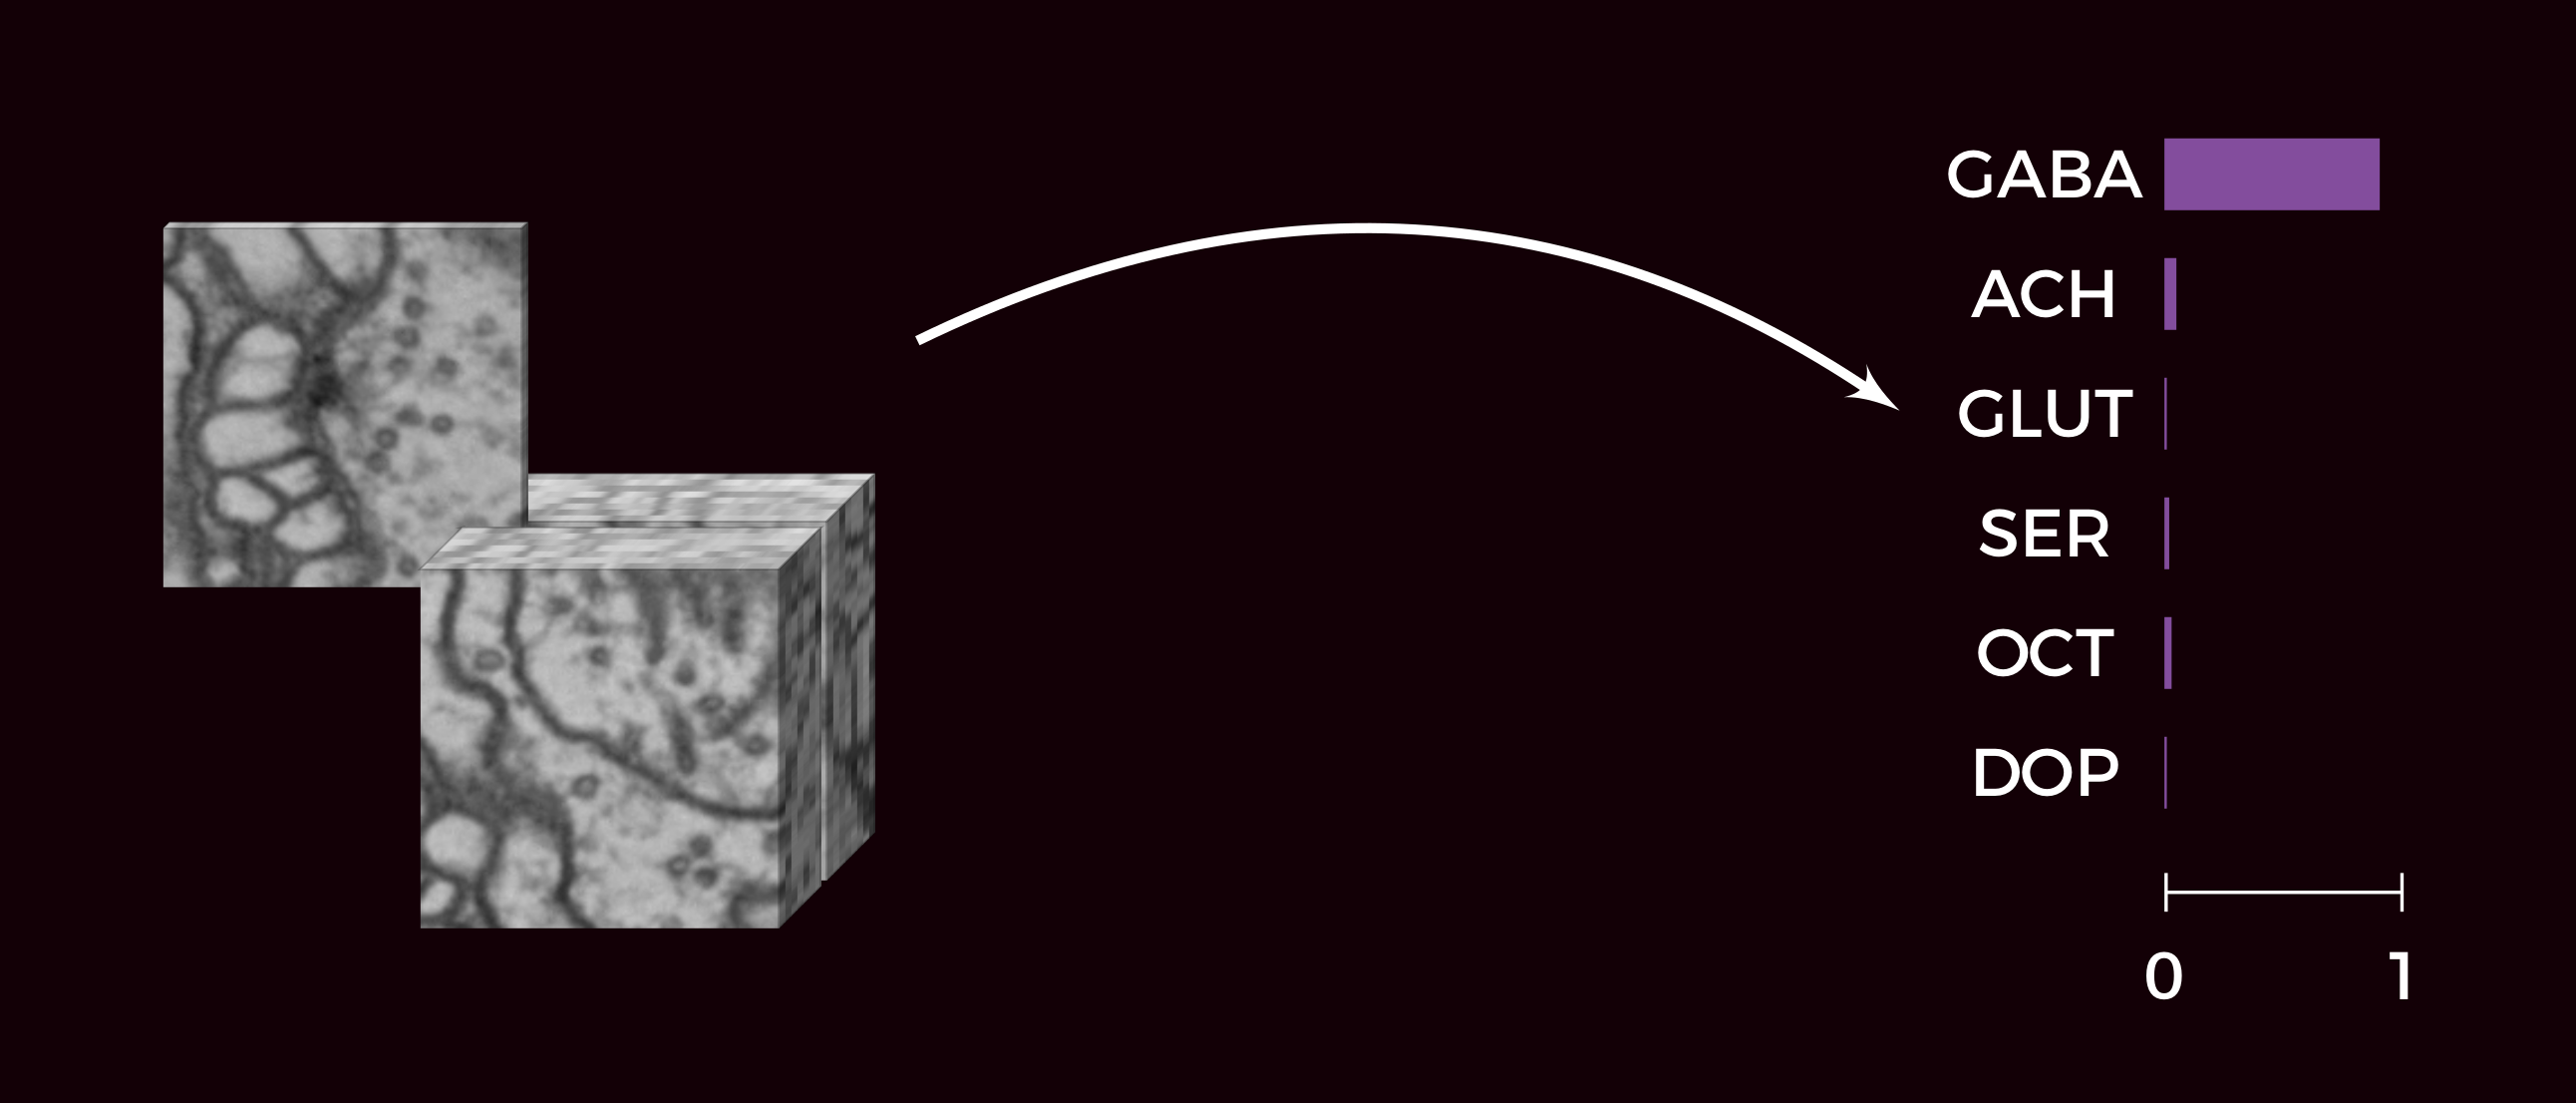

### Task 1: Train an Image Classifier

In this section, we will implement and train a VGG classifier to classify images of synapses into one of six classes, corresponding to the neurotransmitter type that is released at the synapse: GABA, acethylcholine, glutamate, octopamine, serotonin, and dopamine.

#### Task 1.1: Create a Balanced Dataloader

The data we use for this exercise is located in `data/raw/synapses`, where we have one subdirectory for each neurotransmitter type. Look at a few examples to familiarize yourself with the dataset. You will notice that the dataset is not balanced, i.e., we have much more examples of one class versus another one.

This class imbalance is problematic for training a classifier. Imagine that 70% of our images would be of one class, then the classifier would do really well predicting this class all the time, without having learnt anything of substance. It is therefore important to balance the dataset, i.e., present the same number of images per class to the classifier during training.

Split the available images into a train, validation, and test dataset with proportions of 0.7, 0.15, and 0.15, respectively.

For the training dataset, create a `torch` `DataLoader` that creates batches of eight images and their corresponding labels. Each image should be randomly and equally selected from the six available classes (i.e., for each image sample pick a random class, then pick a random image from this class).

Call your dataloader variable `dataloader`.

Each image should be returned as a 2D `numpy` array with float values between 0 and 1. The label for each image should be the name of the directory for this class (e.g., `0_gaba`).

##### Hints

* `torch.utils.data` has a convenience function to split a dataset
* instead of picking first a class and then an image in this class, we can also pick each image with a different probability
* look in `torch.utils.data.sampler` for a class that helps to balance the dataset during training

In [ ]:
# insert your solution here

In [5]:
#########################
# Solution for Task 1.1 #
#########################

from skimage.io import imread
from torch.utils.data import DataLoader, random_split
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision.datasets import ImageFolder
import torch
import numpy as np

def load_image(filename):
    
    image = imread(filename)
    
    # images are grescale, we only need one of the RGB channels 
    image = image[:, :, 0]
    
    # img is uint8 in [0, 255], but we want float32 in [-1, 1]
    image = image.astype(np.float32)/255.0
    image = (image - 0.5)/0.5
    
    return image

# create a dataset for all images of all classes
full_dataset = ImageFolder(root='data/raw/synapses', loader=load_image)

# randomly split the dataset into train, validation, and test
num_images = len(full_dataset)
# ~70% for training
num_training = int(0.7 * num_images)
# ~15% for validation
num_validation = int(0.15 * num_images)
# ~15% for testing
num_test = num_images - (num_training + num_validation)
# split the data randomly (but with a fixed random seed)
train_dataset, validation_dataset, test_dataset = random_split(
    full_dataset,
    [num_training, num_validation, num_test],
    generator=torch.Generator().manual_seed(23061912))

# compute class weights in training dataset for uniform sampling
ys = np.array([y for _, y in train_dataset])
counts = np.bincount(ys)
label_weights = 1.0 / counts
weights = label_weights[ys]

print("Number of images per class:")
for c, n, w in zip(full_dataset.classes, counts, label_weights):
    print(f"\t{c}:\tn={n}\tweight={w}")

# create a data loader with uniform sampling
sampler = WeightedRandomSampler(weights, len(weights))
# this data loader will serve 8 images in a "mini-batch" at a time
dataloader = DataLoader(train_dataset, batch_size=8, drop_last=True, sampler=sampler)

Number of images per class:
	0_gaba:	n=15855	weight=6.30715862503942e-05
	1_acetylcholine:	n=4911	weight=0.00020362451639177357
	2_glutamate:	n=3550	weight=0.00028169014084507044
	3_serotonin:	n=2297	weight=0.00043535045711797995
	4_octopamine:	n=951	weight=0.0010515247108307045
	5_dopamine:	n=4649	weight=0.00021510002151000216


The cell below visualizes a single, randomly chosen batch from the training data loader. Feel free to execute this cell multiple times to get a feeling for the dataset. See if you can tell the difference between synapses of different types!

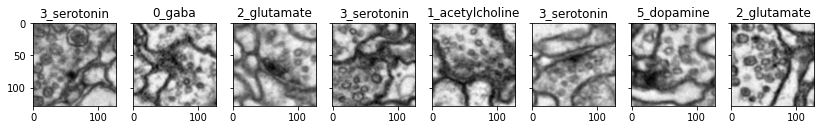

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

def show_batch(x, y):
    fig, axs = plt.subplots(1, x.shape[0], figsize=(14, 14), sharey=True)
    for i in range(x.shape[0]):
        axs[i].imshow(np.squeeze(x[i]), cmap='gray')
        axs[i].set_title(train_dataset.dataset.classes[y[i].item()])
    plt.show()

# show a random batch from the data loader
# (run this cell repeatedly to see different batches)
for x, y in dataloader:
    show_batch(x, y)
    break

#### Task 1.2: Create a VGG Network, Loss, and Optimizer

We will use a so-called VGG network to classify the synapse images. The input to the network will be a 2D image as provided by your dataloader. The output will be a vector of six floats, corresponding to the probability of the input to belong to the six classes.

Implement a VGG network with the following specificatons:

* the constructor takes the size of the 2D input image as height and width
* the network starts with a downsample path consisting of:
    * one convolutional layer, kernel size (3, 3), to create 12 feature maps
    * batch norm in 2D over those feature maps
    * ReLU activation function
    * one convolutional layer, kernel size (3, 3), to create 12 feature maps
    * batch norm in 2D over those feature maps
    * ReLU activation function
    * max pool downsampling with a factor of (2, 2)
* followed by three more downsampling paths like the one above, every time doubling the number of feature maps (i.e., the second one will have 24, the third 48, and the fourth 96)
* then two fully connected layers with:
    * 4096 units
    * ReLU activation function
    * drop out
* finally, one more fully connected layer with
    * 6 units (these correspond to the classes)
    * no activation function

Implement this network as a `torch.nn.Module` and call the class `Vgg2D`.

In [7]:
class Vgg2D(torch.nn.Module):
    
    # insert your solution here
    pass

In [8]:
#########################
# Solution for Task 1.2 #
#########################

class Vgg2D(torch.nn.Module):

    def __init__(
            self,
            input_size,
            fmaps=12,
            downsample_factors=[(2, 2), (2, 2), (2, 2), (2, 2)],
            output_classes=6):

        super(Vgg2D, self).__init__()

        self.input_size = input_size

        current_fmaps = 1
        current_size = tuple(input_size)

        features = []
        for i in range(len(downsample_factors)):

            features += [
                torch.nn.Conv2d(
                    current_fmaps,
                    fmaps,
                    kernel_size=3,
                    padding=1),
                torch.nn.BatchNorm2d(fmaps),
                torch.nn.ReLU(inplace=True),
                torch.nn.Conv2d(
                    fmaps,
                    fmaps,
                    kernel_size=3,
                    padding=1),
                torch.nn.BatchNorm2d(fmaps),
                torch.nn.ReLU(inplace=True),
                torch.nn.MaxPool2d(downsample_factors[i])
            ]

            current_fmaps = fmaps
            fmaps *= 2

            size = tuple(
                int(c/d)
                for c, d in zip(current_size, downsample_factors[i]))
            check = (
                s*d == c
                for s, d, c in zip(size, downsample_factors[i], current_size))
            assert all(check), \
                "Can not downsample %s by chosen downsample factor" % \
                (current_size,)
            current_size = size

        self.features = torch.nn.Sequential(*features)

        classifier = [
            torch.nn.Linear(
                current_size[0] *
                current_size[1] *
                current_fmaps,
                4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(),
            torch.nn.Linear(
                4096,
                4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(),
            torch.nn.Linear(
                4096,
                output_classes)
        ]

        self.classifier = torch.nn.Sequential(*classifier)
    
    def forward(self, raw):

        # add a channel dimension to raw
        shape = tuple(raw.shape)
        raw = raw.reshape(shape[0], 1, shape[1], shape[2])
        
        # compute features
        f = self.features(raw)
        f = f.view(f.size(0), -1)
        
        # classify
        y = self.classifier(f)

        return y

In [9]:
# get the size of our images
for x, y in train_dataset:
    input_size = x.shape
    break

# create the model to train
model = Vgg2D(input_size)

# create a loss
loss = torch.nn.CrossEntropyLoss()

# create an optimzer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

#### Task 1.3: Train the VGG Network

In [10]:
# use a GPU, if it is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Will use device {device} for training")

Will use device cpu for training


The next cell merely defines some convenience functions for training, validation, and testing:

In [11]:
from tqdm import tqdm

def train():
    '''Train the model for one epoch.'''

    # set the model into train mode
    model.train()

    epoch_loss = 0

    num_batches = 0
    for x, y in tqdm(dataloader, 'train'):

        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()

        y_pred = model(x)
        l = loss(y_pred, y)
        l.backward()

        optimizer.step()

        epoch_loss += l
        num_batches += 1

    return epoch_loss/num_batches

def evaluate(dataloader, name):
    
    correct = 0
    total = 0
    for x, y in tqdm(dataloader, name):
        
        x, y = x.to(device), y.to(device)
        
        logits = model(x)
        probs = torch.nn.Softmax(dim=1)(logits)
        predictions = torch.argmax(probs, dim=1)
        
        correct += int(torch.sum(predictions == y).cpu().detach().numpy())
        total += len(y)
    
    accuracy = correct/total

    return accuracy

def validate():
    '''Evaluate prediction accuracy on the validation dataset.'''
    
    model.eval()
    dataloader = DataLoader(validation_dataset, batch_size=32)
   
    return evaluate(dataloader, 'validate')

def test():
    '''Evaluate prediction accuracy on the test dataset.'''
    
    model.eval()
    dataloader = DataLoader(test_dataset, batch_size=32)
    
    return evaluate(dataloader, 'test')

We are ready to train. After each epoch (roughly going through each training image once), we report the training loss and the validation accuracy.

In [12]:
for epoch in range(100):
    
    epoch_loss = train()
    print(f"epoch {epoch}, training loss={epoch_loss}")
    
    accuracy = validate()
    print(f"epoch {epoch}, validation accuracy={accuracy}")

train:   0%|                                                                     | 0/4026 [00:00<?, ?it/s]/home/jan/.miniconda3/envs/09_knowledge_extraction/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
train:   3%|█▍                                                         | 102/4026 [00:33<21:37,  3.03it/s]


KeyboardInterrupt: 

Feel free to watch your model train... 
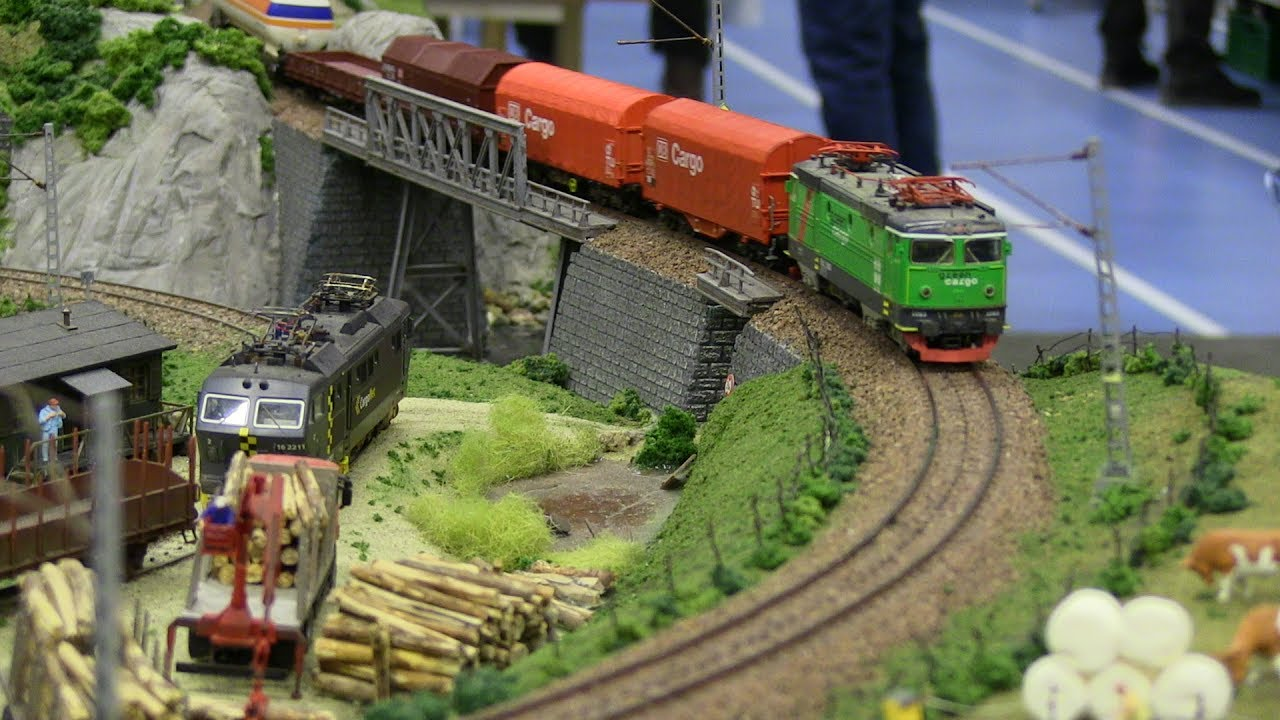

Or interrupt the current cell and run the next one, which will load a checkpoint that we already prepared.

In [72]:
# SHORTCUT (OPTIONAL): load a pretrained model

# change this to True and run this cell if you want a shortcut
yes_I_want_the_pretrained_model = False

if yes_I_want_the_pretrained_model:
    checkpoint = torch.load('checkpoints/synapses/classifier/vgg_checkpoint', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])

In [73]:
accuracy = test()
print(f"final test accuracy: {accuracy}")

test: 100%|█████████████████████████████████████████████████████████████| 216/216 [00:14<00:00, 14.96it/s]

final test accuracy: 0.8054750869061413


This concludes the first section. We now have a classifier that can discriminate between images of different types.

If you used the images we provided, the classifier is not perfect (you should get an accuracy of around 80%), but pretty good considering that there are six different types of images. Furthermore, it is not so clear for humans how the classifier does it. Feel free to explore the data a bit more and see for yourself if you can tell the difference betwee, say, GABAergic and glutamatergic synapses.

So this is an interesting situation: The VGG network knows something we don't quite know. In the next section, we will see how we can visualize the relevant differences between images of different types.

### Task 2: Train a GAN to Translate Images

We will train a so-called CycleGAN to translate images from one class to another.

Cloning into 'neuromatch_xai'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 75 (delta 22), reused 73 (delta 20), pack-reused 0
Unpacking objects: 100% (75/75), 53.38 KiB | 896.00 KiB/s, done.


In this example, we will translate between GABAergic and glutamatergic synapses.

First, we have to copy images of either type into a format that the CycleGAN library is happy with. Afterwards, we can start training on those images.

In [1]:
import cycle_gan
cycle_gan.prepare_dataset('data/raw/synapses/', ['0_gaba', '2_glutamate'])
cycle_gan.train('data/raw/synapses/', '0_gaba', '2_glutamate', 128)

----------------- Options ---------------
           aux_checkpoint: None                          
              aux_class_A: 0                             
              aux_class_B: 0                             
             aux_input_nc: 1                             
           aux_input_size: 128                           
                  aux_net: None                          
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: checkpoints/resnet_9blocks_0_gaba_2_glutamate	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 128                           
                 dataroot: data/raw/synapses/cycle_gan/0_gaba_2_glutamate	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             dis

epoch: 1, iters: 2500, time: 0.135, data: 0.002, D_A: 0.306, G_A: 0.289, cycle_A: 0.535, idt_A: 0.295, D_B: 0.278, G_B: 0.302, cycle_B: 0.698, idt_B: 0.211, 
epoch: 1, iters: 2600, time: 0.136, data: 0.001, D_A: 0.544, G_A: 0.182, cycle_A: 0.768, idt_A: 0.762, D_B: 0.208, G_B: 0.357, cycle_B: 1.610, idt_B: 0.229, 
epoch: 1, iters: 2700, time: 0.139, data: 0.002, D_A: 0.301, G_A: 1.040, cycle_A: 0.792, idt_A: 0.190, D_B: 0.444, G_B: 0.460, cycle_B: 0.450, idt_B: 0.378, 
epoch: 1, iters: 2800, time: 0.137, data: 0.002, D_A: 0.266, G_A: 0.304, cycle_A: 0.279, idt_A: 0.175, D_B: 0.368, G_B: 0.259, cycle_B: 0.390, idt_B: 0.140, 
epoch: 1, iters: 2900, time: 0.133, data: 0.002, D_A: 0.264, G_A: 0.359, cycle_A: 0.733, idt_A: 0.312, D_B: 0.195, G_B: 0.351, cycle_B: 0.661, idt_B: 0.379, 
epoch: 1, iters: 3000, time: 0.138, data: 0.002, D_A: 0.304, G_A: 0.347, cycle_A: 0.302, idt_A: 0.185, D_B: 0.233, G_B: 0.410, cycle_B: 0.372, idt_B: 0.135, 
epoch: 1, iters: 3100, time: 0.133, data: 0.002, D_A

epoch: 1, iters: 7700, time: 0.137, data: 0.002, D_A: 0.284, G_A: 0.163, cycle_A: 0.334, idt_A: 0.203, D_B: 0.244, G_B: 0.392, cycle_B: 0.457, idt_B: 0.193, 
epoch: 1, iters: 7800, time: 0.139, data: 0.002, D_A: 0.131, G_A: 0.069, cycle_A: 0.524, idt_A: 0.177, D_B: 0.215, G_B: 0.417, cycle_B: 0.403, idt_B: 0.199, 
epoch: 1, iters: 7900, time: 0.137, data: 0.002, D_A: 0.273, G_A: 0.257, cycle_A: 1.054, idt_A: 0.243, D_B: 0.221, G_B: 0.412, cycle_B: 0.565, idt_B: 0.504, 
epoch: 1, iters: 8000, time: 0.136, data: 0.001, D_A: 0.361, G_A: 0.162, cycle_A: 0.850, idt_A: 0.390, D_B: 0.288, G_B: 0.214, cycle_B: 0.869, idt_B: 0.359, 
epoch: 1, iters: 8100, time: 0.136, data: 0.002, D_A: 0.295, G_A: 0.221, cycle_A: 0.559, idt_A: 0.187, D_B: 0.236, G_B: 0.394, cycle_B: 0.446, idt_B: 0.272, 
epoch: 1, iters: 8200, time: 0.142, data: 0.002, D_A: 0.238, G_A: 0.198, cycle_A: 0.493, idt_A: 0.287, D_B: 0.254, G_B: 0.380, cycle_B: 0.628, idt_B: 0.145, 
epoch: 1, iters: 8300, time: 0.134, data: 0.001, D_A

epoch: 1, iters: 12900, time: 0.138, data: 0.002, D_A: 0.250, G_A: 0.395, cycle_A: 0.386, idt_A: 0.167, D_B: 0.257, G_B: 0.330, cycle_B: 0.373, idt_B: 0.196, 
epoch: 1, iters: 13000, time: 0.132, data: 0.002, D_A: 0.248, G_A: 0.221, cycle_A: 0.760, idt_A: 0.166, D_B: 0.251, G_B: 0.526, cycle_B: 0.294, idt_B: 0.380, 
epoch: 1, iters: 13100, time: 0.132, data: 0.002, D_A: 0.224, G_A: 0.130, cycle_A: 0.278, idt_A: 0.155, D_B: 0.239, G_B: 0.298, cycle_B: 0.395, idt_B: 0.159, 
epoch: 1, iters: 13200, time: 0.140, data: 0.002, D_A: 0.316, G_A: 0.284, cycle_A: 0.910, idt_A: 0.184, D_B: 0.174, G_B: 0.065, cycle_B: 0.329, idt_B: 0.445, 
epoch: 1, iters: 13300, time: 0.132, data: 0.001, D_A: 0.236, G_A: 0.531, cycle_A: 0.337, idt_A: 0.263, D_B: 0.207, G_B: 0.128, cycle_B: 0.559, idt_B: 0.176, 
epoch: 1, iters: 13400, time: 0.133, data: 0.002, D_A: 0.306, G_A: 0.045, cycle_A: 0.818, idt_A: 0.141, D_B: 0.271, G_B: 0.384, cycle_B: 0.288, idt_B: 0.427, 
epoch: 1, iters: 13500, time: 0.132, data: 0.0

epoch: 1, iters: 18100, time: 0.134, data: 0.002, D_A: 0.203, G_A: 0.415, cycle_A: 0.400, idt_A: 0.327, D_B: 0.202, G_B: 0.322, cycle_B: 0.764, idt_B: 0.215, 
epoch: 1, iters: 18200, time: 0.139, data: 0.002, D_A: 0.167, G_A: 0.285, cycle_A: 0.764, idt_A: 0.196, D_B: 0.262, G_B: 0.156, cycle_B: 0.485, idt_B: 0.324, 
epoch: 1, iters: 18300, time: 0.134, data: 0.001, D_A: 0.146, G_A: 0.176, cycle_A: 0.302, idt_A: 0.495, D_B: 0.167, G_B: 0.457, cycle_B: 1.072, idt_B: 0.121, 
epoch: 1, iters: 18400, time: 0.136, data: 0.002, D_A: 0.226, G_A: 0.528, cycle_A: 0.279, idt_A: 0.159, D_B: 0.214, G_B: 0.227, cycle_B: 0.366, idt_B: 0.140, 
epoch: 1, iters: 18500, time: 0.132, data: 0.002, D_A: 0.129, G_A: 0.341, cycle_A: 0.339, idt_A: 0.320, D_B: 0.185, G_B: 0.303, cycle_B: 0.700, idt_B: 0.176, 
epoch: 1, iters: 18600, time: 0.136, data: 0.002, D_A: 0.340, G_A: 0.430, cycle_A: 0.482, idt_A: 0.233, D_B: 0.219, G_B: 0.137, cycle_B: 0.403, idt_B: 0.238, 
epoch: 1, iters: 18700, time: 0.137, data: 0.0

epoch: 2, iters: 552, time: 0.137, data: 0.001, D_A: 0.182, G_A: 0.215, cycle_A: 1.130, idt_A: 0.191, D_B: 0.085, G_B: 0.565, cycle_B: 0.356, idt_B: 0.533, 
epoch: 2, iters: 652, time: 0.138, data: 0.001, D_A: 0.303, G_A: 0.471, cycle_A: 0.392, idt_A: 0.180, D_B: 0.445, G_B: 0.996, cycle_B: 0.235, idt_B: 0.147, 
epoch: 2, iters: 752, time: 0.141, data: 0.001, D_A: 0.246, G_A: 0.186, cycle_A: 0.451, idt_A: 0.280, D_B: 0.466, G_B: 0.600, cycle_B: 0.610, idt_B: 0.196, 
epoch: 2, iters: 852, time: 0.142, data: 0.001, D_A: 0.270, G_A: 0.278, cycle_A: 0.718, idt_A: 0.289, D_B: 0.293, G_B: 0.428, cycle_B: 0.530, idt_B: 0.450, 
epoch: 2, iters: 952, time: 0.138, data: 0.001, D_A: 0.376, G_A: 0.085, cycle_A: 0.269, idt_A: 0.139, D_B: 0.292, G_B: 0.217, cycle_B: 0.273, idt_B: 0.164, 
epoch: 2, iters: 1052, time: 0.139, data: 0.001, D_A: 0.267, G_A: 0.385, cycle_A: 1.804, idt_A: 0.303, D_B: 0.038, G_B: 0.337, cycle_B: 0.410, idt_B: 0.847, 
epoch: 2, iters: 1152, time: 0.139, data: 0.001, D_A: 0.2

KeyboardInterrupt: 

...this time again.
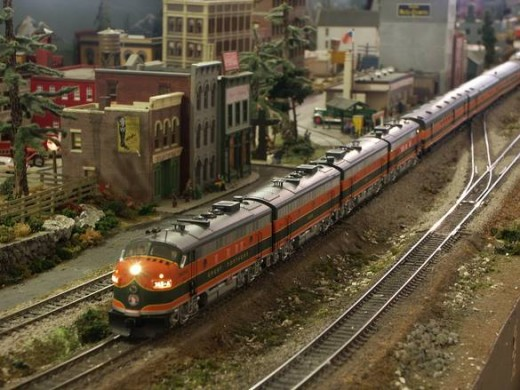

Training the CycleGAN takes a lot longer than the VGG we trained above (on the synapse dataset, this will be around 7 days...).

To continue, interrupt the kernel and continue with the next one, which will just use one of the pretrained CycleGAN models for the synapse dataset.

In [1]:
# translate images from class A to B, and classify each with the VGG network trained above
cycle_gan.test(
    data_dir='data/raw/synapses/',
    class_A='0_gaba',
    class_B='2_glutamate',
    img_size=128,
    checkpoints_dir='checkpoints/synapses/cycle_gan/gaba_glutamate/',
    vgg_checkpoint='checkpoints/synapses/classifier/vgg_checkpoint'
)

Testing with suffix _A
----------------- Options ---------------
             aspect_ratio: 1.0                           
           aux_checkpoint: checkpoints/synapses/classifier/vgg_checkpoint	[default: None]
   aux_downsample_factors: [(2, 2), (2, 2), (2, 2), (2, 2)]
             aux_input_nc: 1                             
           aux_input_size: 128                           
                  aux_net: vgg2d                         
       aux_output_classes: 6                             
               batch_size: 1                             
          checkpoints_dir: checkpoints/synapses/cycle_gan/gaba_glutamate	[default: ./checkpoints]
                crop_size: 128                           
                 dataroot: data/raw/synapses/cycle_gan/0_gaba_2_glutamate	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                 

processing (0000)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/0_train_fake.png']
processing (0005)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10001_train_real.png']
processing (0010)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10004_train_fake.png']
processing (0015)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10006_train_real.png']
processing (0020)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10009_train_fake.png']
processing (0025)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10010_train_real.png']
processing (0030)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10013_train_fake.png']
processing (0035)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/im

processing (0320)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10144_train_fake.png']
processing (0325)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10146_train_real.png']
processing (0330)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10149_train_fake.png']
processing (0335)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10150_train_real.png']
processing (0340)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10153_train_fake.png']
processing (0345)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10155_train_real.png']
processing (0350)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/10158_train_fake.png']
processing (0355)-th image... ['data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_lates

In [2]:
import glob
import json

class_A_index = 0
class_B_index = 2

result_dir = 'data/raw/synapses/cycle_gan/0_gaba_2_glutamate/results/test_latest/images/'
classification_results = []
for f in glob.glob(result_dir + '/*.json'):
    result = json.load(open(f))
    result['basename'] = f.replace('_aux.json', '')
    classification_results.append(result)
classification_results.sort(
    key=lambda c: c['aux_real'][class_A_index] * c['aux_fake'][class_B_index],
    reverse=True)

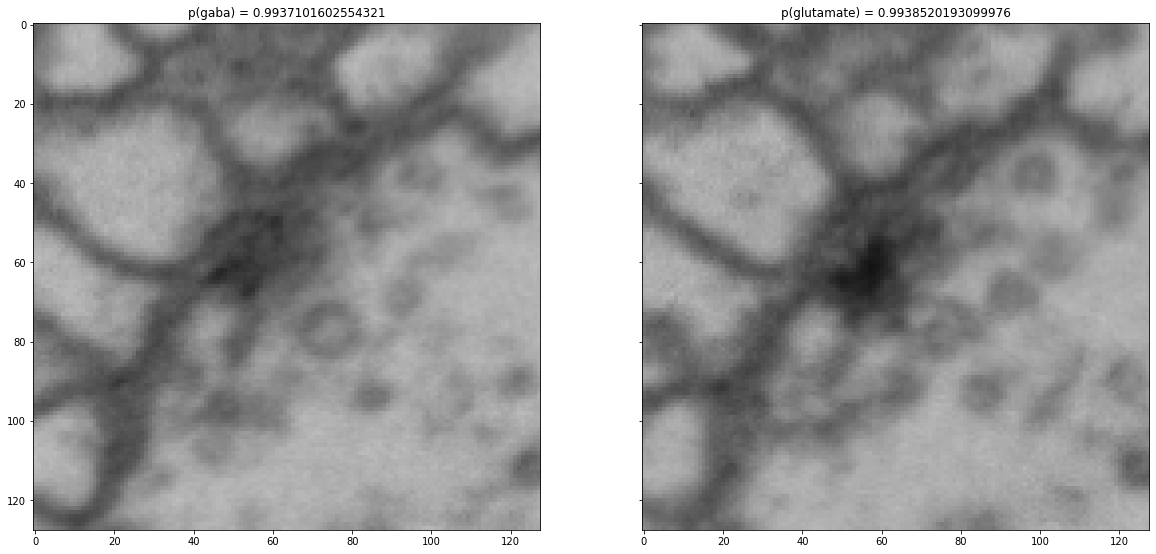

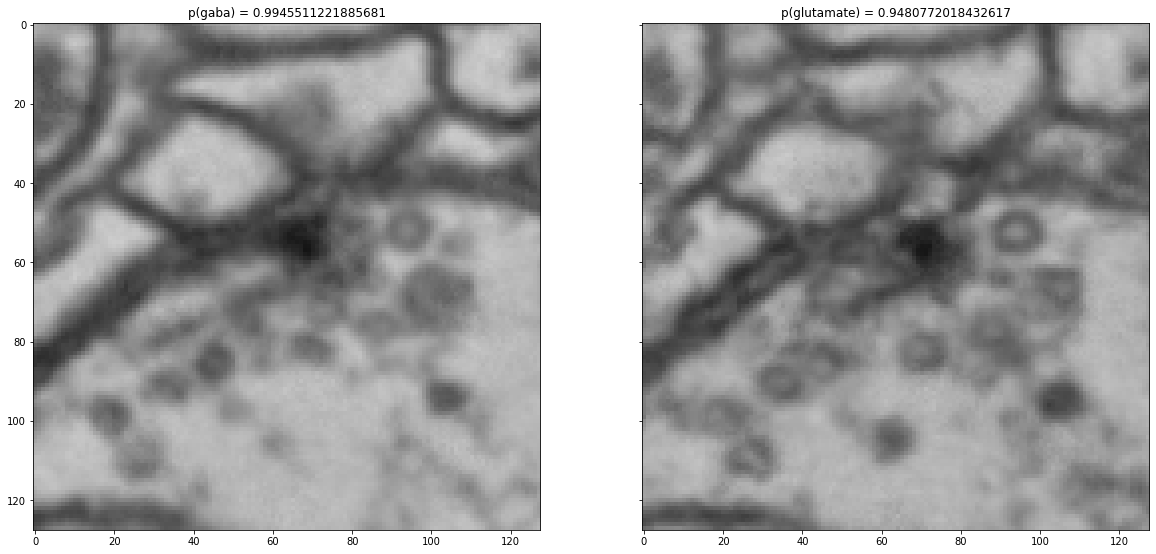

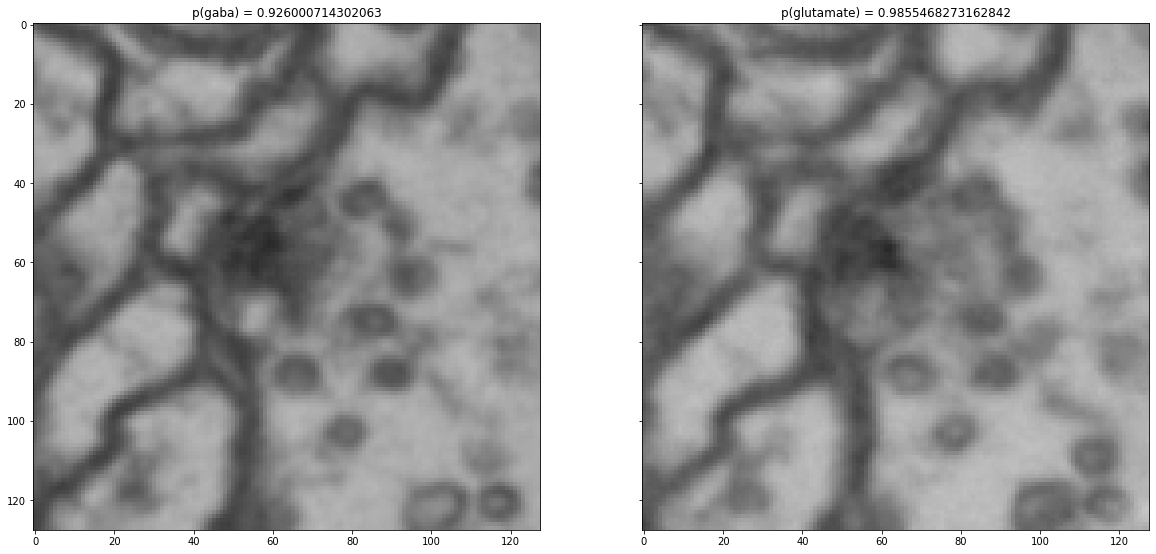

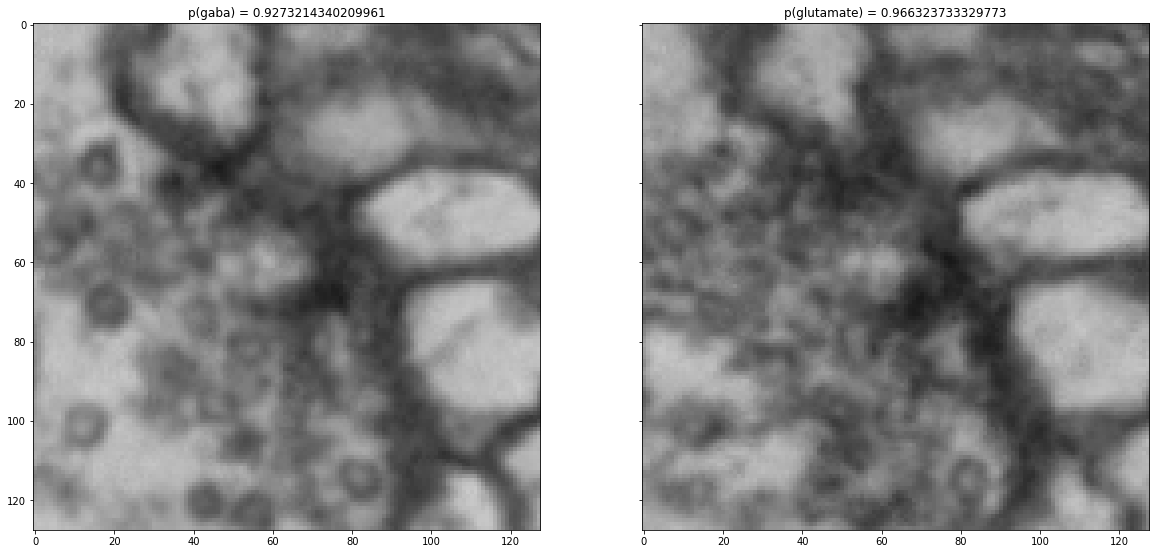

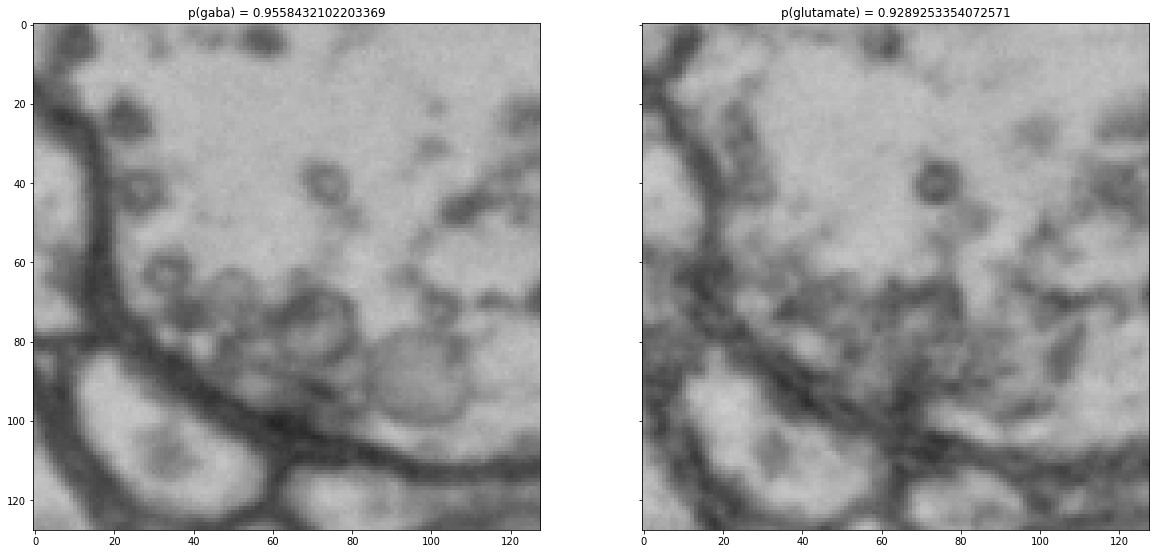

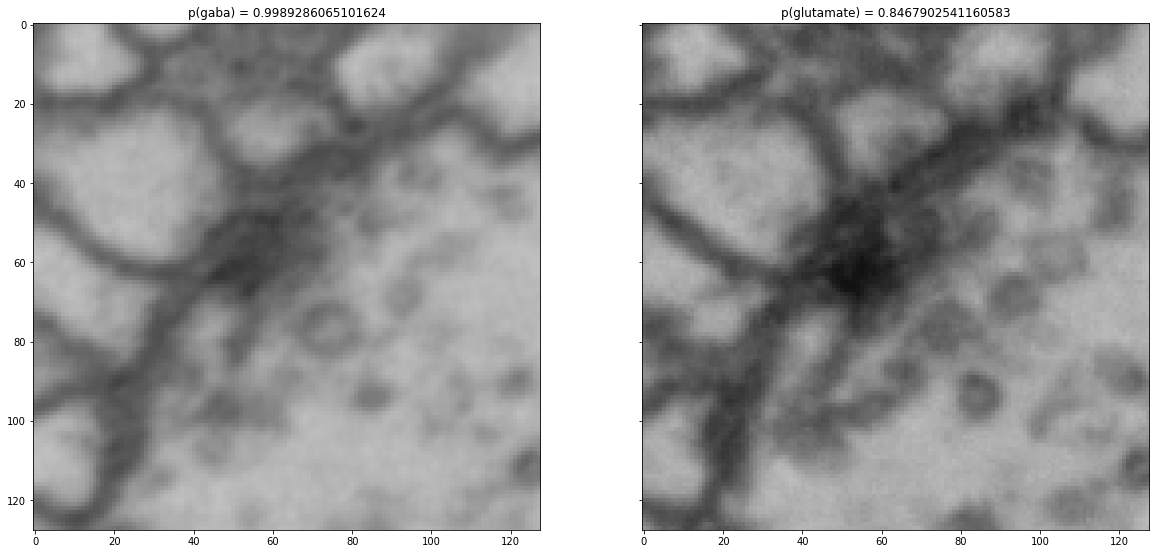

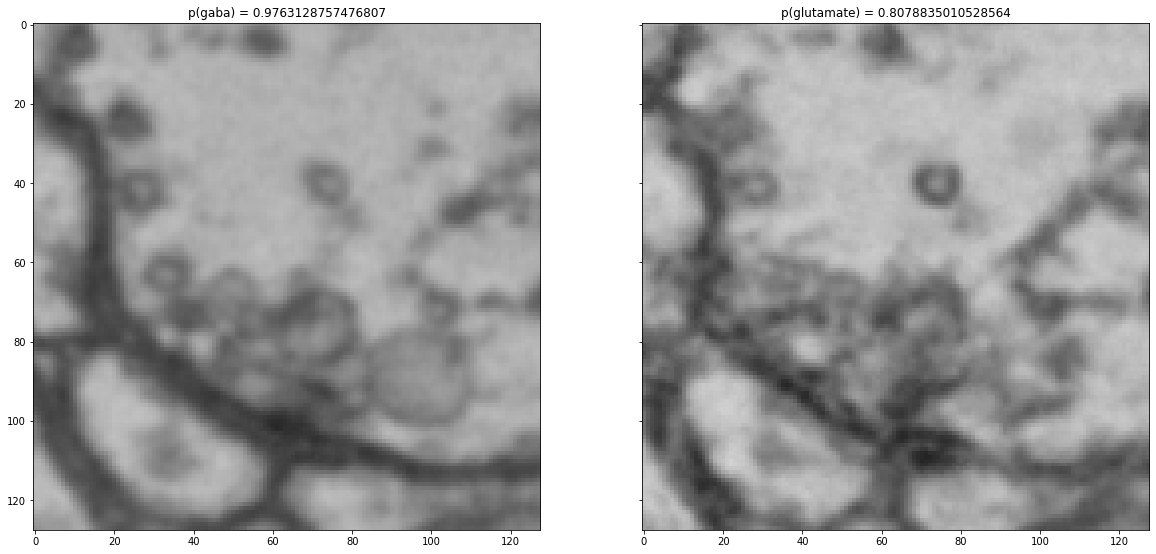

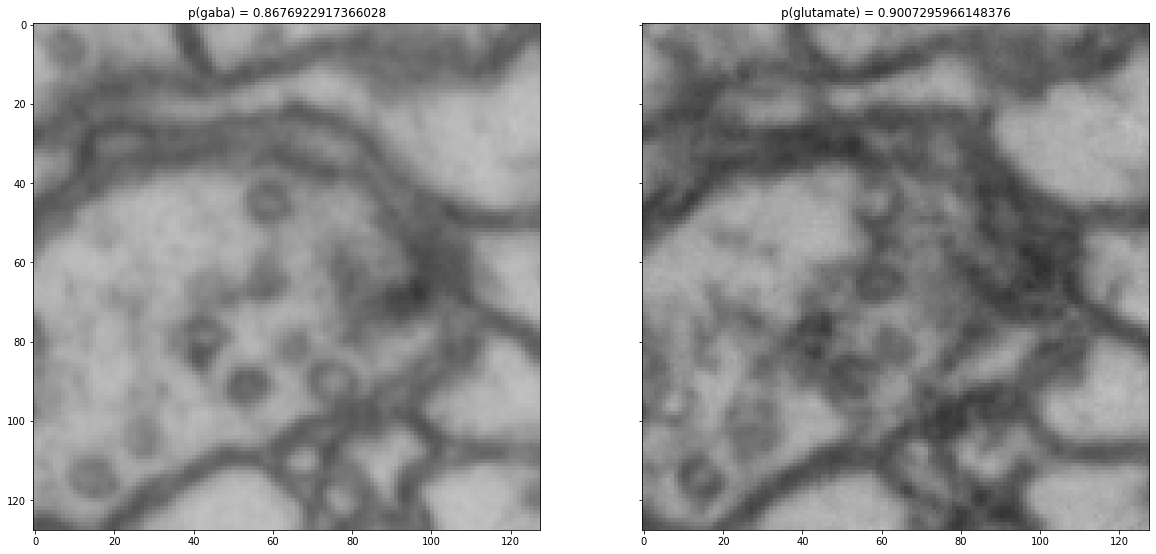

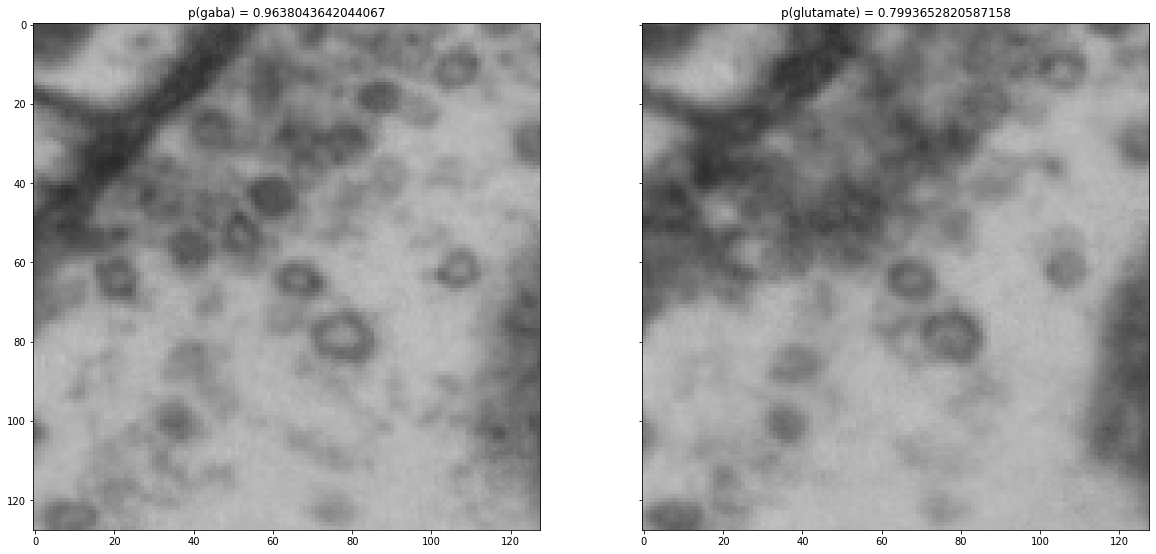

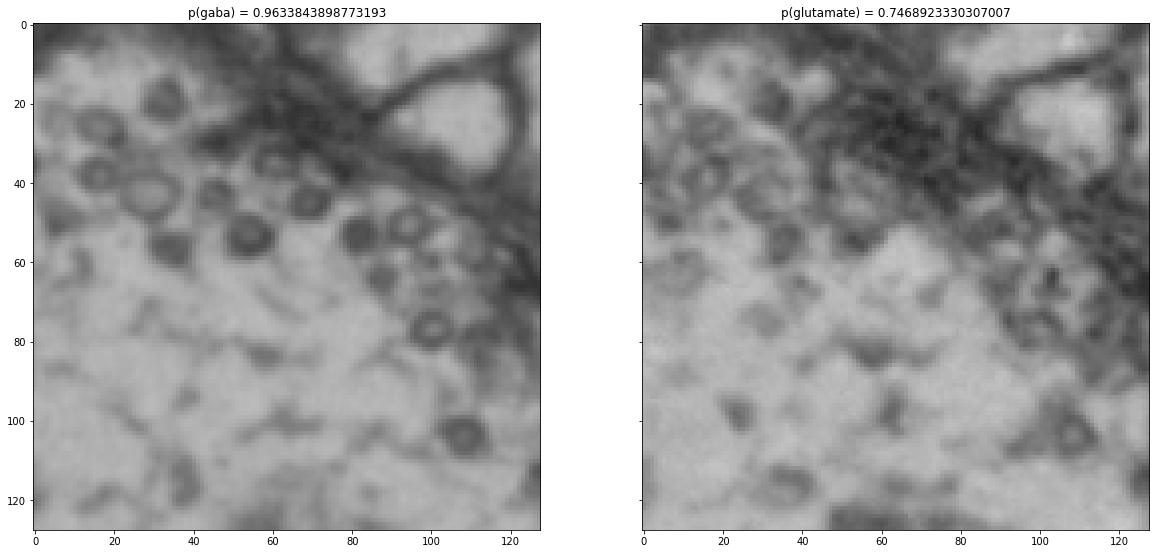

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

def show_pair(a, b, score_a, score_b, class_a, class_b):
    fig, axs = plt.subplots(1, 2, figsize=(20, 20), sharey=True)
    axs[0].imshow(a, cmap='gray')
    axs[0].set_title(f"p({class_a}) = " + str(score_a))
    axs[1].imshow(b, cmap='gray')
    axs[1].set_title(f"p({class_b}) = " + str(score_b))
    plt.show()

# show the top successful translations (according to our VGG classifier)
for i in range(10):
    basename = classification_results[i]['basename']
    score_A = classification_results[i]['aux_real'][class_A_index]
    score_B = classification_results[i]['aux_fake'][class_B_index]
    real_A = imread(basename + '_real.png')
    fake_B = imread(basename + '_fake.png')
    show_pair(real_A, fake_B, score_A, score_B, 'gaba', 'glutamate')

# Section 3: Highlighting Class-Relevant Differences

dl
110
3552.257638620952


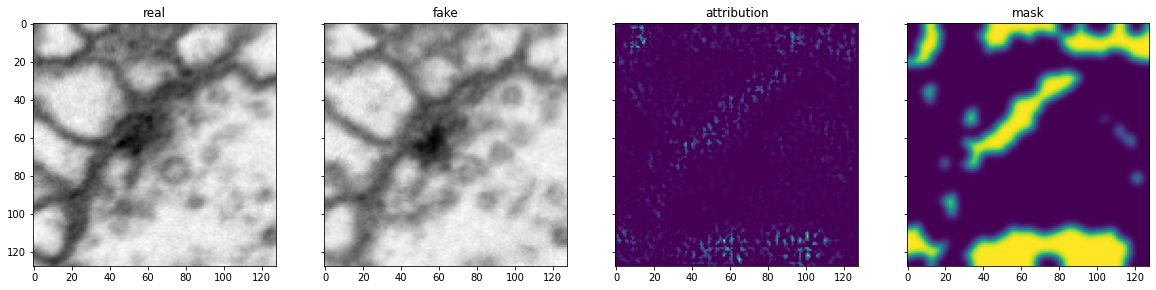

115
2127.5349640667305


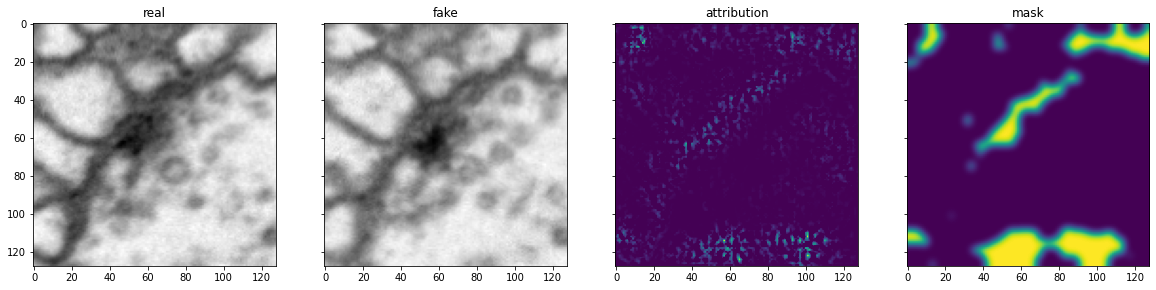

120
1392.7139413273435


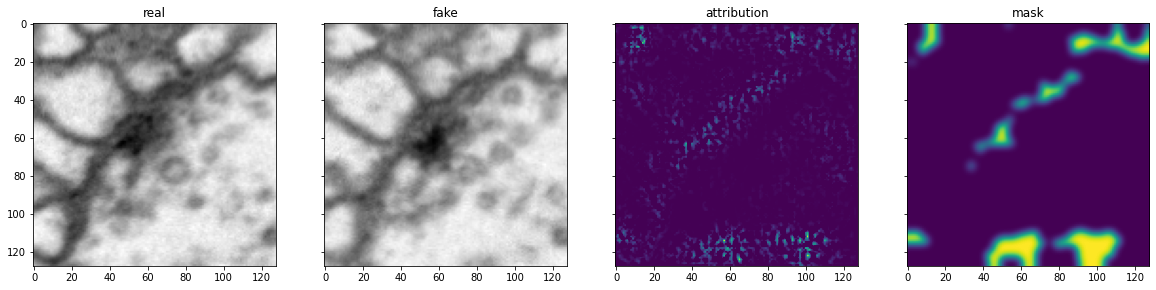

125
869.1432768697792


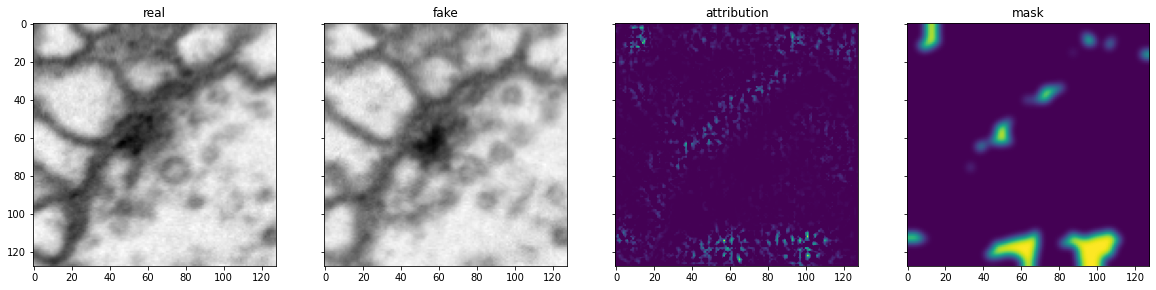

d_dl
110
3908.4394068508186


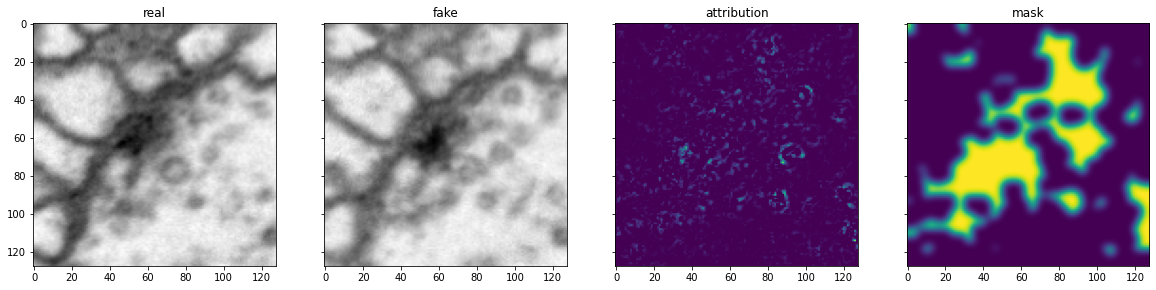

115
1930.2083535218637


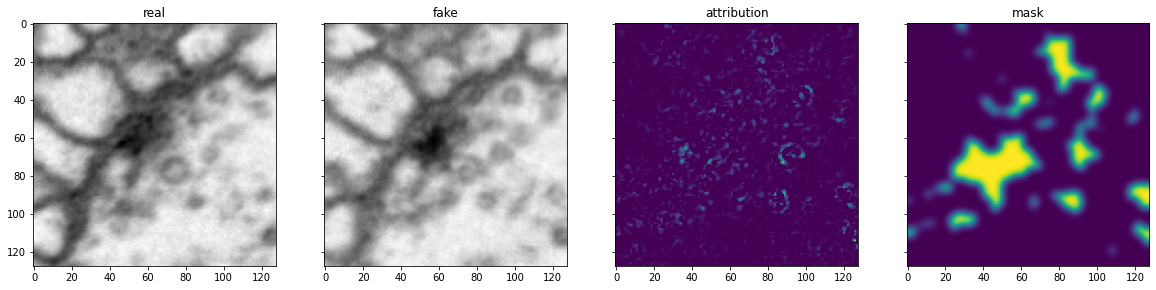

120
753.3815806519942


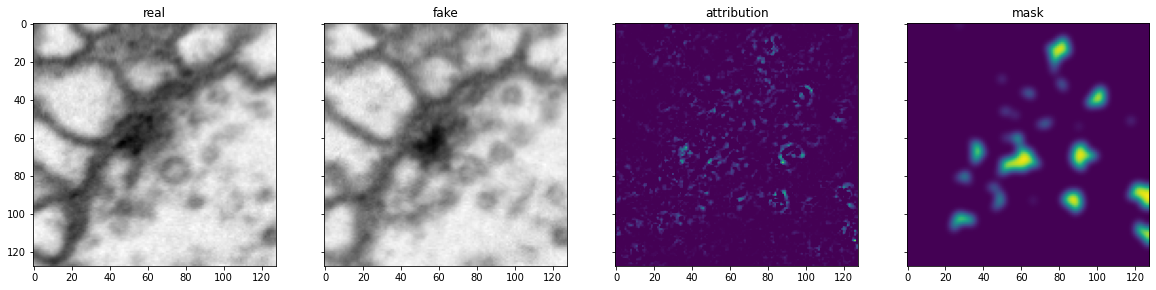

125
371.7636734862897


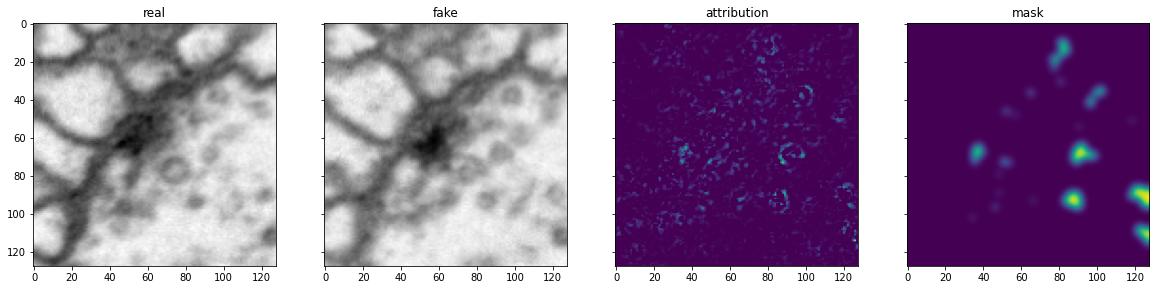

dl
110
3759.608408939762


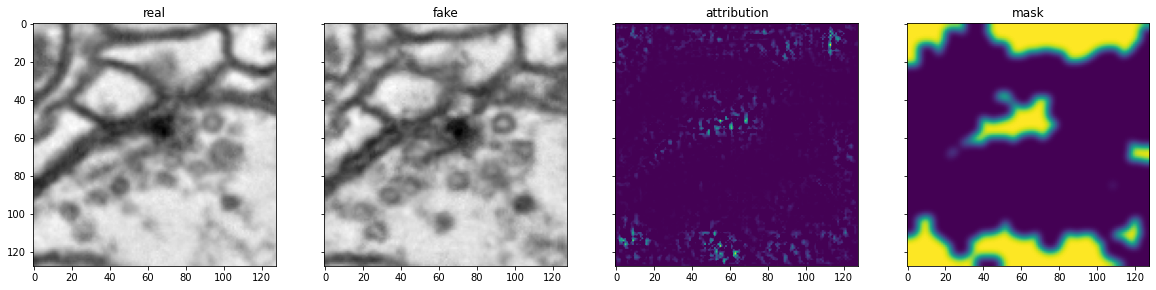

115
1959.7601981530247


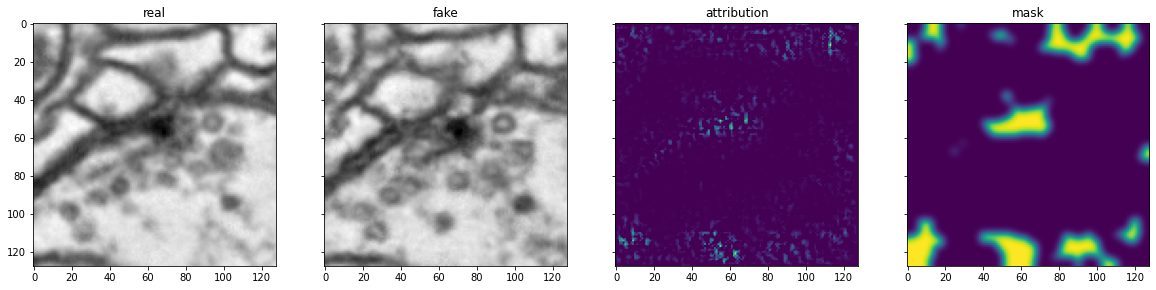

120
1098.6314887355065


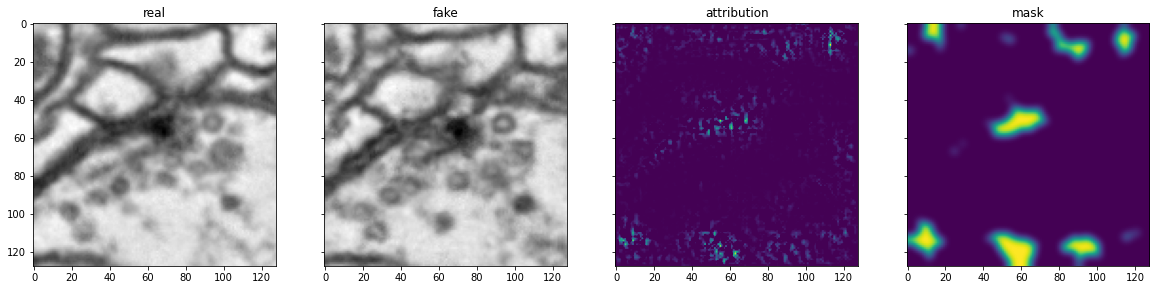

125
622.5690962411925


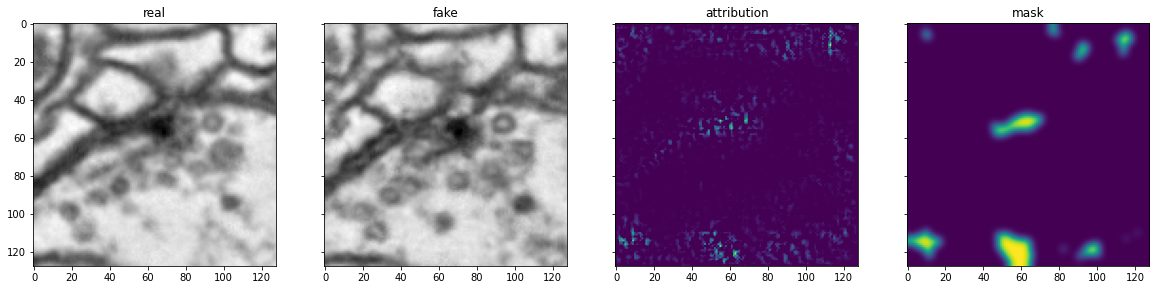

d_dl
110
2619.838552315672


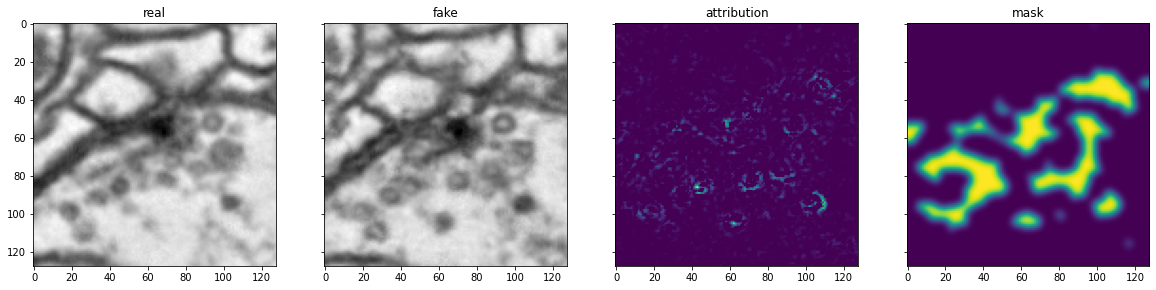

115
1239.0000000000005


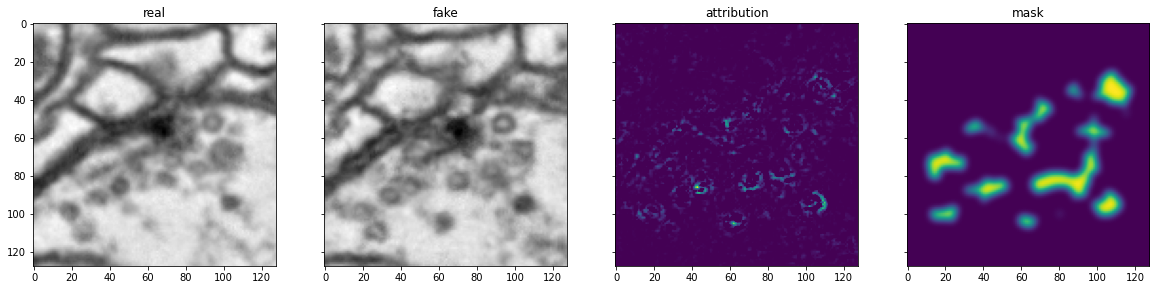

120
538.0000000000002


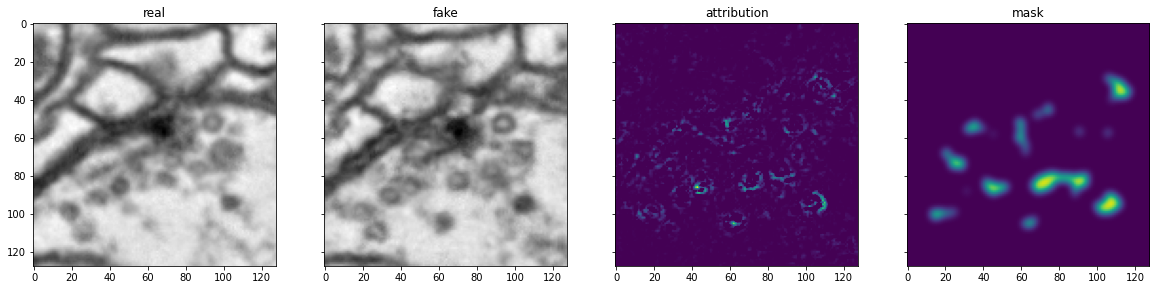

125
337.00000000000017


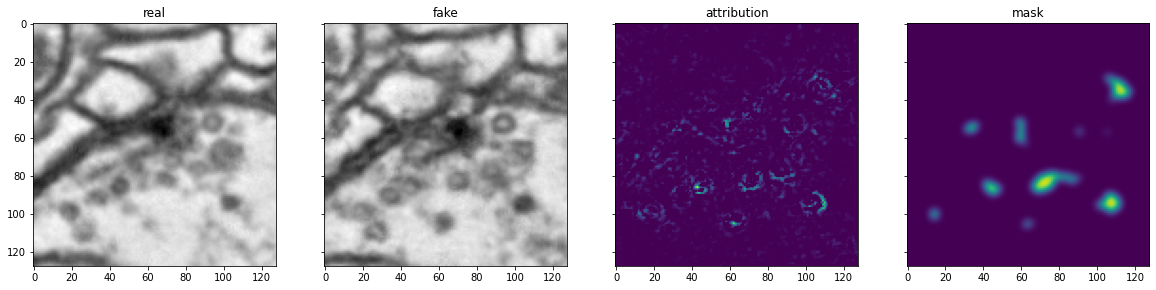

In [26]:
%matplotlib inline
from dac.attribute import get_attribution
from dac.utils import open_image
from dac.mask import get_mask
from matplotlib import pyplot as plt

methods = ['dl']
downsample_factors = [(2, 2), (2, 2), (2, 2), (2, 2)]

def show_mask(real, fake, attribution, mask):
    fig, axs = plt.subplots(1, 4, figsize=(20, 20), sharey=True)
    axs[0].imshow(real, cmap='gray')
    axs[0].set_title("real")
    axs[1].imshow(fake, cmap='gray')
    axs[1].set_title("fake")
    axs[2].imshow(attribution, vmin=0.0, vmax=1.0)
    axs[2].set_title("attribution")
    axs[3].imshow(mask, vmin=0.0, vmax=1.0)
    axs[3].set_title("mask")
    plt.show()

for i in range(2):
    
    basename = classification_results[i]['basename']
    real_filename = basename + '_real.png'
    fake_filename = basename + '_fake.png'
    real_img = open_image(real_filename, flatten=True, normalize=False)
    fake_img = open_image(fake_filename, flatten=True, normalize=False)
    
    attribution_maps, names = get_attribution(
        real_img, fake_img,
        class_A_index, class_B_index,
        'Vgg2D', 'checkpoints/synapses/classifier/vgg_checkpoint',
        (128, 128), 1,
        methods,
        6, downsample_factors)
    
    for attribution_map, name in zip(attribution_maps, names):
        
        print(name)
        
        result, names, images = get_mask(
            attribution_map, real_img, fake_img,
            class_A_index, class_B_index,
            'Vgg2D', 'checkpoints/synapses/classifier/vgg_checkpoint',
            (128, 128), 1,
            6, downsample_factors)

#         print(names)
#         print(len(images))
        for threshold in range(110, 130, 5):
            print(threshold)
            print(np.sum(images[threshold][7]))
            show_mask(real_img, fake_img, images[threshold][0], images[threshold][7])

### Going Further

Here are some ideas for how to continue with this notebook:

1. Improve the classifier. This code uses a VGG network for the classification. On the synapse dataset, we will get a validation accuracy of around 80%. Try to see if you can improve the classifier accuracy.
    * (easy) Data augmentation: The training code for the classifier is quite simple in this example. Enlarge the amount of available training data by adding augmentations (transpose and mirror the images, add noise, change the intensity, etc.).
    * (easy) Network architecture: The VGG network has a few parameters that one can tune. Try a few to see what difference it makes.
    * (easy) Inspect the classifier predictions: Take random samples from the test dataset and classify them. Show the images together with their predicted and actual labels.
    * (medium) Other networks:  Try different architectures (e.g., a ResNet) and see if the accuracy can be improved.
    * (medium) Inspect errors made by the classifier. Which classes are most accurately predicted? Which classes are confused with each other?
    
    
2. Explore the CycleGAN.
    * (easy) The example code below shows how to translate between GABA and glutamate. Try different combinations, and also in the reverse direction. Can you start to see differences between some pairs of classes? Which are the ones where the differences are the most or the least obvious?
    * (hard) Watching the CycleGAN train can be a bit boring. Find a way to show (periodically) the current image and its translation to see how the network is improving over time. Hint: The `cycle_gan` module has a `Visualizer`, which might be helpful.
    

3. Try on your own data!
    * Have a look at how the synapse images are organized in `data/raw/synapses`. Copy the directory structure and use your own images. Depending on your data, you might have to adjust the image size (128x128 for the synapses) and number of channels in the VGG network and CycleGAN code.